In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('06DEC.csv', sep = ';', index_col="FID")


,Kod_region,Region,Kod_distri,District,Kod_munici,Municipal,Kod_part_o,Part_ofmun,Kod_local,Local_part,...,aspect,dist_road,distanc_ri,relativ_hu,Code_lanco,pop_densit,temperatur,wind_speed,Risk_AHP,Risk_fu_AH
FID,,,,,,,,,,,,,,,,,,,,,
0,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,242.276001,0,775.625977,82.361900,121,2556.550049,4.843180,3.46498,4,3
1,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,39.887299,0,379.787994,82.967300,112,2556.550049,8.696800,3.20000,3,2
2,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,30.261600,0,1017.400024,82.170403,111,2556.550049,14.438100,2.89961,5,4
3,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,331.480011,0,2436.800049,81.978500,112,2556.550049,16.635599,2.81345,3,2
4,CZ010,Hlavní město Praha,CZ0100,Hlavní Město Praha,554782,Praha,0,,0,,...,39.887299,0,379.787994,82.967300,112,2556.550049,18.660299,2.64656,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14824,CZ072,Zlínský kraj,CZ0724,Zlín,585068,Zlín,635561,Zlín,0,,...,336.963013,0,93.056503,90.641998,112,184.375000,-1.665550,3.46691,3,3
14825,CZ072,Zlínský kraj,CZ0724,Zlín,585068,Zlín,635561,Zlín,0,,...,336.963013,0,93.056503,90.641998,112,184.375000,13.601300,3.16555,3,3
14826,CZ072,Zlínský kraj,CZ0724,Zlín,585068,Zlín,635561,Zlín,0,,...,336.963013,0,93.056503,90.641998,112,184.375000,13.601300,3.16555,3,3


In [3]:
# dropping ALL duplicate values
df.drop_duplicates(keep = False, inplace = True)

In [5]:
df=df.drop(columns=['Local_part','Ownership', 'Initiator', 'Popis','Kod_region','Kod_distri','Kod_munici','Kod_part_o','Kod_local','Type_of_bu', 'Risk_fu_AH','Time fire H'])


In [6]:
df.columns

Index(['Region', 'District', 'Municipal', 'Part_ofmun', 'Day', 'Month', 'Year',
       'Alarm_leve', 'x', 'y', 'slope', 'elevation', 'aspect', 'dist_road',
       'distanc_ri', 'relativ_hu', 'Code_lanco', 'pop_densit', 'temperatur',
       'wind_speed', 'Risk_AHP'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [62]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')

transformed_data = (onehotencoder.fit_transform(df[['Region','District','Municipal','Part_ofmun','Alarm_leve']]).toarray())

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=df.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([df, encoded_data], axis=1)

In [63]:
data=concatenated_data.drop(columns=['Region','District','Municipal','Part_ofmun','Alarm_leve'])

In [65]:
pd.set_option('display.max_column', 8054)

In [66]:
dict={0:"Reg_Hlavní město Praha",
1:"Reg_Jihomoravský kraj",
2:"Reg_Jihočeský kraj",
3:"Reg_Karlovarský kraj",
4:"Reg_Královéhradecký kraj",
5:"Reg_Liberecký kraj",
6:"Reg_Moravskoslezský kraj",
7:"Reg_Olomoucký kraj",
8:"Reg_Pardubický kraj",
9:"Reg_Plzeňský kraj",
10:"Reg_Středočeský kraj",
11:"Reg_Vysočina kraj",
12:"Reg_Zlínský kraj",
13:"Reg_Ústecký kraj",
14:"Dist_Benešov",
15:"Dist_Beroun",
16:"Dist_Blansko",
17:"Dist_Brno-Město",
18:"Dist_Brno-Venkov",
19:"Dist_Bruntál",
20:"Dist_Břeclav",
21:"Dist_Ceská Lípa",
22:"Dist_Cheb",
23:"Dist_Chomutov",
24:"Dist_Chrudim",
25:"Dist_Domažlice",
26:"Dist_Děčín",
27:"Dist_Frýdek-Místek",
28:"Dist_Havlickuv Brod",
29:"Dist_Havlíčkův Brod",
30:"Dist_Hlavní Město Praha",
31:"Dist_Hodonín",
32:"Dist_Hradec Králové",
33:"Dist_Jablonec Nad Nisou",
34:"Dist_Jeseník",
35:"Dist_Jihlava",
36:"Dist_Jindřichův Hradec",
37:"Dist_Jičín",
38:"Dist_Karlovy Vary",
39:"Dist_Karviná",
40:"Dist_Kladno",
41:"Dist_Klatovy",
42:"Dist_Kolín",
43:"Dist_Kroměříž",
44:"Dist_Kutná Hora",
45:"Dist_Liberec",
46:"Dist_Litoměřice",
47:"Dist_Louny",
48:"Dist_Melník",
49:"Dist_Mladá Boleslav",
50:"Dist_Most",
51:"Dist_Mělník",
52:"Dist_Nový Jičín",
53:"Dist_Nymburk",
54:"Dist_Náchod",
55:"Dist_Olomouc",
56:"Dist_Opava",
57:"Dist_Ostrava-Město",
58:"Dist_Pardubice",
59:"Dist_Pelhrimov",
60:"Dist_Pelhřimov",
61:"Dist_Plzeň-Jih",
62:"Dist_Plzeň-Město",
63:"Dist_Plzeň-Sever",
64:"Dist_Prachatice",
65:"Dist_Praha-Východ",
66:"Dist_Praha-Západ",
67:"Dist_Prostějov",
68:"Dist_Písek",
69:"Dist_Přerov",
70:"Dist_Příbram",
71:"Dist_Rakovník",
72:"Dist_Rokycany",
73:"Dist_Rychnov Nad Kněžnou",
74:"Dist_Semily",
75:"Dist_Sokolov",
76:"Dist_Strakonice",
77:"Dist_Svitavy",
78:"Dist_Tachov",
79:"Dist_Teplice",
80:"Dist_Trebíc",
81:"Dist_Trutnov",
82:"Dist_Tábor",
83:"Dist_Třebíč",
84:"Dist_Uherské Hradiště",
85:"Dist_Vsetín",
86:"Dist_Vyškov",
87:"Dist_Zlín",
88:"Dist_Znojmo",
89:"Dist_Ústí Nad Labem",
90:"Dist_Ústí Nad Orlicí",
91:"Dist_Česká Lípa",
92:"Dist_České Budějovice",
93:"Dist_Český Krumlov",
94:"Dist_Šumperk",
95:"Dist_Žďár Nad Sázavou",
96:"Muni_Abertamy",
97:"Muni_Adamov",
98:"Muni_Adršpach",
99:"Muni_Albrechtice",
100:"Muni_Albrechtice Nad Orlicí",
101:"Muni_Albrechtice V Jizerských Horách",
102:"Muni_Andělská Hora",
103:"Muni_Anenská Studánka",
104:"Muni_Archlebov",
105:"Muni_Arneštovice",
106:"Muni_Arnolec",
107:"Muni_Arnoltice",
108:"Muni_Aš",
109:"Muni_Babice",
110:"Muni_Babice Nad Svitavou",
111:"Muni_Babice U Rosic",
112:"Muni_Babylon",
113:"Muni_Bakov Nad Jizerou",
114:"Muni_Baliny",
115:"Muni_Banín",
116:"Muni_Barchovice",
117:"Muni_Bartoušov",
118:"Muni_Bartošovice V Orlických Horách",
119:"Muni_Batelov",
120:"Muni_Batňovice",
121:"Muni_Bavorov",
122:"Muni_Bavoryně",
123:"Muni_Bačetín",
124:"Muni_Bačkovice",
125:"Muni_Baška",
126:"Muni_Bechlín",
127:"Muni_Bechyně",
128:"Muni_Bedihošť",
129:"Muni_Bednárec",
130:"Muni_Bednáreček",
131:"Muni_Bedřichov",
132:"Muni_Benecko",
133:"Muni_Benešov",
134:"Muni_Benešov Nad Ploučnicí",
135:"Muni_Benešov Nad Černou",
136:"Muni_Benešov U Semil",
137:"Muni_Benešovice",
138:"Muni_Benátky Nad Jizerou",
139:"Muni_Bernartice",
140:"Muni_Beroun",
141:"Muni_Besednice",
142:"Muni_Bezdružice",
143:"Muni_Bezdědovice",
144:"Muni_Bezděkov",
145:"Muni_Bezděkov Nad Metují",
146:"Muni_Bezděkov Pod Třemšínem",
147:"Muni_Bezděz",
148:"Muni_Bezděčí U Trnávky",
149:"Muni_Bezvěrov",
150:"Muni_Bečice",
151:"Muni_Bečov Nad Teplou",
152:"Muni_Biskoupky",
153:"Muni_Biskupice",
154:"Muni_Biřkov",
155:"Muni_Blansko",
156:"Muni_Blatce",
157:"Muni_Blatnice",
158:"Muni_Blatnička",
159:"Muni_Blatno",
160:"Muni_Blatná",
161:"Muni_Blažejov",
162:"Muni_Blažkov",
163:"Muni_Blažovice",
164:"Muni_Blevice",
165:"Muni_Blovice",
166:"Muni_Bludov",
167:"Muni_Blučina",
168:"Muni_Blízkov",
169:"Muni_Blížejov",
170:"Muni_Blíževedly",
171:"Muni_Bobrová",
172:"Muni_Bobrůvka",
173:"Muni_Bochov",
174:"Muni_Bochovice",
175:"Muni_Bohdalec",
176:"Muni_Bohdalice-Pavlovice",
177:"Muni_Bohdalov",
178:"Muni_Bohdalín",
179:"Muni_Bohdašín",
180:"Muni_Bohdíkov",
181:"Muni_Bohostice",
182:"Muni_Bohumín",
183:"Muni_Bohuslavice",
184:"Muni_Bohuslavice Nad Vláří",
185:"Muni_Bohuslavice U Zlína",
186:"Muni_Bohutice",
187:"Muni_Bohutín",
188:"Muni_Bohuňov",
189:"Muni_Bohušovice Nad Ohří",
190:"Muni_Bohy",
191:"Muni_Boháňka",
192:"Muni_Bojanov",
193:"Muni_Bojanovice",
194:"Muni_Bojkovice",
195:"Muni_Boleboř",
196:"Muni_Bolehošť",
197:"Muni_Boletice",
198:"Muni_Bolešiny",
199:"Muni_Bor",
200:"Muni_Bor U Skutče",
201:"Muni_Borkovice",
202:"Muni_Borohrádek",
203:"Muni_Borotice",
204:"Muni_Borotín",
205:"Muni_Borovany",
206:"Muni_Borovnice",
207:"Muni_Borovnička",
208:"Muni_Borovná",
209:"Muni_Borovník",
210:"Muni_Bory",
211:"Muni_Boršice",
212:"Muni_Boršice U Blatnice",
213:"Muni_Boseň",
214:"Muni_Boskovice",
215:"Muni_Bousín",
216:"Muni_Bouzov",
217:"Muni_Bozkov",
218:"Muni_Bořetice",
219:"Muni_Bořislav",
220:"Muni_Bošice",
221:"Muni_Bošovice",
222:"Muni_Božanov",
223:"Muni_Božejov",
224:"Muni_Božetice",
225:"Muni_Božice",
226:"Muni_Božičany",
227:"Muni_Boží Dar",
228:"Muni_Brada-Rybníček",
229:"Muni_Bradlec",
230:"Muni_Bradlecká Lhota",
231:"Muni_Bradáčov",
232:"Muni_Brandov",
233:"Muni_Brandýs Nad Labem-Stará Boleslav",
234:"Muni_Brandýs Nad Orlicí",
235:"Muni_Branišov",
236:"Muni_Branov",
237:"Muni_Bransouze",
238:"Muni_Brantice",
239:"Muni_Braníškov",
240:"Muni_Branžež",
241:"Muni_Bratkovice",
242:"Muni_Bratronice",
243:"Muni_Bratrušov",
244:"Muni_Bratčice",
245:"Muni_Bratřice",
246:"Muni_Braňany",
247:"Muni_Braškov",
248:"Muni_Brdy",
249:"Muni_Brloh",
250:"Muni_Brniště",
251:"Muni_Brno",
252:"Muni_Brníčko",
253:"Muni_Brnířov",
254:"Muni_Brněnec",
255:"Muni_Brod Nad Tichou",
256:"Muni_Brodce",
257:"Muni_Brodec",
258:"Muni_Brodek U Konice",
259:"Muni_Brodek U Prostějova",
260:"Muni_Broumov",
261:"Muni_Broumy",
262:"Muni_Brozany Nad Ohří",
263:"Muni_Brtnice",
264:"Muni_Brumov-Bylnice",
265:"Muni_Bruntál",
266:"Muni_Brusné",
267:"Muni_Brzice",
268:"Muni_Brzkov",
269:"Muni_Brzánky",
270:"Muni_Brázdim",
271:"Muni_Brťov-Jeneč",
272:"Muni_Bubovice",
273:"Muni_Buchlovice",
274:"Muni_Budeč",
275:"Muni_Budiměřice",
276:"Muni_Budislav",
277:"Muni_Budišov",
278:"Muni_Budišov Nad Budišovkou",
279:"Muni_Budišovice",
280:"Muni_Budkov",
281:"Muni_Budyně Nad Ohří",
282:"Muni_Budíškovice",
283:"Muni_Budětsko",
284:"Muni_Bujanov",
285:"Muni_Bujesily",
286:"Muni_Buk",
287:"Muni_Bukovany",
288:"Muni_Bukovec",
289:"Muni_Bukovice",
290:"Muni_Bukovina U Přelouče",
291:"Muni_Bukovinka",
292:"Muni_Bukovka",
293:"Muni_Bukovno",
294:"Muni_Bukovník",
295:"Muni_Buková",
296:"Muni_Buková U Příbramě",
297:"Muni_Bulovka",
298:"Muni_Butoves",
299:"Muni_Buzice",
300:"Muni_Bučovice",
301:"Muni_Buřenice",
302:"Muni_Buš",
303:"Muni_Bušanovice",
304:"Muni_Bušovice",
305:"Muni_Buštěhrad",
306:"Muni_Bykoš",
307:"Muni_Bynovec",
308:"Muni_Bystrá Nad Jizerou",
309:"Muni_Bystřany",
310:"Muni_Bystřec",
311:"Muni_Bystřice",
312:"Muni_Bystřice Nad Pernštejnem",
313:"Muni_Bystřice Pod Hostýnem",
314:"Muni_Bystřice Pod Lopeníkem",
315:"Muni_Bystřička",
316:"Muni_Byšice",
317:"Muni_Bzenec",
318:"Muni_Bánov",
319:"Muni_Báňovice",
320:"Muni_Bílichov",
321:"Muni_Bílina",
322:"Muni_Bílov",
323:"Muni_Bílovec",
324:"Muni_Bílovice Nad Svitavou",
325:"Muni_Bílsko",
326:"Muni_Bílá",
327:"Muni_Bílá Hlína",
328:"Muni_Bílá Třemešná",
329:"Muni_Bílé Poličany",
330:"Muni_Bílý Kostel Nad Nisou",
331:"Muni_Bílý Kámen",
332:"Muni_Bílčice",
333:"Muni_Bítouchov",
334:"Muni_Bítov",
335:"Muni_Bítovčice",
336:"Muni_Býchory",
337:"Muni_Býkev",
338:"Muni_Býšovec",
339:"Muni_Býšť",
340:"Muni_Běleč",
341:"Muni_Běleč Nad Orlicí",
342:"Muni_Bělkovice-Lašťany",
343:"Muni_Bělotín",
344:"Muni_Bělá",
345:"Muni_Bělá Nad Radbuzou",
346:"Muni_Bělá Pod Bezdězem",
347:"Muni_Bělá Pod Pradědem",
348:"Muni_Bělčice",
349:"Muni_Běstvina",
350:"Muni_Běšiny",
351:"Muni_Běštín",
352:"Muni_Břasy",
353:"Muni_Břeclav",
354:"Muni_Břehov",
355:"Muni_Břehy",
356:"Muni_Břestek",
357:"Muni_Březejc",
358:"Muni_Březina",
359:"Muni_Březnice",
360:"Muni_Březno",
361:"Muni_Březník",
362:"Muni_Březovice",
363:"Muni_Březová",
364:"Muni_Březová Nad Svitavou",
365:"Muni_Březová-Oleško",
366:"Muni_Březí",
367:"Muni_Březí Nad Oslavou",
368:"Muni_Březůvky",
369:"Muni_Břežany",
370:"Muni_Břidličná",
371:"Muni_Břvany",
372:"Muni_Bžany",
373:"Muni_Cebiv",
374:"Muni_Cejle",
375:"Muni_Cep",
376:"Muni_Cerekvice Nad Bystřicí",
377:"Muni_Cerhenice",
378:"Muni_Cerhovice",
379:"Muni_Cervená Recice",
380:"Muni_Cetenov",
381:"Muni_Cetkovice",
382:"Muni_Cetoraz",
383:"Muni_Chabařovice",
384:"Muni_Chabeřice",
385:"Muni_Chaloupky",
386:"Muni_Chanovice",
387:"Muni_Chbany",
388:"Muni_Cheb",
389:"Muni_Cheznovice",
390:"Muni_Chlistov",
391:"Muni_Chlum",
392:"Muni_Chlum Svaté Maří",
393:"Muni_Chlum U Třeboně",
394:"Muni_Chlum-Korouhvice",
395:"Muni_Chlumany",
396:"Muni_Chlumec",
397:"Muni_Chlumec Nad Cidlinou",
398:"Muni_Chlumek",
399:"Muni_Chlumčany",
400:"Muni_Chlístovice",
401:"Muni_Chocerady",
402:"Muni_Choceň",
403:"Muni_Chocnějovice",
404:"Muni_Chodouny",
405:"Muni_Chodouň",
406:"Muni_Chodov",
407:"Muni_Chodová Planá",
408:"Muni_Chodská Lhota",
409:"Muni_Chodský Újezd",
410:"Muni_Choltice",
411:"Muni_Chomle",
412:"Muni_Chomutov",
413:"Muni_Chomýž",
414:"Muni_Choratice",
415:"Muni_Chorušice",
416:"Muni_Choryně",
417:"Muni_Chotilsko",
418:"Muni_Chotovice",
419:"Muni_Chotoviny",
420:"Muni_Chotyně",
421:"Muni_Chotíkov",
422:"Muni_Chotěboř",
423:"Muni_Chotěnov",
424:"Muni_Chotětov",
425:"Muni_Chotěvice",
426:"Muni_Chotěšov",
427:"Muni_Choustník",
428:"Muni_Choustníkovo Hradiště",
429:"Muni_Choťovice",
430:"Muni_Chraberce",
431:"Muni_Chrast",
432:"Muni_Chrastava",
433:"Muni_Chrbonín",
434:"Muni_Chropyně",
435:"Muni_Chrudim",
436:"Muni_Chrustenice",
437:"Muni_Chrást",
438:"Muni_Chrášťany",
439:"Muni_Chuchelna",
440:"Muni_Chudenice",
441:"Muni_Chudenín",
442:"Muni_Chuderov",
443:"Muni_Chvalatice",
444:"Muni_Chvaletice",
445:"Muni_Chvaleč",
446:"Muni_Chvalkovice",
447:"Muni_Chvalčov",
448:"Muni_Chvalšiny",
449:"Muni_Chvatěruby",
450:"Muni_Chyňava",
451:"Muni_Chyše",
452:"Muni_Chyšky",
453:"Muni_Chyšná",
454:"Muni_Chýnov",
455:"Muni_Chýstovice",
456:"Muni_Chřenovice",
457:"Muni_Chřibská",
458:"Muni_Cikháj",
459:"Muni_Citice",
460:"Muni_Cizkrajov",
461:"Muni_Ctiboř",
462:"Muni_Ctětín",
463:"Muni_Cvikov",
464:"Muni_Cvrčovice",
465:"Muni_Dalečín",
466:"Muni_Dalešice",
467:"Muni_Dalovice",
468:"Muni_Dambořice",
469:"Muni_Damníkov",
470:"Muni_Darkovice",
471:"Muni_Daskabát",
472:"Muni_Dasnice",
473:"Muni_Dasný",
474:"Muni_Davle",
475:"Muni_Dačice",
476:"Muni_Deblín",
477:"Muni_Dehtáře",
478:"Muni_Desná",
479:"Muni_Dešenice",
480:"Muni_Deštnice",
481:"Muni_Deštná",
482:"Muni_Deštné V Orlických Horách",
483:"Muni_Divišov",
484:"Muni_Dlažkovice",
485:"Muni_Dlažov",
486:"Muni_Dlouhomilov",
487:"Muni_Dlouhá Brtnice",
488:"Muni_Dlouhá Stráň",
489:"Muni_Dlouhá Třebová",
490:"Muni_Dlouhá Ves",
491:"Muni_Dlouhé",
492:"Muni_Dlouhý Most",
493:"Muni_Dlouhý Újezd",
494:"Muni_Dobev",
495:"Muni_Dobkovice",
496:"Muni_Dobratice",
497:"Muni_Dobrohošť",
498:"Muni_Dobroměřice",
499:"Muni_Dobronice U Bechyně",
500:"Muni_Dobronín",
501:"Muni_Dobroslavice",
502:"Muni_Dobroutov",
503:"Muni_Dobrovice",
504:"Muni_Dobrovítov",
505:"Muni_Dobruška",
506:"Muni_Dobrá",
507:"Muni_Dobrá Voda",
508:"Muni_Dobrá Voda U Českých Budějovic",
509:"Muni_Dobré",
510:"Muni_Dobršín",
511:"Muni_Dobřany",
512:"Muni_Dobřeň",
513:"Muni_Dobřichov",
514:"Muni_Dobřichovice",
515:"Muni_Dobříkov",
516:"Muni_Dobřív",
517:"Muni_Dobříč",
518:"Muni_Dobříň",
519:"Muni_Dobříš",
520:"Muni_Dobšice",
521:"Muni_Dobšín",
522:"Muni_Doksany",
523:"Muni_Doksy",
524:"Muni_Dolany",
525:"Muni_Dolce",
526:"Muni_Dolní Benešov",
527:"Muni_Dolní Bečva",
528:"Muni_Dolní Beřkovice",
529:"Muni_Dolní Bousov",
530:"Muni_Dolní Branná",
531:"Muni_Dolní Brusnice",
532:"Muni_Dolní Bukovsko",
533:"Muni_Dolní Břežany",
534:"Muni_Dolní Cerekev",
535:"Muni_Dolní Dobrouč",
536:"Muni_Dolní Dubňany",
537:"Muni_Dolní Dvořiště",
538:"Muni_Dolní Dvůr",
539:"Muni_Dolní Heřmanice",
540:"Muni_Dolní Hořice",
541:"Muni_Dolní Hrachovice",
542:"Muni_Dolní Hradiště",
543:"Muni_Dolní Kalná",
544:"Muni_Dolní Kralovice",
545:"Muni_Dolní Lažany",
546:"Muni_Dolní Lhota",
547:"Muni_Dolní Lomná",
548:"Muni_Dolní Loučky",
549:"Muni_Dolní Lutyně",
550:"Muni_Dolní Lánov",
551:"Muni_Dolní Morava",
552:"Muni_Dolní Moravice",
553:"Muni_Dolní Město",
554:"Muni_Dolní Nivy",
555:"Muni_Dolní Olešnice",
556:"Muni_Dolní Podluží",
557:"Muni_Dolní Pohleď",
558:"Muni_Dolní Poustevna",
559:"Muni_Dolní Radechová",
560:"Muni_Dolní Roveň",
561:"Muni_Dolní Rožínka",
562:"Muni_Dolní Rychnov",
563:"Muni_Dolní Slivno",
564:"Muni_Dolní Sokolovec",
565:"Muni_Dolní Třebonín",
566:"Muni_Dolní Vilímeč",
567:"Muni_Dolní Věstonice",
568:"Muni_Dolní Řasnice",
569:"Muni_Dolní Žandov",
570:"Muni_Doloplazy",
571:"Muni_Dolánky Nad Ohří",
572:"Muni_Domašov",
573:"Muni_Domašov U Šternberka",
574:"Muni_Domašín",
575:"Muni_Domažlice",
576:"Muni_Domousnice",
577:"Muni_Domoušice",
578:"Muni_Doubice",
579:"Muni_Doubravice",
580:"Muni_Doubravička",
581:"Muni_Doubravník",
582:"Muni_Doubravčice",
583:"Muni_Doudleby Nad Orlicí",
584:"Muni_Doupě",
585:"Muni_Drachkov",
586:"Muni_Drahanovice",
587:"Muni_Drahelčice",
588:"Muni_Drahlín",
589:"Muni_Drahonice",
590:"Muni_Drahonín",
591:"Muni_Drahov",
592:"Muni_Drahoňův Újezd",
593:"Muni_Drahňovice",
594:"Muni_Dražice",
595:"Muni_Dražíč",
596:"Muni_Drhovice",
597:"Muni_Drhovle",
598:"Muni_Drhovy",
599:"Muni_Drmoul",
600:"Muni_Drnek",
601:"Muni_Drnovice",
602:"Muni_Droužetice",
603:"Muni_Drozdov",
604:"Muni_Druhanov",
605:"Muni_Druztová",
606:"Muni_Dráchov",
607:"Muni_Drásov",
608:"Muni_Držkov",
609:"Muni_Držková",
610:"Muni_Držovice",
611:"Muni_Dub",
612:"Muni_Dub Nad Moravou",
613:"Muni_Dubenec",
614:"Muni_Dublovice",
615:"Muni_Dubno",
616:"Muni_Dubné",
617:"Muni_Dubovice",
618:"Muni_Dubá",
619:"Muni_Dubí",
620:"Muni_Dubňany",
621:"Muni_Duchcov",
622:"Muni_Dudín",
623:"Muni_Dukovany",
624:"Muni_Dunajovice",
625:"Muni_Dunice",
626:"Muni_Dvory",
627:"Muni_Dvory Nad Lužnicí",
628:"Muni_Dvůr Králové Nad Labem",
629:"Muni_Dyje",
630:"Muni_Dyjice",
631:"Muni_Dyjákovice",
632:"Muni_Dymokury",
633:"Muni_Dynín",
634:"Muni_Díly",
635:"Muni_Dírná",
636:"Muni_Dívčí Hrad",
637:"Muni_Dýšina",
638:"Muni_Děhylov",
639:"Muni_Děkanovice",
640:"Muni_Děpoltovice",
641:"Muni_Dětmarovice",
642:"Muni_Dětřichov Nad Bystřicí",
643:"Muni_Děčín",
644:"Muni_Dřetovice",
645:"Muni_Dřevohostice",
646:"Muni_Dřevčice",
647:"Muni_Dřevěnice",
648:"Muni_Dřešín",
649:"Muni_Dřínov",
650:"Muni_Dřísy",
651:"Muni_Dříteň",
652:"Muni_Důl",
653:"Muni_Ejpovice",
654:"Muni_Erpužice",
655:"Muni_Evaň",
656:"Muni_Felbabka",
657:"Muni_Frahelž",
658:"Muni_Francova Lhota",
659:"Muni_Františkov Nad Ploučnicí",
660:"Muni_Františkovy Lázně",
661:"Muni_Frenštát Pod Radhoštěm",
662:"Muni_Frymburk",
663:"Muni_Fryčovice",
664:"Muni_Fryšava Pod Žákovou Horou",
665:"Muni_Frýdek-Místek",
666:"Muni_Frýdlant",
667:"Muni_Frýdlant Nad Ostravicí",
668:"Muni_Frýdštejn",
669:"Muni_Fulnek",
670:"Muni_Golčův Jeníkov",
671:"Muni_Gruna",
672:"Muni_Grygov",
673:"Muni_Habartov",
674:"Muni_Habry",
675:"Muni_Habrůvka",
676:"Muni_Habřina",
677:"Muni_Hajnice",
678:"Muni_Halenkov",
679:"Muni_Halenkovice",
680:"Muni_Halámky",
681:"Muni_Halže",
682:"Muni_Hamr",
683:"Muni_Hamr Na Jezeře",
684:"Muni_Hamry",
685:"Muni_Hamry Nad Sázavou",
686:"Muni_Hanušovice",
687:"Muni_Harrachov",
688:"Muni_Hartmanice",
689:"Muni_Hartvíkovice",
690:"Muni_Havlickuv Brod",
691:"Muni_Havlovice",
692:"Muni_Havlíčkova Borová",
693:"Muni_Havlíčkův Brod",
694:"Muni_Havraníky",
695:"Muni_Havířov",
696:"Muni_Hazlov",
697:"Muni_Haškovcova Lhota",
698:"Muni_Hať",
699:"Muni_Hejnice",
700:"Muni_Hejná",
701:"Muni_Hejtmánkovice",
702:"Muni_Hermanuv Mestec",
703:"Muni_Herálec",
704:"Muni_Heršpice",
705:"Muni_Hevlín",
706:"Muni_Heřmaneč",
707:"Muni_Heřmanice U Oder",
708:"Muni_Heřmaničky",
709:"Muni_Heřmanov",
710:"Muni_Heřmanovice",
711:"Muni_Heřmanův Městec",
712:"Muni_Heřmaň",
713:"Muni_Heřmánkovice",
714:"Muni_Heřmánky",
715:"Muni_Hladké Životice",
716:"Muni_Hladov",
717:"Muni_Hlasivo",
718:"Muni_Hlavatce",
719:"Muni_Hlavenec",
720:"Muni_Hlavečník",
721:"Muni_Hlavice",
722:"Muni_Hlinná",
723:"Muni_Hlinsko",
724:"Muni_Hluboká Nad Vltavou",
725:"Muni_Hluboké Mašůvky",
726:"Muni_Hlubočec",
727:"Muni_Hlubočky",
728:"Muni_Hluboš",
729:"Muni_Hluchov",
730:"Muni_Hluk",
731:"Muni_Hlučín",
732:"Muni_Hlásná Třebaň",
733:"Muni_Hnačov",
734:"Muni_Hnátnice",
735:"Muni_Hněvkovice",
736:"Muni_Hněvnice",
737:"Muni_Hodice",
738:"Muni_Hodkovice Nad Mohelkou",
739:"Muni_Hodonice",
740:"Muni_Hodonín",
741:"Muni_Hodíškov",
742:"Muni_Holany",
743:"Muni_Holedeč",
744:"Muni_Holešov",
745:"Muni_Holice",
746:"Muni_Holohlavy",
747:"Muni_Holotín",
748:"Muni_Holoubkov",
749:"Muni_Holubov",
750:"Muni_Holín",
751:"Muni_Holýšov",
752:"Muni_Holčovice",
753:"Muni_Holštejn",
754:"Muni_Homole U Panny",
755:"Muni_Hora Svaté Kateřiny",
756:"Muni_Hora Svatého Šebestiána",
757:"Muni_Horažďovice",
758:"Muni_Horka",
759:"Muni_Horka Ii",
760:"Muni_Hornice",
761:"Muni_Horní Benešov",
762:"Muni_Horní Bezděkov",
763:"Muni_Horní Bečva",
764:"Muni_Horní Beřkovice",
765:"Muni_Horní Blatná",
766:"Muni_Horní Bludovice",
767:"Muni_Horní Bojanovice",
768:"Muni_Horní Bradlo",
769:"Muni_Horní Branná",
770:"Muni_Horní Brusnice",
771:"Muni_Horní Bělá",
772:"Muni_Horní Břečkov",
773:"Muni_Horní Bříza",
774:"Muni_Horní Cerekev",
775:"Muni_Horní Dubenky",
776:"Muni_Horní Dunajovice",
777:"Muni_Horní Habartice",
778:"Muni_Horní Jelení",
779:"Muni_Horní Jiřetín",
780:"Muni_Horní Kalná",
781:"Muni_Horní Kamenice",
782:"Muni_Horní Kounice",
783:"Muni_Horní Kozolupy",
784:"Muni_Horní Krupá",
785:"Muni_Horní Kruty",
786:"Muni_Horní Lhota",
787:"Muni_Horní Libchava",
788:"Muni_Horní Lideč",
789:"Muni_Horní Loděnice",
790:"Muni_Horní Lomná",
791:"Muni_Horní Loučky",
792:"Muni_Horní Maršov",
793:"Muni_Horní Meziříčko",
794:"Muni_Horní Moštěnice",
795:"Muni_Horní Myslová",
796:"Muni_Horní Město",
797:"Muni_Horní Olešnice",
798:"Muni_Horní Paseka",
799:"Muni_Horní Planá",
800:"Muni_Horní Podluží",
801:"Muni_Horní Police",
802:"Muni_Horní Počaply",
803:"Muni_Horní Poříčí",
804:"Muni_Horní Pěna",
805:"Muni_Horní Radechová",
806:"Muni_Horní Radouň",
807:"Muni_Horní Radslavice",
808:"Muni_Horní Rápotice",
809:"Muni_Horní Skrýchov",
810:"Muni_Horní Slatina",
811:"Muni_Horní Slavkov",
812:"Muni_Horní Slivno",
813:"Muni_Horní Smrčné",
814:"Muni_Horní Stropnice",
815:"Muni_Horní Studénky",
816:"Muni_Horní Suchá",
817:"Muni_Horní Vilémovice",
818:"Muni_Horní Vltavice",
819:"Muni_Horní Řasnice",
820:"Muni_Horní Štěpánov",
821:"Muni_Horní Životice",
822:"Muni_Horoměřice",
823:"Muni_Horoušany",
824:"Muni_Horská Kvilda",
825:"Muni_Horušice",
826:"Muni_Horšovský Týn",
827:"Muni_Hoslovice",
828:"Muni_Hospříz",
829:"Muni_Hostašovice",
830:"Muni_Hostinné",
831:"Muni_Hostivice",
832:"Muni_Hostomice",
833:"Muni_Hostouň",
834:"Muni_Hostěnice",
835:"Muni_Hostěradice",
836:"Muni_Hostětice",
837:"Muni_Hostětín",
838:"Muni_Hosín",
839:"Muni_Hovorany",
840:"Muni_Hovorčovice",
841:"Muni_Hovězí",
842:"Muni_Hořenice",
843:"Muni_Hořepník",
844:"Muni_Hořice",
845:"Muni_Hořičky",
846:"Muni_Hořovice",
847:"Muni_Hořovičky",
848:"Muni_Hořátev",
849:"Muni_Hoštka",
850:"Muni_Hošťalovice",
851:"Muni_Hošťka",
852:"Muni_Hošťálkovy",
853:"Muni_Hošťálková",
854:"Muni_Hrabyně",
855:"Muni_Hracholusky",
856:"Muni_Hrachoviště",
857:"Muni_Hradec",
858:"Muni_Hradec Králové",
859:"Muni_Hradec Nad Moravicí",
860:"Muni_Hradec Nad Svitavou",
861:"Muni_Hradečno",
862:"Muni_Hradešice",
863:"Muni_Hradešín",
864:"Muni_Hradištko",
865:"Muni_Hradiště",
866:"Muni_Hradčovice",
867:"Muni_Hranice",
868:"Muni_Hraničné Petrovice",
869:"Muni_Hrdlořezy",
870:"Muni_Hrdlív",
871:"Muni_Hrdějovice",
872:"Muni_Hrob",
873:"Muni_Hrobce",
874:"Muni_Hrobice",
875:"Muni_Hrobčice",
876:"Muni_Hrochův Týnec",
877:"Muni_Hromnice",
878:"Muni_Hronov",
879:"Muni_Hrotovice",
880:"Muni_Hroubovice",
881:"Muni_Hroznatín",
882:"Muni_Hroznětín",
883:"Muni_Hrubá Skála",
884:"Muni_Hrusice",
885:"Muni_Hrušovany",
886:"Muni_Hrušovany Nad Jevišovkou",
887:"Muni_Hrušovany U Brna",
888:"Muni_Hrádek",
889:"Muni_Hrádek Nad Nisou",
890:"Muni_Hudlice",
891:"Muni_Hukvaldy",
892:"Muni_Hulice",
893:"Muni_Hulín",
894:"Muni_Humpolec",
895:"Muni_Huntířov",
896:"Muni_Hurtova Lhota",
897:"Muni_Husinec",
898:"Muni_Huslenky",
899:"Muni_Husí Lhota",
900:"Muni_Hutisko-Solanec",
901:"Muni_Huzová",
902:"Muni_Hvozd",
903:"Muni_Hvozdec",
904:"Muni_Hvozdná",
905:"Muni_Hvožďany",
906:"Muni_Hvězdonice",
907:"Muni_Hybrálec",
908:"Muni_Hynčice",
909:"Muni_Hynčina",
910:"Muni_Háj U Duchcova",
911:"Muni_Háj Ve Slezsku",
912:"Muni_Háje",
913:"Muni_Háje Nad Jizerou",
914:"Muni_Hájek",
915:"Muni_Hýskov",
916:"Muni_Hýsly",
917:"Muni_Hřebeč",
918:"Muni_Hředle",
919:"Muni_Hřensko",
920:"Muni_Hřibiny-Ledská",
921:"Muni_Hřibojedy",
922:"Muni_Hřiměždice",
923:"Muni_Hřivice",
924:"Muni_Hříšice",
925:"Muni_Hůrky",
926:"Muni_Ivančice",
927:"Muni_Ivaň",
928:"Muni_Jabkenice",
929:"Muni_Jablonec Nad Jizerou",
930:"Muni_Jablonec Nad Nisou",
931:"Muni_Jablonné Nad Orlicí",
932:"Muni_Jablonné V Podještedí",
933:"Muni_Jablonné V Podještědí",
934:"Muni_Jabloňov",
935:"Muni_Jablunkov",
936:"Muni_Jablůnka",
937:"Muni_Jahodov",
938:"Muni_Jamné",
939:"Muni_Jamné Nad Orlicí",
940:"Muni_Jamolice",
941:"Muni_Jankov",
942:"Muni_Jankovice",
943:"Muni_Janov",
944:"Muni_Janov Nad Nisou",
945:"Muni_Janovice Nad Úhlavou",
946:"Muni_Janovice V Podještědí",
947:"Muni_Janová",
948:"Muni_Janská",
949:"Muni_Janské Lázně",
950:"Muni_Jarcová",
951:"Muni_Jaroměř",
952:"Muni_Jaroměřice",
953:"Muni_Jaroměřice Nad Rokytnou",
954:"Muni_Jaroslav",
955:"Muni_Jaroslavice",
956:"Muni_Jarov",
957:"Muni_Jarošov Nad Nežárkou",
958:"Muni_Jarpice",
959:"Muni_Jasenná",
960:"Muni_Javorek",
961:"Muni_Javorník",
962:"Muni_Jedlany",
963:"Muni_Jedlová",
964:"Muni_Jedlí",
965:"Muni_Jedomělice",
966:"Muni_Jedovnice",
967:"Muni_Jemnice",
968:"Muni_Jeneč",
969:"Muni_Jenišovice",
970:"Muni_Jeníkov",
971:"Muni_Jenštejn",
972:"Muni_Jersín",
973:"Muni_Jesenice",
974:"Muni_Jesenný",
975:"Muni_Jeseník",
976:"Muni_Jeseník Nad Odrou",
977:"Muni_Jestrabí V Krkonoších",
978:"Muni_Jestřabí Lhota",
979:"Muni_Jestřebí",
980:"Muni_Jetětice",
981:"Muni_Jetřichov",
982:"Muni_Jetřichovice",
983:"Muni_Jevany",
984:"Muni_Jeviněves",
985:"Muni_Jevišovice",
986:"Muni_Jezdkovice",
987:"Muni_Jezdovice",
988:"Muni_Jezernice",
989:"Muni_Jeřišno",
990:"Muni_Jeřmanice",
991:"Muni_Ježená",
992:"Muni_Ježkovice",
993:"Muni_Jihlava",
994:"Muni_Jihlávka",
995:"Muni_Jilemnice",
996:"Muni_Jimramov",
997:"Muni_Jinačovice",
998:"Muni_Jince",
999:"Muni_Jindřichov",
1000:"Muni_Jindřichovice",
1001:"Muni_Jindřichovice Pod Smrkem",
1002:"Muni_Jindřichův Hradec",
1003:"Muni_Jinolice",
1004:"Muni_Jinošov",
1005:"Muni_Jiratice",
1006:"Muni_Jirkov",
1007:"Muni_Jirny",
1008:"Muni_Jistebnice",
1009:"Muni_Jistebník",
1010:"Muni_Jitkov",
1011:"Muni_Jivina",
1012:"Muni_Jivno",
1013:"Muni_Jičín",
1014:"Muni_Jičíněves",
1015:"Muni_Jiřetín Pod Bukovou",
1016:"Muni_Jiřetín Pod Jedlovou",
1017:"Muni_Jiřice",
1018:"Muni_Jiřice U Miroslavi",
1019:"Muni_Jiříkov",
1020:"Muni_Josefov",
1021:"Muni_Josefův Důl",
1022:"Muni_Jáchymov",
1023:"Muni_Jámy",
1024:"Muni_Jíloviště",
1025:"Muni_Jílové",
1026:"Muni_Jílové U Držkova",
1027:"Muni_Jílové U Prahy",
1028:"Muni_Jívka",
1029:"Muni_Jívová",
1030:"Muni_Jívoví",
1031:"Muni_Kacanovy",
1032:"Muni_Kaceřov",
1033:"Muni_Kadaň",
1034:"Muni_Kadolec",
1035:"Muni_Kadov",
1036:"Muni_Kakejcov",
1037:"Muni_Kalek",
1038:"Muni_Kalhov",
1039:"Muni_Kaliště",
1040:"Muni_Kamenec",
1041:"Muni_Kamenec U Poličky",
1042:"Muni_Kamenice",
1043:"Muni_Kamenice Nad Lipou",
1044:"Muni_Kamenický Šenov",
1045:"Muni_Kamenná",
1046:"Muni_Kamenné Žehrovice",
1047:"Muni_Kamenný Malíkov",
1048:"Muni_Kamenný Most",
1049:"Muni_Kamenný Přívoz",
1050:"Muni_Kamenný Újezd",
1051:"Muni_Kamýk",
1052:"Muni_Kamýk Nad Vltavou",
1053:"Muni_Kanice",
1054:"Muni_Kanina",
1055:"Muni_Kaplice",
1056:"Muni_Kardašova Řečice",
1057:"Muni_Karle",
1058:"Muni_Karlov",
1059:"Muni_Karlova Studánka",
1060:"Muni_Karlovice",
1061:"Muni_Karlovy Vary",
1062:"Muni_Karlík",
1063:"Muni_Karolinka",
1064:"Muni_Karviná",
1065:"Muni_Kasejovice",
1066:"Muni_Kateřinice",
1067:"Muni_Katusice",
1068:"Muni_Kaznějov",
1069:"Muni_Kačice",
1070:"Muni_Kačlehy",
1071:"Muni_Kaňovice",
1072:"Muni_Kařízek",
1073:"Muni_Kašava",
1074:"Muni_Kašperské Hory",
1075:"Muni_Kbelany",
1076:"Muni_Kdyne",
1077:"Muni_Kdyně",
1078:"Muni_Keblov",
1079:"Muni_Kejžlice",
1080:"Muni_Klabava",
1081:"Muni_Kladeruby Nad Oslavou",
1082:"Muni_Kladky",
1083:"Muni_Kladno",
1084:"Muni_Kladruby",
1085:"Muni_Kladruby Nad Labem",
1086:"Muni_Klamoš",
1087:"Muni_Klapý",
1088:"Muni_Klatovec",
1089:"Muni_Klatovy",
1090:"Muni_Klec",
1091:"Muni_Klecany",
1092:"Muni_Kleneč",
1093:"Muni_Klenová",
1094:"Muni_Klentnice",
1095:"Muni_Klobouky U Brna",
1096:"Muni_Klobuky",
1097:"Muni_Klokočí",
1098:"Muni_Klopotovice",
1099:"Muni_Kluky",
1100:"Muni_Klučenice",
1101:"Muni_Klučov",
1102:"Muni_Klášter",
1103:"Muni_Klášterec Nad Ohří",
1104:"Muni_Klášterská Lhota",
1105:"Muni_Klínec",
1106:"Muni_Klíny",
1107:"Muni_Klíčany",
1108:"Muni_Knyk",
1109:"Muni_Knínice U Boskovic",
1110:"Muni_Kněždub",
1111:"Muni_Kněževes",
1112:"Muni_Kněžice",
1113:"Muni_Kněžmost",
1114:"Muni_Kněžpole",
1115:"Muni_Koberovice",
1116:"Muni_Koberovy",
1117:"Muni_Kocbeře",
1118:"Muni_Kocelovice",
1119:"Muni_Kochánky",
1120:"Muni_Kohoutov",
1121:"Muni_Kojatín",
1122:"Muni_Kojetice",
1123:"Muni_Kojetín",
1124:"Muni_Kojčice",
1125:"Muni_Kokašice",
1126:"Muni_Kokory",
1127:"Muni_Kokořín",
1128:"Muni_Kolinec",
1129:"Muni_Koloveč",
1130:"Muni_Kolová",
1131:"Muni_Kolín",
1132:"Muni_Komařice",
1133:"Muni_Komorní Lhotka",
1134:"Muni_Komorovice",
1135:"Muni_Komárov",
1136:"Muni_Kondrac",
1137:"Muni_Konice",
1138:"Muni_Konstantinovy Lázně",
1139:"Muni_Konárovice",
1140:"Muni_Konětopy",
1141:"Muni_Koněšín",
1142:"Muni_Kopřivnice",
1143:"Muni_Kopřivná",
1144:"Muni_Korenov",
1145:"Muni_Korno",
1146:"Muni_Korouhev",
1147:"Muni_Koroužné",
1148:"Muni_Korozluky",
1149:"Muni_Koryčany",
1150:"Muni_Kosmonosy",
1151:"Muni_Kosova Hora",
1152:"Muni_Kosoř",
1153:"Muni_Kostelany",
1154:"Muni_Kostelany Nad Moravou",
1155:"Muni_Kostelec",
1156:"Muni_Kostelec Nad Labem",
1157:"Muni_Kostelec Nad Orlicí",
1158:"Muni_Kostelec Nad Vltavou",
1159:"Muni_Kostelec Nad Černými Lesy",
1160:"Muni_Kostelec U Heřmanova Městce",
1161:"Muni_Kostelec U Holešova",
1162:"Muni_Kostelní Lhota",
1163:"Muni_Kostelní Myslová",
1164:"Muni_Kostelní Vydří",
1165:"Muni_Kostice",
1166:"Muni_Kostníky",
1167:"Muni_Kostomlaty Nad Labem",
1168:"Muni_Kostomlaty Pod Milešovkou",
1169:"Muni_Kostomlaty Pod Řípem",
1170:"Muni_Kotlasy",
1171:"Muni_Kotovice",
1172:"Muni_Kotvrdovice",
1173:"Muni_Kounov",
1174:"Muni_Kout Na Šumavě",
1175:"Muni_Kouty",
1176:"Muni_Kouřim",
1177:"Muni_Kovářov",
1178:"Muni_Kovářská",
1179:"Muni_Kozlany",
1180:"Muni_Kozli",
1181:"Muni_Kozlov",
1182:"Muni_Kozlovice",
1183:"Muni_Kozmice",
1184:"Muni_Kozojedy",
1185:"Muni_Kozolupy",
1186:"Muni_Kozárovice",
1187:"Muni_Kočov",
1188:"Muni_Kočí",
1189:"Muni_Kořenec",
1190:"Muni_Kořenov",
1191:"Muni_Košařiska",
1192:"Muni_Košetice",
1193:"Muni_Košice",
1194:"Muni_Košátky",
1195:"Muni_Košík",
1196:"Muni_Košíky",
1197:"Muni_Košťany",
1198:"Muni_Košťálov",
1199:"Muni_Kožichovice",
1200:"Muni_Kožlany",
1201:"Muni_Kožlí",
1202:"Muni_Krabčice",
1203:"Muni_Krahulov",
1204:"Muni_Krajková",
1205:"Muni_Krajníčko",
1206:"Muni_Krakovany",
1207:"Muni_Kralice Nad Oslavou",
1208:"Muni_Kralovice",
1209:"Muni_Kralupy Nad Vltavou",
1210:"Muni_Kramolna",
1211:"Muni_Kramolín",
1212:"Muni_Kraslice",
1213:"Muni_Krasna Hora",
1214:"Muni_Krasonice",
1215:"Muni_Krasov",
1216:"Muni_Krasová",
1217:"Muni_Kratonohy",
1218:"Muni_Kravaře",
1219:"Muni_Kravsko",
1220:"Muni_Krašlovice",
1221:"Muni_Krchleby",
1222:"Muni_Krhanice",
1223:"Muni_Krhovice",
1224:"Muni_Krhová",
1225:"Muni_Krnov",
1226:"Muni_Krnsko",
1227:"Muni_Krompach",
1228:"Muni_Kroměříž",
1229:"Muni_Kropáčova Vrutice",
1230:"Muni_Krouna",
1231:"Muni_Krsy",
1232:"Muni_Krtov",
1233:"Muni_Krty",
1234:"Muni_Krucemburk",
1235:"Muni_Kruh",
1236:"Muni_Krumsín",
1237:"Muni_Krupka",
1238:"Muni_Krupá",
1239:"Muni_Krušovice",
1240:"Muni_Kružberk",
1241:"Muni_Kryry",
1242:"Muni_Kryštofovy Hamry",
1243:"Muni_Královice",
1244:"Muni_Královské Poříčí",
1245:"Muni_Králíky",
1246:"Muni_Králův Dvůr",
1247:"Muni_Krásensko",
1248:"Muni_Krásno",
1249:"Muni_Krásná",
1250:"Muni_Krásná Hora",
1251:"Muni_Krásná Hora Nad Vltavou",
1252:"Muni_Krásná Lípa",
1253:"Muni_Krásné",
1254:"Muni_Krásný Les",
1255:"Muni_Krásněves",
1256:"Muni_Krátká Ves",
1257:"Muni_Krňany",
1258:"Muni_Ktiš",
1259:"Muni_Kublov",
1260:"Muni_Kudlovice",
1261:"Muni_Kujavy",
1262:"Muni_Kunemil",
1263:"Muni_Kunice",
1264:"Muni_Kuničky",
1265:"Muni_Kunovice",
1266:"Muni_Kunratice",
1267:"Muni_Kunratice U Cvikova",
1268:"Muni_Kunvald",
1269:"Muni_Kunčice Nad Labem",
1270:"Muni_Kunčice Pod Ondřejníkem",
1271:"Muni_Kunčina",
1272:"Muni_Kunětice",
1273:"Muni_Kunštát",
1274:"Muni_Kunžak",
1275:"Muni_Kuroslepy",
1276:"Muni_Kutná Hora",
1277:"Muni_Kutrovice",
1278:"Muni_Kuřim",
1279:"Muni_Kuřimské Jestřabí",
1280:"Muni_Kváskovice",
1281:"Muni_Kvíčovice",
1282:"Muni_Květinov",
1283:"Muni_Květnice",
1284:"Muni_Kyje",
1285:"Muni_Kyjov",
1286:"Muni_Kyjovice",
1287:"Muni_Kynšperk Nad Ohří",
1288:"Muni_Kyselka",
1289:"Muni_Kytlice",
1290:"Muni_Kytín",
1291:"Muni_Kyšice",
1292:"Muni_Kyškovice",
1293:"Muni_Kácov",
1294:"Muni_Kájov",
1295:"Muni_Kámen",
1296:"Muni_Káraný",
1297:"Muni_Kňovice",
1298:"Muni_Křekov",
1299:"Muni_Křelov-Břuchotín",
1300:"Muni_Křelovice",
1301:"Muni_Křemže",
1302:"Muni_Křenek",
1303:"Muni_Křenovice",
1304:"Muni_Křetín",
1305:"Muni_Křeč",
1306:"Muni_Křečovice",
1307:"Muni_Křešice",
1308:"Muni_Křešín",
1309:"Muni_Křimov",
1310:"Muni_Křinice",
1311:"Muni_Křivoklát",
1312:"Muni_Křivsoudov",
1313:"Muni_Křičeň",
1314:"Muni_Křišťanovice",
1315:"Muni_Křižanov",
1316:"Muni_Křižany",
1317:"Muni_Křižovatka",
1318:"Muni_Křižánky",
1319:"Muni_Křižínkov",
1320:"Muni_Křoví",
1321:"Muni_Křídlůvky",
1322:"Muni_Křížkový Újezdec",
1323:"Muni_Kšice",
1324:"Muni_Labská Stráň",
1325:"Muni_Ladná",
1326:"Muni_Lahošť",
1327:"Muni_Lampertice",
1328:"Muni_Lančov",
1329:"Muni_Lanškroun",
1330:"Muni_Lanžhot",
1331:"Muni_Lanžov",
1332:"Muni_Lazinov",
1333:"Muni_Lazsko",
1334:"Muni_Lačnov",
1335:"Muni_Laškov",
1336:"Muni_Lažany",
1337:"Muni_Lažánky",
1338:"Muni_Lechovice",
1339:"Muni_Ledce",
1340:"Muni_Ledenice",
1341:"Muni_Ledeč Nad Sázavou",
1342:"Muni_Ledečko",
1343:"Muni_Ledčice",
1344:"Muni_Lejšovka",
1345:"Muni_Lelekovice",
1346:"Muni_Lenešice",
1347:"Muni_Lenora",
1348:"Muni_Leskovec",
1349:"Muni_Leskovec Nad Moravicí",
1350:"Muni_Lesnice",
1351:"Muni_Lesná",
1352:"Muni_Lesní Jakubov",
1353:"Muni_Lestkov",
1354:"Muni_Lesůňky",
1355:"Muni_Letiny",
1356:"Muni_Letkov",
1357:"Muni_Letohrad",
1358:"Muni_Letovice",
1359:"Muni_Lety",
1360:"Muni_Lešany",
1361:"Muni_Leškovice",
1362:"Muni_Lešná",
1363:"Muni_Leština",
1364:"Muni_Leština U Světlé",
1365:"Muni_Leštinka",
1366:"Muni_Lhenice",
1367:"Muni_Lhota",
1368:"Muni_Lhota Pod Hořičkami",
1369:"Muni_Lhota Pod Radčem",
1370:"Muni_Lhota Rapotina",
1371:"Muni_Lhota U Vsetína",
1372:"Muni_Lhotka",
1373:"Muni_Lhotka Nad Labem",
1374:"Muni_Lhotky",
1375:"Muni_Lhůta",
1376:"Muni_Libavské Údolí",
1377:"Muni_Libchavy",
1378:"Muni_Liberec",
1379:"Muni_Liberk",
1380:"Muni_Libeř",
1381:"Muni_Libež",
1382:"Muni_Libice Nad Doubravou",
1383:"Muni_Libina",
1384:"Muni_Libiš",
1385:"Muni_Libišany",
1386:"Muni_Libkov",
1387:"Muni_Libkova Voda",
1388:"Muni_Libníč",
1389:"Muni_Libochovany",
1390:"Muni_Libochovice",
1391:"Muni_Libomyšl",
1392:"Muni_Liboměřice",
1393:"Muni_Libotenice",
1394:"Muni_Libouchec",
1395:"Muni_Libovice",
1396:"Muni_Libočany",
1397:"Muni_Libošovice",
1398:"Muni_Libuň",
1399:"Muni_Libušín",
1400:"Muni_Libá",
1401:"Muni_Libčeves",
1402:"Muni_Libčice Nad Vltavou",
1403:"Muni_Liběchov",
1404:"Muni_Libětice",
1405:"Muni_Liběšice",
1406:"Muni_Libňatov",
1407:"Muni_Libštát",
1408:"Muni_Lichnov",
1409:"Muni_Lidečko",
1410:"Muni_Lidice",
1411:"Muni_Lidmaň",
1412:"Muni_Lipec",
1413:"Muni_Lipina",
1414:"Muni_Lipinka",
1415:"Muni_Lipnice Nad Sázavou",
1416:"Muni_Lipno Nad Vltavou",
1417:"Muni_Lipník",
1418:"Muni_Lipník Nad Bečvou",
1419:"Muni_Lipoltice",
1420:"Muni_Lipovec",
1421:"Muni_Lipová",
1422:"Muni_Lipová-Lázně",
1423:"Muni_Liptál",
1424:"Muni_Lipůvka",
1425:"Muni_Liteň",
1426:"Muni_Litochovice",
1427:"Muni_Litohoř",
1428:"Muni_Litomyšl",
1429:"Muni_Litoměřice",
1430:"Muni_Litostrov",
1431:"Muni_Litovany",
1432:"Muni_Litovel",
1433:"Muni_Litošice",
1434:"Muni_Litultovice",
1435:"Muni_Litvínov",
1436:"Muni_Litvínovice",
1437:"Muni_Lično",
1438:"Muni_Lišany",
1439:"Muni_Lišov",
1440:"Muni_Lnáře",
1441:"Muni_Lobendava",
1442:"Muni_Lobeč",
1443:"Muni_Lobodice",
1444:"Muni_Lochenice",
1445:"Muni_Lochousice",
1446:"Muni_Lochovice",
1447:"Muni_Lodhéřov",
1448:"Muni_Loděnice",
1449:"Muni_Loket",
1450:"Muni_Lom",
1451:"Muni_Lom U Tachova",
1452:"Muni_Lomnice",
1453:"Muni_Lomnice N.Pop.",
1454:"Muni_Lomnice Nad Lužnicí",
1455:"Muni_Lomnice Nad Popelkou",
1456:"Muni_Lomnička",
1457:"Muni_Lopeník",
1458:"Muni_Losiná",
1459:"Muni_Louka",
1460:"Muni_Loukovice",
1461:"Muni_Louny",
1462:"Muni_Loučeň",
1463:"Muni_Loučka",
1464:"Muni_Loučná Nad Desnou",
1465:"Muni_Loučovice",
1466:"Muni_Louňovice",
1467:"Muni_Louňovice Pod Blaníkem",
1468:"Muni_Loužnice",
1469:"Muni_Lovečkovice",
1470:"Muni_Lovosice",
1471:"Muni_Lovčice",
1472:"Muni_Ločenice",
1473:"Muni_Loštice",
1474:"Muni_Lubenec",
1475:"Muni_Luby",
1476:"Muni_Ludgeřovice",
1477:"Muni_Ludkovice",
1478:"Muni_Ludvíkov",
1479:"Muni_Ludvíkovice",
1480:"Muni_Ludíkov",
1481:"Muni_Luhačovice",
1482:"Muni_Luka Nad Jihlavou",
1483:"Muni_Lukavec",
1484:"Muni_Lukavec U Hořic",
1485:"Muni_Lukavice",
1486:"Muni_Lukov",
1487:"Muni_Lukovany",
1488:"Muni_Lukoveček",
1489:"Muni_Luká",
1490:"Muni_Luleč",
1491:"Muni_Lutonina",
1492:"Muni_Lučany Nad Nisou",
1493:"Muni_Lučice",
1494:"Muni_Luštěnice",
1495:"Muni_Luže",
1496:"Muni_Lužec Nad Vltavou",
1497:"Muni_Luženičky",
1498:"Muni_Lužice",
1499:"Muni_Lužnice",
1500:"Muni_Lužná",
1501:"Muni_Lysice",
1502:"Muni_Lysovice",
1503:"Muni_Lysá Nad Labem",
1504:"Muni_Lánov",
1505:"Muni_Lány",
1506:"Muni_Lásenice",
1507:"Muni_Láz",
1508:"Muni_Lázně Bohdaneč",
1509:"Muni_Lázně Bělohrad",
1510:"Muni_Lázně Kynžvart",
1511:"Muni_Lázně Libverda",
1512:"Muni_Lázně Toušeň",
1513:"Muni_Lážovice",
1514:"Muni_Líbeznice",
1515:"Muni_Líně",
1516:"Muni_Lípa",
1517:"Muni_Lípa Nad Orlicí",
1518:"Muni_Lísek",
1519:"Muni_Líšina",
1520:"Muni_Líšnice",
1521:"Muni_Líšná",
1522:"Muni_Líšný",
1523:"Muni_Líšťany",
1524:"Muni_Lčovice",
1525:"Muni_Machov",
1526:"Muni_Mackovice",
1527:"Muni_Majdalena",
1528:"Muni_Makotřasy",
1529:"Muni_Maletín",
1530:"Muni_Maleč",
1531:"Muni_Malečov",
1532:"Muni_Malhostovice",
1533:"Muni_Malonty",
1534:"Muni_Malovice",
1535:"Muni_Malá Bystřice",
1536:"Muni_Malá Lhota",
1537:"Muni_Malá Losenice",
1538:"Muni_Malá Morava",
1539:"Muni_Malá Morávka",
1540:"Muni_Malá Skála",
1541:"Muni_Malá Veleň",
1542:"Muni_Malá Víska",
1543:"Muni_Malá Úpa",
1544:"Muni_Malé Březno",
1545:"Muni_Malé Svatoňovice",
1546:"Muni_Malé Žernoseky",
1547:"Muni_Malíkov",
1548:"Muni_Malíkovice",
1549:"Muni_Malý Beranov",
1550:"Muni_Malý Bor",
1551:"Muni_Malý Újezd",
1552:"Muni_Malčín",
1553:"Muni_Malšice",
1554:"Muni_Malšovice",
1555:"Muni_Malšín",
1556:"Muni_Mankovice",
1557:"Muni_Manětín",
1558:"Muni_Mariánské Lázně",
1559:"Muni_Markvartice",
1560:"Muni_Martinice U Onšova",
1561:"Muni_Martinice V Krkonoších",
1562:"Muni_Martiněves",
1563:"Muni_Martínkov",
1564:"Muni_Martínkovice",
1565:"Muni_Maršov U Úpice",
1566:"Muni_Maršovice",
1567:"Muni_Masojedy",
1568:"Muni_Mastník",
1569:"Muni_Matějov",
1570:"Muni_Mačkov",
1571:"Muni_Mařenice",
1572:"Muni_Mašovice",
1573:"Muni_Mcely",
1574:"Muni_Meclov",
1575:"Muni_Medlov",
1576:"Muni_Medlovice",
1577:"Muni_Medonosy",
1578:"Muni_Medový Újezd",
1579:"Muni_Melč",
1580:"Muni_Merboltice",
1581:"Muni_Meziboří",
1582:"Muni_Meziměstí",
1583:"Muni_Mezina",
1584:"Muni_Meziříčko",
1585:"Muni_Mezno",
1586:"Muni_Mezouň",
1587:"Muni_Mečeříž",
1588:"Muni_Mikolajice",
1589:"Muni_Mikulov",
1590:"Muni_Mikulovice",
1591:"Muni_Mikulášovice",
1592:"Muni_Mikulčice",
1593:"Muni_Mikulůvka",
1594:"Muni_Milavče",
1595:"Muni_Miletín",
1596:"Muni_Milevsko",
1597:"Muni_Mileč",
1598:"Muni_Milešov",
1599:"Muni_Miličín",
1600:"Muni_Milonice",
1601:"Muni_Milotice Nad Opavou",
1602:"Muni_Milovice",
1603:"Muni_Miloňovice",
1604:"Muni_Milíkov",
1605:"Muni_Milín",
1606:"Muni_Milínov",
1607:"Muni_Mimoň",
1608:"Muni_Minice",
1609:"Muni_Mirkovice",
1610:"Muni_Miroslav",
1611:"Muni_Mirotice",
1612:"Muni_Mirošov",
1613:"Muni_Mirošovice",
1614:"Muni_Mičovice",
1615:"Muni_Miřetice",
1616:"Muni_Mišovice",
1617:"Muni_Mladotice",
1618:"Muni_Mladoňovice",
1619:"Muni_Mladá Boleslav",
1620:"Muni_Mladá Vožice",
1621:"Muni_Mladé Buky",
1622:"Muni_Mladé Bříště",
1623:"Muni_Mladý Smolivec",
1624:"Muni_Mladějov",
1625:"Muni_Mladějov Na Moravě",
1626:"Muni_Mlečice",
1627:"Muni_Mlýny",
1628:"Muni_Mnich",
1629:"Muni_Mnichov",
1630:"Muni_Mnichovice",
1631:"Muni_Mnichovo Hradiště",
1632:"Muni_Mníšek",
1633:"Muni_Mníšek Pod Brdy",
1634:"Muni_Mochtín",
1635:"Muni_Modlany",
1636:"Muni_Modlíkov",
1637:"Muni_Modrava",
1638:"Muni_Modřišice",
1639:"Muni_Mohelnice",
1640:"Muni_Mohelno",
1641:"Muni_Mojné",
1642:"Muni_Mokrosuky",
1643:"Muni_Mokrovraty",
1644:"Muni_Mokrá-Horákov",
1645:"Muni_Mokré Lazce",
1646:"Muni_Moldava",
1647:"Muni_Moravany",
1648:"Muni_Moravec",
1649:"Muni_Moravecké Pavlovice",
1650:"Muni_Moravskoslezský Kočov",
1651:"Muni_Moravskoslezský Kraj Kočov",
1652:"Muni_Moravská Třebová",
1653:"Muni_Moravské Bránice",
1654:"Muni_Moravské Budějovice",
1655:"Muni_Moravské Knínice",
1656:"Muni_Moravské Málkovice",
1657:"Muni_Moravský Beroun",
1658:"Muni_Moravský Krumlov",
1659:"Muni_Morašice",
1660:"Muni_Morkovice-Slížany",
1661:"Muni_Morávka",
1662:"Muni_Most",
1663:"Muni_Mostek",
1664:"Muni_Mostkovice",
1665:"Muni_Mosty U Jablunkova",
1666:"Muni_Mouchnice",
1667:"Muni_Močerady",
1668:"Muni_Mořina",
1669:"Muni_Mořinka",
1670:"Muni_Mrač",
1671:"Muni_Mrsklesy",
1672:"Muni_Mrzky",
1673:"Muni_Mrákotín",
1674:"Muni_Mrákov",
1675:"Muni_Mukařov",
1676:"Muni_Mutkov",
1677:"Muni_Mutějovice",
1678:"Muni_Mutěnice",
1679:"Muni_Mutěnín",
1680:"Muni_Mydlovary",
1681:"Muni_Myslejovice",
1682:"Muni_Mysletice",
1683:"Muni_Myslibořice",
1684:"Muni_Myštice",
1685:"Muni_Málkov",
1686:"Muni_Mírov",
1687:"Muni_Mírová",
1688:"Muni_Mírová Pod Kozákovem",
1689:"Muni_Místo",
1690:"Muni_Míčov-Sušice",
1691:"Muni_Mířkov",
1692:"Muni_Míšov",
1693:"Muni_Mýto",
1694:"Muni_Měcholupy",
1695:"Muni_Měděnec",
1696:"Muni_Mělník",
1697:"Muni_Měnín",
1698:"Muni_Měrunice",
1699:"Muni_Městec Králové",
1700:"Muni_Městečko Trnávka",
1701:"Muni_Město Albrechtice",
1702:"Muni_Město Touškov",
1703:"Muni_Měčín",
1704:"Muni_Měřín",
1705:"Muni_Měšín",
1706:"Muni_Mříčná",
1707:"Muni_Mšec",
1708:"Muni_Mšecké Žehrovice",
1709:"Muni_Mšeno",
1710:"Muni_Mšené-Lázně",
1711:"Muni_Nabočany",
1712:"Muni_Nadryby",
1713:"Muni_Nadějkov",
1714:"Muni_Nadějov",
1715:"Muni_Naloučany",
1716:"Muni_Nalžovské Hory",
1717:"Muni_Narysov",
1718:"Muni_Načeradec",
1719:"Muni_Načešice",
1720:"Muni_Nebahovy",
1721:"Muni_Nebanice",
1722:"Muni_Nebovidy",
1723:"Muni_Nebužely",
1724:"Muni_Nebílovy",
1725:"Muni_Nebřehovice",
1726:"Muni_Nechanice",
1727:"Muni_Nechvalice",
1728:"Muni_Nedašov",
1729:"Muni_Nedomice",
1730:"Muni_Nedvědice",
1731:"Muni_Nehvizdy",
1732:"Muni_Nejdek",
1733:"Muni_Nekmíř",
1734:"Muni_Nekoř",
1735:"Muni_Nelahozeves",
1736:"Muni_Nelepeč-Žernůvka",
1737:"Muni_Nemanice",
1738:"Muni_Nemile",
1739:"Muni_Nemojany",
1740:"Muni_Nemojov",
1741:"Muni_Nemyšl",
1742:"Muni_Nenačovice",
1743:"Muni_Nepomuk",
1744:"Muni_Neprobylice",
1745:"Muni_Nepřevázka",
1746:"Muni_Neratovice",
1747:"Muni_Neslovice",
1748:"Muni_Nesovice",
1749:"Muni_Nestrašovice",
1750:"Muni_Nesvačilka",
1751:"Muni_Netolice",
1752:"Muni_Netvořice",
1753:"Muni_Netín",
1754:"Muni_Netřebice",
1755:"Muni_Neubuz",
1756:"Muni_Neumětely",
1757:"Muni_Neuměřice",
1758:"Muni_Neurazy",
1759:"Muni_Nevcehle",
1760:"Muni_Neveklov",
1761:"Muni_Neveklovice",
1762:"Muni_Nevid",
1763:"Muni_Nevojice",
1764:"Muni_Nevězice",
1765:"Muni_Nevřeň",
1766:"Muni_Nezabudice",
1767:"Muni_Nezabylice",
1768:"Muni_Nezbavětice",
1769:"Muni_Nezdice Na Šumave",
1770:"Muni_Nezdice Na Šumavě",
1771:"Muni_Nezvěstice",
1772:"Muni_Nečtiny",
1773:"Muni_Nečín",
1774:"Muni_Nicov",
1775:"Muni_Niměřice",
1776:"Muni_Niva",
1777:"Muni_Nižbor",
1778:"Muni_Nosislav",
1779:"Muni_Nosálov",
1780:"Muni_Nove Mesto Na Morave",
1781:"Muni_Noviny Pod Ralskem",
1782:"Muni_Novosedlice",
1783:"Muni_Novosedly Nad Nežárkou",
1784:"Muni_Nová Buková",
1785:"Muni_Nová Bystřice",
1786:"Muni_Nová Cerekev",
1787:"Muni_Nová Hradečná",
1788:"Muni_Nová Lhota",
1789:"Muni_Nová Paka",
1790:"Muni_Nová Pec",
1791:"Muni_Nová Pláň",
1792:"Muni_Nová Role",
1793:"Muni_Nová Telib",
1794:"Muni_Nová Ves",
1795:"Muni_Nová Ves Nad Nisou",
1796:"Muni_Nová Ves Nad Popelkou",
1797:"Muni_Nová Ves Pod Pleší",
1798:"Muni_Nová Ves U Chotěboře",
1799:"Muni_Nová Ves U Chýnova",
1800:"Muni_Nová Ves U Světlé",
1801:"Muni_Nová Ves V Horách",
1802:"Muni_Nová Včelnice",
1803:"Muni_Nová Říše",
1804:"Muni_Nové Bránice",
1805:"Muni_Nové Dvory",
1806:"Muni_Nové Hamry",
1807:"Muni_Nové Hrady",
1808:"Muni_Nové Hutě",
1809:"Muni_Nové Mitrovice",
1810:"Muni_Nové Město Na Moravě",
1811:"Muni_Nové Město Nad Metují",
1812:"Muni_Nové Město Pod Smrkem",
1813:"Muni_Nové Sedlo",
1814:"Muni_Nové Strašecí",
1815:"Muni_Nové Syrovice",
1816:"Muni_Nové Veselí",
1817:"Muni_Nový Bor",
1818:"Muni_Nový Bydžov",
1819:"Muni_Nový Dům",
1820:"Muni_Nový Hrozenkov",
1821:"Muni_Nový Hrádek",
1822:"Muni_Nový Jičín",
1823:"Muni_Nový Jáchymov",
1824:"Muni_Nový Knín",
1825:"Muni_Nový Kostel",
1826:"Muni_Nový Kramolín",
1827:"Muni_Nový Malín",
1828:"Muni_Nový Oldřichov",
1829:"Muni_Nový Ples",
1830:"Muni_Nový Rychnov",
1831:"Muni_Nový Telečkov",
1832:"Muni_Nový Vestec",
1833:"Muni_Nový Šaldorf-Sedlešovice",
1834:"Muni_Nošovice",
1835:"Muni_Nučice",
1836:"Muni_Nyklovice",
1837:"Muni_Nymburk",
1838:"Muni_Náchod",
1839:"Muni_Náměšť Na Hané",
1840:"Muni_Náměšť Nad Oslavou",
1841:"Muni_Nárameč",
1842:"Muni_Návojná",
1843:"Muni_Návsí",
1844:"Muni_Níhov",
1845:"Muni_Nížkov",
1846:"Muni_Nýdek",
1847:"Muni_Nýrov",
1848:"Muni_Nýrsko",
1849:"Muni_Nýřany",
1850:"Muni_Němčice",
1851:"Muni_Němčice Nad Hanou",
1852:"Muni_Obecnice",
1853:"Muni_Obrataň",
1854:"Muni_Obruby",
1855:"Muni_Obyčtov",
1856:"Muni_Ochoz U Brna",
1857:"Muni_Ocmanice",
1858:"Muni_Odolena Voda",
1859:"Muni_Odrava",
1860:"Muni_Odrovice",
1861:"Muni_Odry",
1862:"Muni_Ohaře",
1863:"Muni_Ohnišov",
1864:"Muni_Ohníč",
1865:"Muni_Ohrazenice",
1866:"Muni_Ohrobec",
1867:"Muni_Okna",
1868:"Muni_Okrouhlice",
1869:"Muni_Okrouhlicka",
1870:"Muni_Okrouhlo",
1871:"Muni_Okrouhlá",
1872:"Muni_Olbramice",
1873:"Muni_Olbramkostel",
1874:"Muni_Olbramovice",
1875:"Muni_Oldřichov V Hájích",
1876:"Muni_Oldřichovice",
1877:"Muni_Oleksovice",
1878:"Muni_Olešenka",
1879:"Muni_Oleška",
1880:"Muni_Oleško",
1881:"Muni_Olešnice",
1882:"Muni_Olešnice V Orlických Horách",
1883:"Muni_Olešná",
1884:"Muni_Olešník",
1885:"Muni_Olomouc",
1886:"Muni_Olovnice",
1887:"Muni_Oloví",
1888:"Muni_Olšany",
1889:"Muni_Olšany U Prostějova",
1890:"Muni_Olšovice",
1891:"Muni_Olší",
1892:"Muni_Omice",
1893:"Muni_Omlenice",
1894:"Muni_Onšov",
1895:"Muni_Opatov",
1896:"Muni_Opatovice Nad Labem",
1897:"Muni_Opava",
1898:"Muni_Opařany",
1899:"Muni_Oplot",
1900:"Muni_Opolany",
1901:"Muni_Orlické Podhůří",
1902:"Muni_Orlovice",
1903:"Muni_Orlová",
1904:"Muni_Oráčov",
1905:"Muni_Osek",
1906:"Muni_Oselce",
1907:"Muni_Osečany",
1908:"Muni_Oseček",
1909:"Muni_Osečná",
1910:"Muni_Osiky",
1911:"Muni_Oskava",
1912:"Muni_Oslavany",
1913:"Muni_Oslnovice",
1914:"Muni_Oslov",
1915:"Muni_Osov",
1916:"Muni_Osová Bítýška",
1917:"Muni_Osové",
1918:"Muni_Ostopovice",
1919:"Muni_Ostrata",
1920:"Muni_Ostrava",
1921:"Muni_Ostravice",
1922:"Muni_Ostroměř",
1923:"Muni_Ostrov",
1924:"Muni_Ostrov U Bezdružic",
1925:"Muni_Ostrov U Macochy",
1926:"Muni_Ostrovačice",
1927:"Muni_Ostrovec",
1928:"Muni_Ostrovec (Dolní A Horní)",
1929:"Muni_Ostrovec-Lhotka",
1930:"Muni_Ostrožská Nová Ves",
1931:"Muni_Ostružno",
1932:"Muni_Ostružná",
1933:"Muni_Ostředek",
1934:"Muni_Osvětimany",
1935:"Muni_Osík",
1936:"Muni_Osíčko",
1937:"Muni_Otaslavice",
1938:"Muni_Otice",
1939:"Muni_Otinoves",
1940:"Muni_Otradov",
1941:"Muni_Otrokovice",
1942:"Muni_Otročiněves",
1943:"Muni_Otročín",
1944:"Muni_Otvice",
1945:"Muni_Otvovice",
1946:"Muni_Otěšice",
1947:"Muni_Oudoleň",
1948:"Muni_Ovesná Lhota",
1949:"Muni_Ovesné Kladruby",
1950:"Muni_Ovčáry",
1951:"Muni_Oznice",
1952:"Muni_Očihov",
1953:"Muni_Ořechov",
1954:"Muni_Ošelín",
1955:"Muni_Pacetluky",
1956:"Muni_Pacov",
1957:"Muni_Palkovice",
1958:"Muni_Panenská Rozsíčka",
1959:"Muni_Panenské Břežany",
1960:"Muni_Panoší Újezd",
1961:"Muni_Pardubice",
1962:"Muni_Partutovice",
1963:"Muni_Paseka",
1964:"Muni_Paseky Nad Jizerou",
1965:"Muni_Paskov",
1966:"Muni_Pasohlávky",
1967:"Muni_Pastviny",
1968:"Muni_Pavlice",
1969:"Muni_Pavlov",
1970:"Muni_Pavlovice",
1971:"Muni_Pavlíkov",
1972:"Muni_Pačejov",
1973:"Muni_Pašinka",
1974:"Muni_Pchery",
1975:"Muni_Pec Pod Sněžkou",
1976:"Muni_Pecka",
1977:"Muni_Pelhřimov",
1978:"Muni_Pencín",
1979:"Muni_Pernarec",
1980:"Muni_Pernink",
1981:"Muni_Perná",
1982:"Muni_Pernštejnské Jestřabí",
1983:"Muni_Pertoltice",
1984:"Muni_Peruc",
1985:"Muni_Perštejn",
1986:"Muni_Petrohrad",
1987:"Muni_Petrov",
1988:"Muni_Petrov Nad Desnou",
1989:"Muni_Petrovice",
1990:"Muni_Petrovice I",
1991:"Muni_Petrovice Ii",
1992:"Muni_Petrovice U Karviné",
1993:"Muni_Petrovice U Sušice",
1994:"Muni_Petrůvky",
1995:"Muni_Petřvald",
1996:"Muni_Petříkov",
1997:"Muni_Peč",
1998:"Muni_Pečice",
1999:"Muni_Pečky",
2000:"Muni_Pikárec",
2001:"Muni_Pila",
2002:"Muni_Pilníkov",
2003:"Muni_Pičín",
2004:"Muni_Planá",
2005:"Muni_Planá Nad Lužnicí",
2006:"Muni_Plasy",
2007:"Muni_Plaveč",
2008:"Muni_Plavsko",
2009:"Muni_Plavy",
2010:"Muni_Plaňany",
2011:"Muni_Plenkovice",
2012:"Muni_Plesná",
2013:"Muni_Pletený Újezd",
2014:"Muni_Plešnice",
2015:"Muni_Pluhův Žďár",
2016:"Muni_Plumlov",
2017:"Muni_Plzeň",
2018:"Muni_Plánice",
2019:"Muni_Pláně",
2020:"Muni_Plískov",
2021:"Muni_Pnětluky",
2022:"Muni_Poběžovice",
2023:"Muni_Poběžovice U Holic",
2024:"Muni_Pochvalov",
2025:"Muni_Pocinovice",
2026:"Muni_Podbořany",
2027:"Muni_Podbřezí",
2028:"Muni_Podhorní Újezd A Vojice",
2029:"Muni_Podhradní Lhota",
2030:"Muni_Podhradí",
2031:"Muni_Podivín",
2032:"Muni_Podlesí",
2033:"Muni_Podlešín",
2034:"Muni_Podluhy",
2035:"Muni_Podmokly",
2036:"Muni_Podmoky",
2037:"Muni_Podolanka",
2038:"Muni_Podolí",
2039:"Muni_Podolí I",
2040:"Muni_Podomí",
2041:"Muni_Poděbrady",
2042:"Muni_Poděvousy",
2043:"Muni_Poděšín",
2044:"Muni_Pohled",
2045:"Muni_Pohledy",
2046:"Muni_Pohorská Ves",
2047:"Muni_Pohořelice",
2048:"Muni_Pohoří",
2049:"Muni_Pokojov",
2050:"Muni_Pokojovice",
2051:"Muni_Polepy",
2052:"Muni_Polesí",
2053:"Muni_Polevsko",
2054:"Muni_Poleň",
2055:"Muni_Police",
2056:"Muni_Police Nad Metují",
2057:"Muni_Polička",
2058:"Muni_Polnička",
2059:"Muni_Polná",
2060:"Muni_Polom",
2061:"Muni_Pomezí Nad Ohří",
2062:"Muni_Poniklá",
2063:"Muni_Ponědrážka",
2064:"Muni_Popelín",
2065:"Muni_Popovice",
2066:"Muni_Popůvky",
2067:"Muni_Postoloprty",
2068:"Muni_Postřekov",
2069:"Muni_Postřelmov",
2070:"Muni_Postřelmůvek",
2071:"Muni_Postřižín",
2072:"Muni_Poteč",
2073:"Muni_Potštejn",
2074:"Muni_Potštát",
2075:"Muni_Potůčky",
2076:"Muni_Poustka",
2077:"Muni_Pouzdřany",
2078:"Muni_Povrly",
2079:"Muni_Pozdeň",
2080:"Muni_Pozděchov",
2081:"Muni_Pozlovice",
2082:"Muni_Pozořice",
2083:"Muni_Pozďatín",
2084:"Muni_Počaply",
2085:"Muni_Počenice-Tetětice",
2086:"Muni_Počepice",
2087:"Muni_Počátky",
2088:"Muni_Počítky",
2089:"Muni_Poříčany",
2090:"Muni_Poříčí Nad Sázavou",
2091:"Muni_Pošná",
2092:"Muni_Pracejovice",
2093:"Muni_Prachatice",
2094:"Muni_Prachovice",
2095:"Muni_Prackovice Nad Labem",
2096:"Muni_Praha",
2097:"Muni_Prameny",
2098:"Muni_Prasek",
2099:"Muni_Praskolesy",
2100:"Muni_Pravice",
2101:"Muni_Pravonín",
2102:"Muni_Pravy",
2103:"Muni_Proboštov",
2104:"Muni_Proruby",
2105:"Muni_Prosenická Lhota",
2106:"Muni_Prosetín",
2107:"Muni_Proseč",
2108:"Muni_Prosečné",
2109:"Muni_Prostějov",
2110:"Muni_Prostřední Bečva",
2111:"Muni_Prosíčka",
2112:"Muni_Protivanov",
2113:"Muni_Protivín",
2114:"Muni_Provodov",
2115:"Muni_Provodov-Šonov",
2116:"Muni_Provodovice",
2117:"Muni_Provodín",
2118:"Muni_Prysk",
2119:"Muni_Prádlo",
2120:"Muni_Práče",
2121:"Muni_Prášily",
2122:"Muni_Průhonice",
2123:"Muni_Pržno",
2124:"Muni_Pstruží",
2125:"Muni_Psáry",
2126:"Muni_Ptení",
2127:"Muni_Ptice",
2128:"Muni_Puclice",
2129:"Muni_Puklice",
2130:"Muni_Pulečný",
2131:"Muni_Pustověty",
2132:"Muni_Pustá Polom",
2133:"Muni_Putim",
2134:"Muni_Pyšel",
2135:"Muni_Pyšely",
2136:"Muni_Písařov",
2137:"Muni_Písek",
2138:"Muni_Písečná",
2139:"Muni_Písečné",
2140:"Muni_Písková Lhota",
2141:"Muni_Pístina",
2142:"Muni_Písty",
2143:"Muni_Píšť",
2144:"Muni_Píšťany",
2145:"Muni_Pěnčín",
2146:"Muni_Pětihosty",
2147:"Muni_Pěčice",
2148:"Muni_Pěčnov",
2149:"Muni_Pňovany",
2150:"Muni_Přebuz",
2151:"Muni_Přechovice",
2152:"Muni_Přeckov",
2153:"Muni_Předenice",
2154:"Muni_Předhradí",
2155:"Muni_Předklášteří",
2156:"Muni_Předmíř",
2157:"Muni_Předměřice Nad Jizerou",
2158:"Muni_Přední Výtoň",
2159:"Muni_Přední Zborovice",
2160:"Muni_Předslav",
2161:"Muni_Předslavice",
2162:"Muni_Přehořov",
2163:"Muni_Přehvozdí",
2164:"Muni_Přehýšov",
2165:"Muni_Přelouč",
2166:"Muni_Přelovice",
2167:"Muni_Přelíc",
2168:"Muni_Přemyslovice",
2169:"Muni_Přerov",
2170:"Muni_Přerubenice",
2171:"Muni_Přestavlky",
2172:"Muni_Přestavlky U Čerčan",
2173:"Muni_Přeštice",
2174:"Muni_Přešťovice",
2175:"Muni_Přibice",
2176:"Muni_Přibyslav",
2177:"Muni_Přibyslavice",
2178:"Muni_Přimda",
2179:"Muni_Příbor",
2180:"Muni_Příbram",
2181:"Muni_Příbraz",
2182:"Muni_Přídolí",
2183:"Muni_Příkazy",
2184:"Muni_Příkosice",
2185:"Muni_Příkrý",
2186:"Muni_Přílepy",
2187:"Muni_Příseka",
2188:"Muni_Přísečná",
2189:"Muni_Přítluky",
2190:"Muni_Přívrat",
2191:"Muni_Přívětice",
2192:"Muni_Příšov",
2193:"Muni_Příštpo",
2194:"Muni_Pšov",
2195:"Muni_Pšovlky",
2196:"Muni_Rabyně",
2197:"Muni_Rabštejnská Lhota",
2198:"Muni_Racková",
2199:"Muni_Radenice",
2200:"Muni_Radenín",
2201:"Muni_Radešín",
2202:"Muni_Radhostice",
2203:"Muni_Radimovice U Želče",
2204:"Muni_Radiměř",
2205:"Muni_Radkov",
2206:"Muni_Radkovice U Hrotovic",
2207:"Muni_Radnice",
2208:"Muni_Radomyšl",
2209:"Muni_Radonice",
2210:"Muni_Radostná Pod Kozákovem",
2211:"Muni_Radostov",
2212:"Muni_Radostín",
2213:"Muni_Radostín Nad Oslavou",
2214:"Muni_Radošov",
2215:"Muni_Radošovice",
2216:"Muni_Raduň",
2217:"Muni_Radvanec",
2218:"Muni_Radvanice",
2219:"Muni_Radíkov",
2220:"Muni_Radíkovice",
2221:"Muni_Radíč",
2222:"Muni_Radčice",
2223:"Muni_Radějov",
2224:"Muni_Radětice",
2225:"Muni_Radňoves",
2226:"Muni_Rajnochovice",
2227:"Muni_Rakovník",
2228:"Muni_Raková",
2229:"Muni_Ralsko",
2230:"Muni_Rantířov",
2231:"Muni_Raná",
2232:"Muni_Rančířov",
2233:"Muni_Rapotín",
2234:"Muni_Raspenava",
2235:"Muni_Rataje Nad Sázavou",
2236:"Muni_Ratiboř",
2237:"Muni_Ratibořské Hory",
2238:"Muni_Ratměřice",
2239:"Muni_Ratíškovice",
2240:"Muni_Razová",
2241:"Muni_Račetice",
2242:"Muni_Račice",
2243:"Muni_Račice-Pístovice",
2244:"Muni_Raškovice",
2245:"Muni_Rašov",
2246:"Muni_Rašovice",
2247:"Muni_Ražice",
2248:"Muni_Rejštejn",
2249:"Muni_Rešice",
2250:"Muni_Roblín",
2251:"Muni_Rochlov",
2252:"Muni_Rodkov",
2253:"Muni_Rodná",
2254:"Muni_Rodvínov",
2255:"Muni_Rohatec",
2256:"Muni_Rohle",
2257:"Muni_Rohovládova Bělá",
2258:"Muni_Rohozná",
2259:"Muni_Rohy",
2260:"Muni_Rojetín",
2261:"Muni_Rokycany",
2262:"Muni_Rokytnice Nad Jizerou",
2263:"Muni_Rokytnice Nad Rokytnou",
2264:"Muni_Rokytnice V Orlických Horách",
2265:"Muni_Rokytno",
2266:"Muni_Rokytovec",
2267:"Muni_Ronov Nad Doubravou",
2268:"Muni_Roprachtice",
2269:"Muni_Rosice",
2270:"Muni_Rosička",
2271:"Muni_Rosovice",
2272:"Muni_Rostoklaty",
2273:"Muni_Rotava",
2274:"Muni_Roudnice Nad Labem",
2275:"Muni_Roudno",
2276:"Muni_Roudná",
2277:"Muni_Rovensko",
2278:"Muni_Rovečné",
2279:"Muni_Rovná",
2280:"Muni_Rozdrojovice",
2281:"Muni_Rozsochy",
2282:"Muni_Rozstání",
2283:"Muni_Roztoky",
2284:"Muni_Roztoky U Jilemnice",
2285:"Muni_Roztoky U Semil",
2286:"Muni_Rozvadov",
2287:"Muni_Ročov",
2288:"Muni_Roštín",
2289:"Muni_Roštění",
2290:"Muni_Rožmberk Nad Vltavou",
2291:"Muni_Rožmitál Na Šumavě",
2292:"Muni_Rožmitál Pod Třemšínem",
2293:"Muni_Rožnov Pod Radhoštěm",
2294:"Muni_Rožná",
2295:"Muni_Rožďalovice",
2296:"Muni_Rpety",
2297:"Muni_Rtyně Nad Bílinou",
2298:"Muni_Rtyně V Podkrkonoší",
2299:"Muni_Ruda",
2300:"Muni_Ruda Nad Moravou",
2301:"Muni_Rudice",
2302:"Muni_Rudimov",
2303:"Muni_Rudná",
2304:"Muni_Rudná Pod Pradědem",
2305:"Muni_Rudník",
2306:"Muni_Rudolec",
2307:"Muni_Rudoltice",
2308:"Muni_Rumburk",
2309:"Muni_Ruprechtov",
2310:"Muni_Rusava",
2311:"Muni_Rybitví",
2312:"Muni_Rybniště",
2313:"Muni_Rybná Nad Zdobnicí",
2314:"Muni_Rybné",
2315:"Muni_Rybníček",
2316:"Muni_Rybí",
2317:"Muni_Rychnov Na Moravě",
2318:"Muni_Rychnov Nad Kněžnou",
2319:"Muni_Rychnov U Jablonce Nad Nisou",
2320:"Muni_Rynholec",
2321:"Muni_Rynoltice",
2322:"Muni_Rynárec",
2323:"Muni_Rácovice",
2324:"Muni_Rádlo",
2325:"Muni_Rájec",
2326:"Muni_Rájec-Jestřebí",
2327:"Muni_Rýmařov",
2328:"Muni_Růžená",
2329:"Muni_Růžová",
2330:"Muni_Růžďka",
2331:"Muni_Sadov",
2332:"Muni_Sadová",
2333:"Muni_Sadská",
2334:"Muni_Salačova Lhota",
2335:"Muni_Salaš",
2336:"Muni_Samopše",
2337:"Muni_Samšín",
2338:"Muni_Sebečice",
2339:"Muni_Sedlec",
2340:"Muni_Sedlec-Prčice",
2341:"Muni_Sedlejov",
2342:"Muni_Sedletín",
2343:"Muni_Sedlice",
2344:"Muni_Sedliště",
2345:"Muni_Sedlčany",
2346:"Muni_Sejřek",
2347:"Muni_Seletice",
2348:"Muni_Selmice",
2349:"Muni_Semice",
2350:"Muni_Semily",
2351:"Muni_Semín",
2352:"Muni_Sendraž",
2353:"Muni_Senetářov",
2354:"Muni_Senice Na Hané",
2355:"Muni_Seninka",
2356:"Muni_Senohraby",
2357:"Muni_Senomaty",
2358:"Muni_Senorady",
2359:"Muni_Senožaty",
2360:"Muni_Sepekov",
2361:"Muni_Sezemice",
2362:"Muni_Sezimovo Ústí",
2363:"Muni_Seč",
2364:"Muni_Sibřina",
2365:"Muni_Sivice",
2366:"Muni_Skalice",
2367:"Muni_Skalice U České Lípy",
2368:"Muni_Skalná",
2369:"Muni_Skalsko",
2370:"Muni_Skapce",
2371:"Muni_Skaštice",
2372:"Muni_Skomelno",
2373:"Muni_Skopytce",
2374:"Muni_Skorkov",
2375:"Muni_Skorotice",
2376:"Muni_Skorošice",
2377:"Muni_Skořice",
2378:"Muni_Skryje",
2379:"Muni_Skuhrov",
2380:"Muni_Skuhrov Nad Bělou",
2381:"Muni_Skuteč",
2382:"Muni_Skřinářov",
2383:"Muni_Skřipel",
2384:"Muni_Skřipov",
2385:"Muni_Skřípov",
2386:"Muni_Slabce",
2387:"Muni_Slaná",
2388:"Muni_Slaný",
2389:"Muni_Slapy",
2390:"Muni_Slatina",
2391:"Muni_Slatina Nad Zdobnicí",
2392:"Muni_Slatina Nad Úpou",
2393:"Muni_Slatinky",
2394:"Muni_Slatiňany",
2395:"Muni_Slavičky",
2396:"Muni_Slavičín",
2397:"Muni_Slavkov Pod Hostýnem",
2398:"Muni_Slavkov U Brna",
2399:"Muni_Slavonice",
2400:"Muni_Slavoňov",
2401:"Muni_Slavošov",
2402:"Muni_Slavíkov",
2403:"Muni_Slavče",
2404:"Muni_Slavětice",
2405:"Muni_Slezské Rudoltice",
2406:"Muni_Slopné",
2407:"Muni_Sloup",
2408:"Muni_Sloup V Čechách",
2409:"Muni_Sloupnice",
2410:"Muni_Sluhy",
2411:"Muni_Slunečná",
2412:"Muni_Slušovice",
2413:"Muni_Sluštice",
2414:"Muni_Služátky",
2415:"Muni_Smečno",
2416:"Muni_Smidary",
2417:"Muni_Smilovice",
2418:"Muni_Smiřice",
2419:"Muni_Smolné Pece",
2420:"Muni_Smolotely",
2421:"Muni_Smrček",
2422:"Muni_Smrčná",
2423:"Muni_Smržovka",
2424:"Muni_Smědčice",
2425:"Muni_Snovídky",
2426:"Muni_Snět",
2427:"Muni_Sněžné",
2428:"Muni_Sobotka",
2429:"Muni_Sobotín",
2430:"Muni_Sobíňov",
2431:"Muni_Soběkury",
2432:"Muni_Soběnov",
2433:"Muni_Soběraz",
2434:"Muni_Soběslav",
2435:"Muni_Soběšice",
2436:"Muni_Sobůlky",
2437:"Muni_Sojovice",
2438:"Muni_Sokoleč",
2439:"Muni_Sokolnice",
2440:"Muni_Sokolov",
2441:"Muni_Solenice",
2442:"Muni_Sosnová",
2443:"Muni_Soutice",
2444:"Muni_Sovětice",
2445:"Muni_Spešov",
2446:"Muni_Spomyšl",
2447:"Muni_Spořice",
2448:"Muni_Spálené Poříčí",
2449:"Muni_Spálov",
2450:"Muni_Spáňov",
2451:"Muni_Srbice",
2452:"Muni_Srbsko",
2453:"Muni_Srbská Kamenice",
2454:"Muni_Srch",
2455:"Muni_Srnojedy",
2456:"Muni_Srnín",
2457:"Muni_Srubec",
2458:"Muni_Sruby",
2459:"Muni_Stachy",
2460:"Muni_Stankov",
2461:"Muni_Stanovice",
2462:"Muni_Stará Huť",
2463:"Muni_Stará Lysá",
2464:"Muni_Stará Paka",
2465:"Muni_Stará Ves",
2466:"Muni_Stará Voda",
2467:"Muni_Stará Říše",
2468:"Muni_Staré Buky",
2469:"Muni_Staré Hamry",
2470:"Muni_Staré Hobzí",
2471:"Muni_Staré Hradiště",
2472:"Muni_Staré Křečany",
2473:"Muni_Staré Město",
2474:"Muni_Staré Město Pod Landštejnem",
2475:"Muni_Staré Sedlo",
2476:"Muni_Staré Ždánice",
2477:"Muni_Starý Hrozenkov",
2478:"Muni_Starý Jičín",
2479:"Muni_Starý Kolín",
2480:"Muni_Starý Petřín",
2481:"Muni_Starý Plzenec",
2482:"Muni_Starý Poddvorov",
2483:"Muni_Starý Vestec",
2484:"Muni_Statenice",
2485:"Muni_Staňkov",
2486:"Muni_Stařechovice",
2487:"Muni_Stařeč",
2488:"Muni_Staříč",
2489:"Muni_Stašov",
2490:"Muni_Stebno",
2491:"Muni_Stehelčeves",
2492:"Muni_Stochov",
2493:"Muni_Stod",
2494:"Muni_Stojčín",
2495:"Muni_Stonava",
2496:"Muni_Stonařov",
2497:"Muni_Stožec",
2498:"Muni_Stožice",
2499:"Muni_Strachotice",
2500:"Muni_Strakonice",
2501:"Muni_Strakov",
2502:"Muni_Strančice",
2503:"Muni_Strašice",
2504:"Muni_Strašov",
2505:"Muni_Strašín",
2506:"Muni_Stražisko",
2507:"Muni_Strhaře",
2508:"Muni_Strmilov",
2509:"Muni_Stropešín",
2510:"Muni_Struhařov",
2511:"Muni_Strunkovice Nad Blanicí",
2512:"Muni_Strunkovice Nad Volyňkou",
2513:"Muni_Stružinec",
2514:"Muni_Stružná",
2515:"Muni_Stránecká Zhoř",
2516:"Muni_Strání",
2517:"Muni_Stráž",
2518:"Muni_Stráž Nad Nežárkou",
2519:"Muni_Stráž Nad Nisou",
2520:"Muni_Stráž Nad Ohří",
2521:"Muni_Stráž Pod Ralskem",
2522:"Muni_Strážek",
2523:"Muni_Strážná",
2524:"Muni_Strážné",
2525:"Muni_Strážný",
2526:"Muni_Strážov",
2527:"Muni_Studenec",
2528:"Muni_Studená",
2529:"Muni_Studené",
2530:"Muni_Studený",
2531:"Muni_Studnice",
2532:"Muni_Studánka",
2533:"Muni_Studénka",
2534:"Muni_Stupava",
2535:"Muni_Stvolínky",
2536:"Muni_Stáj",
2537:"Muni_Stárkov",
2538:"Muni_Stéblová",
2539:"Muni_Stínava",
2540:"Muni_Stěbořice",
2541:"Muni_Středokluky",
2542:"Muni_Střelice",
2543:"Muni_Střelná",
2544:"Muni_Střelské Hoštice",
2545:"Muni_Střemošice",
2546:"Muni_Střemy",
2547:"Muni_Střevač",
2548:"Muni_Střezimíř",
2549:"Muni_Stříbrná",
2550:"Muni_Stříbrná Skalice",
2551:"Muni_Stříbrné Hory",
2552:"Muni_Stříbro",
2553:"Muni_Stříbřec",
2554:"Muni_Střílky",
2555:"Muni_Střítež",
2556:"Muni_Střítež Nad Bečvou",
2557:"Muni_Střížovice",
2558:"Muni_Suchdol",
2559:"Muni_Suchdol Nad Lužnicí",
2560:"Muni_Suchdol Nad Odrou",
2561:"Muni_Suchovršice",
2562:"Muni_Suchý",
2563:"Muni_Suchý Důl",
2564:"Muni_Sudice",
2565:"Muni_Sudkov",
2566:"Muni_Sudoměř",
2567:"Muni_Sudoměřice U Bechyně",
2568:"Muni_Sudoměřice U Tábora",
2569:"Muni_Sudovo Hlavno",
2570:"Muni_Sudějov",
2571:"Muni_Sukorady",
2572:"Muni_Sulice",
2573:"Muni_Sulislav",
2574:"Muni_Sulkovec",
2575:"Muni_Sulíkov",
2576:"Muni_Sušice",
2577:"Muni_Svatava",
2578:"Muni_Svatoňovice",
2579:"Muni_Svatá",
2580:"Muni_Svatá Maří",
2581:"Muni_Svatý Jan",
2582:"Muni_Svatý Jan Nad Malší",
2583:"Muni_Svatý Mikuláš",
2584:"Muni_Sviadnov",
2585:"Muni_Svinaře",
2586:"Muni_Svinařov",
2587:"Muni_Svinošice",
2588:"Muni_Sviny",
2589:"Muni_Svinčany",
2590:"Muni_Svitavy",
2591:"Muni_Svitávka",
2592:"Muni_Svoboda Nad Úpou",
2593:"Muni_Svobodné Heřmanice",
2594:"Muni_Svojek",
2595:"Muni_Svojetice",
2596:"Muni_Svojetín",
2597:"Muni_Svojkov",
2598:"Muni_Svojkovice",
2599:"Muni_Svojšice",
2600:"Muni_Svojšín",
2601:"Muni_Svor",
2602:"Muni_Svratka",
2603:"Muni_Svratouch",
2604:"Muni_Svrkyně",
2605:"Muni_Svárov",
2606:"Muni_Svémyslice",
2607:"Muni_Svépravice",
2608:"Muni_Svéradice",
2609:"Muni_Světec",
2610:"Muni_Světice",
2611:"Muni_Světlá Hora",
2612:"Muni_Světlá Nad Sázavou",
2613:"Muni_Světlá Pod Ještědem",
2614:"Muni_Světlík",
2615:"Muni_Světnov",
2616:"Muni_Synkov-Slemeno",
2617:"Muni_Syrov",
2618:"Muni_Syřenov",
2619:"Muni_Sádek",
2620:"Muni_Sázava",
2621:"Muni_Sázavka",
2622:"Muni_Sýkořice",
2623:"Muni_Tachov",
2624:"Muni_Tanvald",
2625:"Muni_Tasov",
2626:"Muni_Tasovice",
2627:"Muni_Tatce",
2628:"Muni_Tatenice",
2629:"Muni_Tatiná",
2630:"Muni_Tatobity",
2631:"Muni_Tatrovice",
2632:"Muni_Tavíkovice",
2633:"Muni_Tehov",
2634:"Muni_Tehovec",
2635:"Muni_Telnice",
2636:"Muni_Telč",
2637:"Muni_Temelín",
2638:"Muni_Teplice",
2639:"Muni_Teplice Nad Metují",
2640:"Muni_Teplá",
2641:"Muni_Terezín",
2642:"Muni_Terešov",
2643:"Muni_Tetov",
2644:"Muni_Tetín",
2645:"Muni_Tichonice",
2646:"Muni_Tichov",
2647:"Muni_Tis",
2648:"Muni_Tis U Blatna",
2649:"Muni_Tisem",
2650:"Muni_Tisovec",
2651:"Muni_Tisová",
2652:"Muni_Tisá",
2653:"Muni_Tišice",
2654:"Muni_Tišnov",
2655:"Muni_Tišnovská Nová Ves",
2656:"Muni_Tlumačov",
2657:"Muni_Tlučná",
2658:"Muni_Tochovice",
2659:"Muni_Toušice",
2660:"Muni_Toužetín",
2661:"Muni_Toužim",
2662:"Muni_Tovačov",
2663:"Muni_Tovéř",
2664:"Muni_Travčice",
2665:"Muni_Trebenice",
2666:"Muni_Trebíc",
2667:"Muni_Tremošná",
2668:"Muni_Trhová Kamenice",
2669:"Muni_Trhové Dušníky",
2670:"Muni_Trhové Sviny",
2671:"Muni_Trhový Štěpánov",
2672:"Muni_Trmice",
2673:"Muni_Trnava",
2674:"Muni_Trnov",
2675:"Muni_Trnová",
2676:"Muni_Trnávka",
2677:"Muni_Trojanovice",
2678:"Muni_Troskovice",
2679:"Muni_Trotina",
2680:"Muni_Troubelice",
2681:"Muni_Troubky",
2682:"Muni_Trpišovice",
2683:"Muni_Trpík",
2684:"Muni_Trpín",
2685:"Muni_Trpísty",
2686:"Muni_Truskovice",
2687:"Muni_Trutnov",
2688:"Muni_Tršice",
2689:"Muni_Tuchlovice",
2690:"Muni_Tuchoměřice",
2691:"Muni_Tuchoraz",
2692:"Muni_Tuchořice",
2693:"Muni_Tuhaň",
2694:"Muni_Tuněchody",
2695:"Muni_Tupadly",
2696:"Muni_Turnov",
2697:"Muni_Tutleky",
2698:"Muni_Tučapy",
2699:"Muni_Tvarožná",
2700:"Muni_Tvarožná Lhota",
2701:"Muni_Tvořihráz",
2702:"Muni_Tvrdkov",
2703:"Muni_Tvrdonice",
2704:"Muni_Tvrzice",
2705:"Muni_Tymákov",
2706:"Muni_Tábor",
2707:"Muni_Tísek",
2708:"Muni_Týn Nad Bečvou",
2709:"Muni_Týn Nad Vltavou",
2710:"Muni_Týnec",
2711:"Muni_Týnec Nad Labem",
2712:"Muni_Týnec Nad Sázavou",
2713:"Muni_Týniště Nad Orlicí",
2714:"Muni_Týnišťko",
2715:"Muni_Těchlovice",
2716:"Muni_Těchobuz",
2717:"Muni_Těchonín",
2718:"Muni_Těmice",
2719:"Muni_Těně",
2720:"Muni_Těšany",
2721:"Muni_Těškov",
2722:"Muni_Těškovice",
2723:"Muni_Těšovice",
2724:"Muni_Třebechovice Pod Orebem",
2725:"Muni_Třebelovice",
2726:"Muni_Třebenice",
2727:"Muni_Třebestovice",
2728:"Muni_Třebeň",
2729:"Muni_Třebichovice",
2730:"Muni_Třebihošť",
2731:"Muni_Třeboc",
2732:"Muni_Třebohostice",
2733:"Muni_Třebom",
2734:"Muni_Třebosice",
2735:"Muni_Třebotov",
2736:"Muni_Třebovice",
2737:"Muni_Třeboň",
2738:"Muni_Třebsko",
2739:"Muni_Třebušín",
2740:"Muni_Třebívlice",
2741:"Muni_Třebíč",
2742:"Muni_Třebějice",
2743:"Muni_Třebětice",
2744:"Muni_Třebětín",
2745:"Muni_Třemešné",
2746:"Muni_Třemošnice",
2747:"Muni_Třemošná",
2748:"Muni_Třesov",
2749:"Muni_Třešovice",
2750:"Muni_Třeštice",
2751:"Muni_Třešť",
2752:"Muni_Tři Dvory",
2753:"Muni_Tři Sekery",
2754:"Muni_Třinec",
2755:"Muni_Uhelná",
2756:"Muni_Uhelná Příbram",
2757:"Muni_Uherské Hradiště",
2758:"Muni_Uherský Brod",
2759:"Muni_Uherský Ostroh",
2760:"Muni_Uherčice",
2761:"Muni_Uhlířov",
2762:"Muni_Uhlířská Lhota",
2763:"Muni_Uhlířské Janovice",
2764:"Muni_Uhy",
2765:"Muni_Uhřínov",
2766:"Muni_Ujčov",
2767:"Muni_Unhošť",
2768:"Muni_Uničov",
2769:"Muni_Unkovice",
2770:"Muni_Vacenovice",
2771:"Muni_Vacov",
2772:"Muni_Val",
2773:"Muni_Valašská Bystřice",
2774:"Muni_Valašská Senice",
2775:"Muni_Valašské Klobouky",
2776:"Muni_Valašské Meziříčí",
2777:"Muni_Valašské Příkazy",
2778:"Muni_Valchov",
2779:"Muni_Valdíkov",
2780:"Muni_Valeč",
2781:"Muni_Valkeřice",
2782:"Muni_Valtice",
2783:"Muni_Valy",
2784:"Muni_Valšov",
2785:"Muni_Vamberk",
2786:"Muni_Vanov",
2787:"Muni_Vanůvek",
2788:"Muni_Varnsdorf",
2789:"Muni_Varvažov",
2790:"Muni_Vejprnice",
2791:"Muni_Vejvanovice",
2792:"Muni_Velehrad",
2793:"Muni_Velemín",
2794:"Muni_Velenice",
2795:"Muni_Velenka",
2796:"Muni_Velenov",
2797:"Muni_Veletov",
2798:"Muni_Velešín",
2799:"Muni_Velhartice",
2800:"Muni_Velichovky",
2801:"Muni_Velim",
2802:"Muni_Velká Buková",
2803:"Muni_Velká Bystřice",
2804:"Muni_Velká Bíteš",
2805:"Muni_Velká Chmelištná",
2806:"Muni_Velká Chyška",
2807:"Muni_Velká Dobrá",
2808:"Muni_Velká Hleďsebe",
2809:"Muni_Velká Jesenice",
2810:"Muni_Velká Lečice",
2811:"Muni_Velká Lhota",
2812:"Muni_Velká Losenice",
2813:"Muni_Velká Polom",
2814:"Muni_Velká Turná",
2815:"Muni_Velká Štáhle",
2816:"Muni_Velké Bílovice",
2817:"Muni_Velké Hamry",
2818:"Muni_Velké Heraltice",
2819:"Muni_Velké Hoštice",
2820:"Muni_Velké Karlovice",
2821:"Muni_Velké Losiny",
2822:"Muni_Velké Meziříčí",
2823:"Muni_Velké Opatovice",
2824:"Muni_Velké Popovice",
2825:"Muni_Velké Poříčí",
2826:"Muni_Velké Přílepy",
2827:"Muni_Velké Přítočno",
2828:"Muni_Velké Svatoňovice",
2829:"Muni_Velké Všelisy",
2830:"Muni_Velké Žernoseky",
2831:"Muni_Velký Beranov",
2832:"Muni_Velký Bor",
2833:"Muni_Velký Chlumec",
2834:"Muni_Velký Luh",
2835:"Muni_Velký Malahov",
2836:"Muni_Velký Osek",
2837:"Muni_Velký Ořechov",
2838:"Muni_Velký Ratmírov",
2839:"Muni_Velký Valtinov",
2840:"Muni_Velký Vřešťov",
2841:"Muni_Velký Újezd",
2842:"Muni_Velký Šenov",
2843:"Muni_Veltruby",
2844:"Muni_Veltrusy",
2845:"Muni_Velvary",
2846:"Muni_Vendolí",
2847:"Muni_Vendryně",
2848:"Muni_Vepřová",
2849:"Muni_Verneřice",
2850:"Muni_Vernéřovice",
2851:"Muni_Vernířovice",
2852:"Muni_Ves Touškov",
2853:"Muni_Vesce",
2854:"Muni_Veselá",
2855:"Muni_Veselí Nad Lužnicí",
2856:"Muni_Veselí Nad Moravou",
2857:"Muni_Veselíčko",
2858:"Muni_Veselý Žďár",
2859:"Muni_Veverská Bítýška",
2860:"Muni_Veřovice",
2861:"Muni_Vidice",
2862:"Muni_Vidim",
2863:"Muni_Vidnava",
2864:"Muni_Vidochov",
2865:"Muni_Vidonín",
2866:"Muni_Vidče",
2867:"Muni_Vigantice",
2868:"Muni_Vikýřovice",
2869:"Muni_Vilémov",
2870:"Muni_Vilémovice",
2871:"Muni_Vimperk",
2872:"Muni_Vinařice",
2873:"Muni_Viničné Šumice",
2874:"Muni_Vintířov",
2875:"Muni_Vitice",
2876:"Muni_Vitín",
2877:"Muni_Vitějovice",
2878:"Muni_Vizovice",
2879:"Muni_Višňová",
2880:"Muni_Višňové",
2881:"Muni_Vižina",
2882:"Muni_Vlachovice",
2883:"Muni_Vlachovo Březí",
2884:"Muni_Vladislav",
2885:"Muni_Vlasatice",
2886:"Muni_Vlastiboř",
2887:"Muni_Vlastějovice",
2888:"Muni_Vlašim",
2889:"Muni_Vlkaneč",
2890:"Muni_Vlkančice",
2891:"Muni_Vlkava",
2892:"Muni_Vlkov",
2893:"Muni_Vlksice (M)",
2894:"Muni_Vlčatín",
2895:"Muni_Vlčeves",
2896:"Muni_Vlčice",
2897:"Muni_Vlčková",
2898:"Muni_Vlčnov",
2899:"Muni_Vlčtejn",
2900:"Muni_Vodslivy",
2901:"Muni_Vodňany",
2902:"Muni_Vohančice",
2903:"Muni_Vojkovice",
2904:"Muni_Vojnův Městec",
2905:"Muni_Vojslavice",
2906:"Muni_Volary",
2907:"Muni_Volduchy",
2908:"Muni_Volfartice",
2909:"Muni_Volfířov",
2910:"Muni_Volyně",
2911:"Muni_Vortová",
2912:"Muni_Votice",
2913:"Muni_Voznice",
2914:"Muni_Vracov",
2915:"Muni_Vracovice",
2916:"Muni_Vranov",
2917:"Muni_Vranov Nad Dyjí",
2918:"Muni_Vranovice",
2919:"Muni_Vranovská Ves",
2920:"Muni_Vranová",
2921:"Muni_Vranová Lhota",
2922:"Muni_Vrané Nad Vltavou",
2923:"Muni_Vrančice",
2924:"Muni_Vratimov",
2925:"Muni_Vratislávka",
2926:"Muni_Vraňany",
2927:"Muni_Vražkov",
2928:"Muni_Vrbatův Kostelec",
2929:"Muni_Vrbice",
2930:"Muni_Vrbno Pod Pradědem",
2931:"Muni_Vrbová Lhota",
2932:"Muni_Vrbčany",
2933:"Muni_Vrchlabí",
2934:"Muni_Vrchotovy Janovice",
2935:"Muni_Vrchovany",
2936:"Muni_Vrchy",
2937:"Muni_Vrdy",
2938:"Muni_Vrhaveč",
2939:"Muni_Vroutek",
2940:"Muni_Vrskmaň",
2941:"Muni_Vrutice",
2942:"Muni_Vrábče",
2943:"Muni_Vrátno",
2944:"Muni_Vráž",
2945:"Muni_Vršovice",
2946:"Muni_Vsetín",
2947:"Muni_Vstiš",
2948:"Muni_Vydří",
2949:"Muni_Vyskeř",
2950:"Muni_Vyskytná",
2951:"Muni_Vyskytná Nad Jihlavou",
2952:"Muni_Vysokov",
2953:"Muni_Vysoká Libyně",
2954:"Muni_Vysoká Nad Labem",
2955:"Muni_Vysoká Pec",
2956:"Muni_Vysoká Srbská",
2957:"Muni_Vysoké",
2958:"Muni_Vysoké Chvojno",
2959:"Muni_Vysoké Nad Jizerou",
2960:"Muni_Vysoké Pole",
2961:"Muni_Vysoké Popovice",
2962:"Muni_Vysoké Studnice",
2963:"Muni_Vysoký Chlumec",
2964:"Muni_Vysoký Újezd",
2965:"Muni_Vysočany",
2966:"Muni_Vysočina",
2967:"Muni_Vystrčenovice",
2968:"Muni_Vyšehořovice",
2969:"Muni_Vyškov",
2970:"Muni_Vyšní Lhoty",
2971:"Muni_Vyšší Brod",
2972:"Muni_Vyžice",
2973:"Muni_Vyžlovka",
2974:"Muni_Václavov U Bruntálu",
2975:"Muni_Václavovice",
2976:"Muni_Vápenná",
2977:"Muni_Vápenný Podol",
2978:"Muni_Vápovice",
2979:"Muni_Vážany",
2980:"Muni_Vícenice U Náměště Nad Oslavou",
2981:"Muni_Víchová Nad Jizerou",
2982:"Muni_Vír",
2983:"Muni_Vítanov",
2984:"Muni_Vítkov",
2985:"Muni_Vítějeves",
2986:"Muni_Vítězná",
2987:"Muni_Výkleky",
2988:"Muni_Výprachtice",
2989:"Muni_Výrov",
2990:"Muni_Výsluní",
2991:"Muni_Výžerky",
2992:"Muni_Včelná",
2993:"Muni_Včelákov",
2994:"Muni_Věchnov",
2995:"Muni_Věcov",
2996:"Muni_Vědomice",
2997:"Muni_Věrovany",
2998:"Muni_Věstín",
2999:"Muni_Větrný Jeníkov",
3000:"Muni_Větřkovice",
3001:"Muni_Větřní",
3002:"Muni_Věšín",
3003:"Muni_Věž",
3004:"Muni_Věžnice",
3005:"Muni_Věžnička",
3006:"Muni_Věžná",
3007:"Muni_Věžovatá Pláně",
3008:"Muni_Vřesník",
3009:"Muni_Vřesovice",
3010:"Muni_Vřesová",
3011:"Muni_Všechovice",
3012:"Muni_Všehrdy",
3013:"Muni_Všejany",
3014:"Muni_Všekary",
3015:"Muni_Všemina",
3016:"Muni_Všemyslice",
3017:"Muni_Všenory",
3018:"Muni_Všeradice",
3019:"Muni_Všeradov",
3020:"Muni_Všeruby",
3021:"Muni_Všestudy",
3022:"Muni_Všesulov",
3023:"Muni_Všetaty",
3024:"Muni_Všeň",
3025:"Muni_Xaverov",
3026:"Muni_Zabrušany",
3027:"Muni_Zachotín",
3028:"Muni_Zadní Střítež",
3029:"Muni_Zadní Třebaň",
3030:"Muni_Zadní Zhořec",
3031:"Muni_Zahořany",
3032:"Muni_Zahrádka",
3033:"Muni_Zahrádky",
3034:"Muni_Zaječov",
3035:"Muni_Zajíckov",
3036:"Muni_Zakřany",
3037:"Muni_Zaloňov",
3038:"Muni_Zalužany",
3039:"Muni_Zastávka",
3040:"Muni_Zavidov",
3041:"Muni_Zavlekov",
3042:"Muni_Zašová",
3043:"Muni_Zbelítov",
3044:"Muni_Zbenice",
3045:"Muni_Zbečno",
3046:"Muni_Zbilidy",
3047:"Muni_Zbinohy",
3048:"Muni_Zbiroh",
3049:"Muni_Zbizuby",
3050:"Muni_Zborovice",
3051:"Muni_Zborovy",
3052:"Muni_Zbraslav",
3053:"Muni_Zbraslavice",
3054:"Muni_Zbrašín",
3055:"Muni_Zbuzany",
3056:"Muni_Zbyslavice",
3057:"Muni_Zbytiny",
3058:"Muni_Zbýšov",
3059:"Muni_Zbůch",
3060:"Muni_Zdechovice",
3061:"Muni_Zdelov",
3062:"Muni_Zdemyslice",
3063:"Muni_Zderaz",
3064:"Muni_Zdeňkov",
3065:"Muni_Zdiby",
3066:"Muni_Zdice",
3067:"Muni_Zdislavice",
3068:"Muni_Zdounky",
3069:"Muni_Zdíkov",
3070:"Muni_Zděchov",
3071:"Muni_Zdětín",
3072:"Muni_Zeleneč",
3073:"Muni_Zemětice",
3074:"Muni_Zhoř",
3075:"Muni_Zhoř U Tábora",
3076:"Muni_Zlatá Koruna",
3077:"Muni_Zlatá Olešnice",
3078:"Muni_Zlaté Hory",
3079:"Muni_Zliv",
3080:"Muni_Zlobice",
3081:"Muni_Zlonín",
3082:"Muni_Zlončice",
3083:"Muni_Zlámanec",
3084:"Muni_Zlátenka",
3085:"Muni_Zlín",
3086:"Muni_Znojmo",
3087:"Muni_Znětínek",
3088:"Muni_Zruč Nad Sázavou",
3089:"Muni_Zruč-Senec",
3090:"Muni_Zubrnice",
3091:"Muni_Zubří",
3092:"Muni_Zvole",
3093:"Muni_Zvoleněves",
3094:"Muni_Zvotoky",
3095:"Muni_Zvánovice",
3096:"Muni_Zvíkov",
3097:"Muni_Zvíkovec",
3098:"Muni_Zvíkovské Podhradí",
3099:"Muni_Zvěstov",
3100:"Muni_Zvěřínek",
3101:"Muni_Záblatí",
3102:"Muni_Záborná",
3103:"Muni_Záboří",
3104:"Muni_Záboří Nad Labem",
3105:"Muni_Zábrodí",
3106:"Muni_Zábřeh",
3107:"Muni_Zábřezí-Řečice",
3108:"Muni_Záchlumí",
3109:"Muni_Zádveřice-Raková",
3110:"Muni_Záhoří",
3111:"Muni_Zákupy",
3112:"Muni_Záluží",
3113:"Muni_Zálší",
3114:"Muni_Zámostí-Blata",
3115:"Muni_Záměl",
3116:"Muni_Záryby",
3117:"Muni_Zásada",
3118:"Muni_Zásmuky",
3119:"Muni_Zástřizly",
3120:"Muni_Zátor",
3121:"Muni_Závist",
3122:"Muni_Zářecká Lhota",
3123:"Muni_Úbislavice",
3124:"Muni_Údlice",
3125:"Muni_Úherce",
3126:"Muni_Úholičky",
3127:"Muni_Úhonice",
3128:"Muni_Úhřetice",
3129:"Muni_Újezd",
3130:"Muni_Újezd Pod Troskami",
3131:"Muni_Újezd U Boskovic",
3132:"Muni_Újezd U Chocně",
3133:"Muni_Újezd U Rosic",
3134:"Muni_Újezd U Sezemic",
3135:"Muni_Újezd U Svatého Kříže",
3136:"Muni_Újezd U Tišnova",
3137:"Muni_Újezdeček",
3138:"Muni_Úlice",
3139:"Muni_Únětice",
3140:"Muni_Úněšov",
3141:"Muni_Úpice",
3142:"Muni_Úsobrno",
3143:"Muni_Úsobí",
3144:"Muni_Ústrašice",
3145:"Muni_Ústrašín",
3146:"Muni_Ústí",
3147:"Muni_Ústí Nad Labem",
3148:"Muni_Ústí Nad Orlicí",
3149:"Muni_Úsuší",
3150:"Muni_Úterý",
3151:"Muni_Útušice",
3152:"Muni_Útvina",
3153:"Muni_Útěchovice",
3154:"Muni_Útěchovičky",
3155:"Muni_Úvalno",
3156:"Muni_Úvaly",
3157:"Muni_Úštěk",
3158:"Muni_Úžice",
3159:"Muni_Čachrov",
3160:"Muni_Čaková",
3161:"Muni_Čankovice",
3162:"Muni_Častrov",
3163:"Muni_Čavisov",
3164:"Muni_Čechočovice",
3165:"Muni_Čechtice",
3166:"Muni_Čechtín",
3167:"Muni_Čechy",
3168:"Muni_Čechy Pod Kosířem",
3169:"Muni_Čejetice",
3170:"Muni_Čejkovice",
3171:"Muni_Čejov",
3172:"Muni_Čejč",
3173:"Muni_Čeladná",
3174:"Muni_Čelechovice Na Hané",
3175:"Muni_Čelákovice",
3176:"Muni_Čeminy",
3177:"Muni_Čenkov",
3178:"Muni_Čeperka",
3179:"Muni_Čermná",
3180:"Muni_Černava",
3181:"Muni_Černolice",
3182:"Muni_Černouček",
3183:"Muni_Černov",
3184:"Muni_Černovice",
3185:"Muni_Černošice",
3186:"Muni_Černošín",
3187:"Muni_Černožice",
3188:"Muni_Černuc",
3189:"Muni_Černá",
3190:"Muni_Černá Hora",
3191:"Muni_Černá U Bohdanče",
3192:"Muni_Černá V Pošumaví",
3193:"Muni_Černé Voděrady",
3194:"Muni_Černín",
3195:"Muni_Černíny",
3196:"Muni_Černíč",
3197:"Muni_Černý Důl",
3198:"Muni_Černýšovice",
3199:"Muni_Černěves",
3200:"Muni_Červená Lhota",
3201:"Muni_Červená Voda",
3202:"Muni_Červená Řečice",
3203:"Muni_Červené Pečky",
3204:"Muni_Červený Kostelec",
3205:"Muni_Červený Újezd",
3206:"Muni_Čerčany",
3207:"Muni_Čerňovice",
3208:"Muni_Česká Bělá",
3209:"Muni_Česká Bříza",
3210:"Muni_Česká Kamenice",
3211:"Muni_Česká Kubice",
3212:"Muni_Česká Lípa",
3213:"Muni_Česká Skalice",
3214:"Muni_Česká Třebová",
3215:"Muni_Česká Ves",
3216:"Muni_České Budějovice",
3217:"Muni_České Velenice",
3218:"Muni_Český Brod",
3219:"Muni_Český Dub",
3220:"Muni_Český Jiřetín",
3221:"Muni_Český Krumlov",
3222:"Muni_Český Rudolec",
3223:"Muni_Český Těšín",
3224:"Muni_Český Šternberk",
3225:"Muni_Čestice",
3226:"Muni_Čestín",
3227:"Muni_Čečelice",
3228:"Muni_Čečelovice",
3229:"Muni_Čikov",
3230:"Muni_Čimelice",
3231:"Muni_Čisovice",
3232:"Muni_Čistá",
3233:"Muni_Čkyně",
3234:"Muni_Člunek",
3235:"Muni_Čtyřkoly",
3236:"Muni_Čáslav",
3237:"Muni_Čáslavice",
3238:"Muni_Číhalín",
3239:"Muni_Číhaň",
3240:"Muni_Číhošť",
3241:"Muni_Čím",
3242:"Muni_Čímice",
3243:"Muni_Číměř",
3244:"Muni_Číčenice",
3245:"Muni_Číčovice",
3246:"Muni_Čížkov",
3247:"Muni_Čížkrajice",
3248:"Muni_Čížov",
3249:"Muni_Čížová",
3250:"Muni_Řehenice",
3251:"Muni_Řeka",
3252:"Muni_Řemíčov",
3253:"Muni_Řendějov",
3254:"Muni_Řenče",
3255:"Muni_Řepice",
3256:"Muni_Řepníky",
3257:"Muni_Řetová",
3258:"Muni_Řetůvka",
3259:"Muni_Řevnice",
3260:"Muni_Řevničov",
3261:"Muni_Řečice",
3262:"Muni_Řeřichy",
3263:"Muni_Řikonín",
3264:"Muni_Řimovice",
3265:"Muni_Řitka",
3266:"Muni_Řásná",
3267:"Muni_Řídelov",
3268:"Muni_Řídký",
3269:"Muni_Římov",
3270:"Muni_Řípec",
3271:"Muni_Říčany",
3272:"Muni_Říčky",
3273:"Muni_Šabina",
3274:"Muni_Šanov",
3275:"Muni_Šaplava",
3276:"Muni_Šatov",
3277:"Muni_Šebetov",
3278:"Muni_Šebkovice",
3279:"Muni_Šebrov-Kateřina",
3280:"Muni_Šebířov",
3281:"Muni_Šemnice",
3282:"Muni_Šenov",
3283:"Muni_Šenov U Nového Jičína",
3284:"Muni_Šestajovice",
3285:"Muni_Šetějovice",
3286:"Muni_Ševětín",
3287:"Muni_Šindelová",
3288:"Muni_Široký Důl",
3289:"Muni_Škrdlovice",
3290:"Muni_Škvorec",
3291:"Muni_Škvořetice",
3292:"Muni_Šlapanov",
3293:"Muni_Šluknov",
3294:"Muni_Špindlerův Mlýn",
3295:"Muni_Šternberk",
3296:"Muni_Štichov",
3297:"Muni_Štichovice",
3298:"Muni_Štramberk",
3299:"Muni_Štáblovice",
3300:"Muni_Štíhlice",
3301:"Muni_Štítary",
3302:"Muni_Štítná Nad Vláří-Popov",
3303:"Muni_Štíty",
3304:"Muni_Štěchov",
3305:"Muni_Štěchovice",
3306:"Muni_Štědrá",
3307:"Muni_Štěkeň",
3308:"Muni_Štěnovice",
3309:"Muni_Štěnovický Borek",
3310:"Muni_Štěpánov Nad Svratkou",
3311:"Muni_Štěpánovice",
3312:"Muni_Štětkovice",
3313:"Muni_Štětí",
3314:"Muni_Šubířov",
3315:"Muni_Šumavské Hoštice",
3316:"Muni_Šumná",
3317:"Muni_Šumperk",
3318:"Muni_Švihov",
3319:"Muni_Švábenice",
3320:"Muni_Švábov",
3321:"Muni_Šípy",
3322:"Muni_Šťáhlavy",
3323:"Muni_Žacléř",
3324:"Muni_Žalany",
3325:"Muni_Žamberk",
3326:"Muni_Žandov",
3327:"Muni_Žarošice",
3328:"Muni_Žatec",
3329:"Muni_Ždánice",
3330:"Muni_Ždírec",
3331:"Muni_Ždírec Nad Doubravou",
3332:"Muni_Žebrák",
3333:"Muni_Žehušice",
3334:"Muni_Želatovice",
3335:"Muni_Želechovice Nad Dřevnicí",
3336:"Muni_Želenice",
3337:"Muni_Želetava",
3338:"Muni_Želetice",
3339:"Muni_Železnice",
3340:"Muni_Železná",
3341:"Muni_Železná Ruda",
3342:"Muni_Železné",
3343:"Muni_Železný Brod",
3344:"Muni_Želiv",
3345:"Muni_Želízy",
3346:"Muni_Žernov",
3347:"Muni_Žerotín",
3348:"Muni_Žerčice",
3349:"Muni_Žerůtky",
3350:"Muni_Žichovice",
3351:"Muni_Židlochovice",
3352:"Muni_Židovice",
3353:"Muni_Žihle",
3354:"Muni_Žilina",
3355:"Muni_Žim",
3356:"Muni_Žimutice",
3357:"Muni_Žinkovy",
3358:"Muni_Žirovnice",
3359:"Muni_Žitenice",
3360:"Muni_Živanice",
3361:"Muni_Žiželice",
3362:"Muni_Žižice",
3363:"Muni_Žižkovo Pole",
3364:"Muni_Žlebské Chvalovice",
3365:"Muni_Žleby",
3366:"Muni_Žlutava",
3367:"Muni_Žlutice",
3368:"Muni_Žulová",
3369:"Muni_Županovice",
3370:"Muni_Žákava",
3371:"Muni_Žíšov",
3372:"Muni_Žďár",
3373:"Muni_Žďár Nad Metují",
3374:"Muni_Žďár Nad Sázavou",
3375:"Muni_Žďárec",
3376:"Muni_Žďárná",
3377:"Part_ofmun_ ",
3378:"Part_ofmun_Abertamy",
3379:"Part_ofmun_Adamov",
3380:"Part_ofmun_Adolfovice",
3381:"Part_ofmun_Albeř",
3382:"Part_ofmun_Albrechtice",
3383:"Part_ofmun_Albrechtice Nad Orlicí",
3384:"Part_ofmun_Albrechtice V Jizerských Horách",
3385:"Part_ofmun_Andělská Hora",
3386:"Part_ofmun_Anenská Studánka",
3387:"Part_ofmun_Antonínův Důl",
3388:"Part_ofmun_Arneštovice",
3389:"Part_ofmun_Arnolec",
3390:"Part_ofmun_Arnoltice",
3391:"Part_ofmun_Arnoltov",
3392:"Part_ofmun_Arnoštov",
3393:"Part_ofmun_Arnultovice",
3394:"Part_ofmun_Aš",
3395:"Part_ofmun_Babice",
3396:"Part_ofmun_Babice Nad Svitavou",
3397:"Part_ofmun_Babice U Rosic",
3398:"Part_ofmun_Babina",
3399:"Part_ofmun_Babiny I",
3400:"Part_ofmun_Babylon",
3401:"Part_ofmun_Babí",
3402:"Part_ofmun_Babín",
3403:"Part_ofmun_Baldovec",
3404:"Part_ofmun_Baliny",
3405:"Part_ofmun_Balková",
3406:"Part_ofmun_Banín",
3407:"Part_ofmun_Barochov",
3408:"Part_ofmun_Bartoušov",
3409:"Part_ofmun_Bartovice",
3410:"Part_ofmun_Bartošovice V Orlických Horách",
3411:"Part_ofmun_Batelov",
3412:"Part_ofmun_Batouchovice",
3413:"Part_ofmun_Batňovice",
3414:"Part_ofmun_Bavorovice",
3415:"Part_ofmun_Bavoryně",
3416:"Part_ofmun_Bačetín",
3417:"Part_ofmun_Bačkovice",
3418:"Part_ofmun_Baška",
3419:"Part_ofmun_Bechlín",
3420:"Part_ofmun_Bechov",
3421:"Part_ofmun_Bechyně",
3422:"Part_ofmun_Bechyňská Smoleč",
3423:"Part_ofmun_Bedihošť",
3424:"Part_ofmun_Bedlno",
3425:"Part_ofmun_Bednárec",
3426:"Part_ofmun_Bednáreček",
3427:"Part_ofmun_Bedřichov",
3428:"Part_ofmun_Benetice",
3429:"Part_ofmun_Benešov",
3430:"Part_ofmun_Benešov Nad Ploučnicí",
3431:"Part_ofmun_Benešov Nad Černou",
3432:"Part_ofmun_Benešov U Semil",
3433:"Part_ofmun_Benešovice",
3434:"Part_ofmun_Benkovice",
3435:"Part_ofmun_Benátecká Vrutice",
3436:"Part_ofmun_Benátky",
3437:"Part_ofmun_Benátky Nad Jizerou Ii",
3438:"Part_ofmun_Beranov",
3439:"Part_ofmun_Beranovka",
3440:"Part_ofmun_Bernartice",
3441:"Part_ofmun_Bernov",
3442:"Part_ofmun_Beroun-Hostim",
3443:"Part_ofmun_Beroun-Město",
3444:"Part_ofmun_Beroun-Zavadilka",
3445:"Part_ofmun_Beroun-Zdejcina",
3446:"Part_ofmun_Beroun-Závodí",
3447:"Part_ofmun_Besedice",
3448:"Part_ofmun_Besednice",
3449:"Part_ofmun_Bezdružice",
3450:"Part_ofmun_Bezdědice",
3451:"Part_ofmun_Bezdědovice",
3452:"Part_ofmun_Bezděkov",
3453:"Part_ofmun_Bezděkov Nad Metují",
3454:"Part_ofmun_Bezděkov Pod Třemšínem",
3455:"Part_ofmun_Bezděkovské Předměstí",
3456:"Part_ofmun_Bezděz",
3457:"Part_ofmun_Bezděčí U Trnávky",
3458:"Part_ofmun_Bezděčín",
3459:"Part_ofmun_Bezemín",
3460:"Part_ofmun_Bezpravovice",
3461:"Part_ofmun_Bečice",
3462:"Part_ofmun_Bečov",
3463:"Part_ofmun_Bečov Nad Teplou",
3464:"Part_ofmun_Bežerovice",
3465:"Part_ofmun_Bilinka",
3466:"Part_ofmun_Biskoupky",
3467:"Part_ofmun_Biřkov",
3468:"Part_ofmun_Blahousty",
3469:"Part_ofmun_Blahutovice",
3470:"Part_ofmun_Blahuňov",
3471:"Part_ofmun_Blansko",
3472:"Part_ofmun_Blata",
3473:"Part_ofmun_Blatce",
3474:"Part_ofmun_Blatiny",
3475:"Part_ofmun_Blatnice",
3476:"Part_ofmun_Blatnička",
3477:"Part_ofmun_Blatno",
3478:"Part_ofmun_Blatná",
3479:"Part_ofmun_Blato",
3480:"Part_ofmun_Blažejov",
3481:"Part_ofmun_Blažkov",
3482:"Part_ofmun_Blehov",
3483:"Part_ofmun_Blevice",
3484:"Part_ofmun_Blešno",
3485:"Part_ofmun_Bližší Lhota",
3486:"Part_ofmun_Blovice",
3487:"Part_ofmun_Bludov",
3488:"Part_ofmun_Bludovice",
3489:"Part_ofmun_Bláhova Lhota",
3490:"Part_ofmun_Blízkov",
3491:"Part_ofmun_Blížejov",
3492:"Part_ofmun_Blíževedly",
3493:"Part_ofmun_Bobrovníky",
3494:"Part_ofmun_Bobrová",
3495:"Part_ofmun_Bobrůvka",
3496:"Part_ofmun_Bochov",
3497:"Part_ofmun_Bohatice",
3498:"Part_ofmun_Bohdalec",
3499:"Part_ofmun_Bohdalov",
3500:"Part_ofmun_Bohdalovice",
3501:"Part_ofmun_Bohdalín",
3502:"Part_ofmun_Bohdašín",
3503:"Part_ofmun_Bohnice",
3504:"Part_ofmun_Bohostice",
3505:"Part_ofmun_Bohosudov",
3506:"Part_ofmun_Bohouňovice Ii",
3507:"Part_ofmun_Bohumileč",
3508:"Part_ofmun_Bohumilice",
3509:"Part_ofmun_Bohunice",
3510:"Part_ofmun_Bohuslavice",
3511:"Part_ofmun_Bohuslavice Nad Vláří",
3512:"Part_ofmun_Bohuslavice U Zlína",
3513:"Part_ofmun_Bohutice",
3514:"Part_ofmun_Bohuňov",
3515:"Part_ofmun_Bohušovice Nad Ohří",
3516:"Part_ofmun_Bohy",
3517:"Part_ofmun_Boháňka",
3518:"Part_ofmun_Bojanov",
3519:"Part_ofmun_Bojetice",
3520:"Part_ofmun_Bojkovice",
3521:"Part_ofmun_Boleboř",
3522:"Part_ofmun_Bolehošť",
3523:"Part_ofmun_Bolelouc",
3524:"Part_ofmun_Boletice",
3525:"Part_ofmun_Bolevec",
3526:"Part_ofmun_Bolešín",
3527:"Part_ofmun_Bolina",
3528:"Part_ofmun_Boněnov",
3529:"Part_ofmun_Bonětice",
3530:"Part_ofmun_Bor",
3531:"Part_ofmun_Bor U Skutče",
3532:"Part_ofmun_Borek",
3533:"Part_ofmun_Boreček",
3534:"Part_ofmun_Borečnice",
3535:"Part_ofmun_Borkovice",
3536:"Part_ofmun_Borohrádek",
3537:"Part_ofmun_Borotice",
3538:"Part_ofmun_Borotín",
3539:"Part_ofmun_Borovany",
3540:"Part_ofmun_Borovice",
3541:"Part_ofmun_Borovina",
3542:"Part_ofmun_Borovnice",
3543:"Part_ofmun_Borovnička",
3544:"Part_ofmun_Borovná",
3545:"Part_ofmun_Borovník",
3546:"Part_ofmun_Borovsko",
3547:"Part_ofmun_Boršice",
3548:"Part_ofmun_Boršov",
3549:"Part_ofmun_Boršíkov",
3550:"Part_ofmun_Boskovice",
3551:"Part_ofmun_Bosonohy",
3552:"Part_ofmun_Boubská",
3553:"Part_ofmun_Boubín",
3554:"Part_ofmun_Bousín",
3555:"Part_ofmun_Bouzov",
3556:"Part_ofmun_Boučí",
3557:"Part_ofmun_Bozkov",
3558:"Part_ofmun_Boč",
3559:"Part_ofmun_Bořanovice",
3560:"Part_ofmun_Bořetice",
3561:"Part_ofmun_Bořislav",
3562:"Part_ofmun_Bořkov",
3563:"Part_ofmun_Bořkovice",
3564:"Part_ofmun_Bošovice",
3565:"Part_ofmun_Božanov",
3566:"Part_ofmun_Božejov",
3567:"Part_ofmun_Božetín",
3568:"Part_ofmun_Božice",
3569:"Part_ofmun_Božičany",
3570:"Part_ofmun_Božkov",
3571:"Part_ofmun_Brada",
3572:"Part_ofmun_Bradlec",
3573:"Part_ofmun_Bradlecká Lhota",
3574:"Part_ofmun_Bradáčov",
3575:"Part_ofmun_Brandlín",
3576:"Part_ofmun_Brandov",
3577:"Part_ofmun_Brandýs Nad Labem",
3578:"Part_ofmun_Brandýs Nad Orlicí",
3579:"Part_ofmun_Branišov",
3580:"Part_ofmun_Branná",
3581:"Part_ofmun_Branov",
3582:"Part_ofmun_Bransouze",
3583:"Part_ofmun_Brantice",
3584:"Part_ofmun_Braník",
3585:"Part_ofmun_Braníškov",
3586:"Part_ofmun_Bratronice",
3587:"Part_ofmun_Bratrouchov",
3588:"Part_ofmun_Bratroňov",
3589:"Part_ofmun_Bratrušov",
3590:"Part_ofmun_Bratrušín",
3591:"Part_ofmun_Bratčice",
3592:"Part_ofmun_Bratřice",
3593:"Part_ofmun_Bratříkov",
3594:"Part_ofmun_Bravinné",
3595:"Part_ofmun_Braňany",
3596:"Part_ofmun_Braškov",
3597:"Part_ofmun_Bražec",
3598:"Part_ofmun_Brdy",
3599:"Part_ofmun_Brenná",
3600:"Part_ofmun_Brloh",
3601:"Part_ofmun_Brniště",
3602:"Part_ofmun_Brnky",
3603:"Part_ofmun_Brná",
3604:"Part_ofmun_Brník",
3605:"Part_ofmun_Brníkov",
3606:"Part_ofmun_Brníčko",
3607:"Part_ofmun_Brnířov",
3608:"Part_ofmun_Brněnec",
3609:"Part_ofmun_Brněnské Ivanovice",
3610:"Part_ofmun_Brocno",
3611:"Part_ofmun_Brod",
3612:"Part_ofmun_Brod Nad Tichou",
3613:"Part_ofmun_Brod U Stříbra",
3614:"Part_ofmun_Brodce",
3615:"Part_ofmun_Brodec",
3616:"Part_ofmun_Brodek U Konice",
3617:"Part_ofmun_Broumova Lhota",
3618:"Part_ofmun_Broumy",
3619:"Part_ofmun_Brozany Nad Ohří",
3620:"Part_ofmun_Brtnice",
3621:"Part_ofmun_Brtníky",
3622:"Part_ofmun_Brumov",
3623:"Part_ofmun_Brunka",
3624:"Part_ofmun_Bruntál",
3625:"Part_ofmun_Brusná",
3626:"Part_ofmun_Brusné",
3627:"Part_ofmun_Brusné 2.Díl",
3628:"Part_ofmun_Brusy",
3629:"Part_ofmun_Brzice",
3630:"Part_ofmun_Brzkov",
3631:"Part_ofmun_Brzotice",
3632:"Part_ofmun_Brzánky",
3633:"Part_ofmun_Brťov U Černé Hory",
3634:"Part_ofmun_Bubeneč",
3635:"Part_ofmun_Buchlovice",
3636:"Part_ofmun_Budenín",
3637:"Part_ofmun_Budeč",
3638:"Part_ofmun_Budilov",
3639:"Part_ofmun_Budiměřice",
3640:"Part_ofmun_Budislav",
3641:"Part_ofmun_Budišov",
3642:"Part_ofmun_Budišov Nad Budišovkou",
3643:"Part_ofmun_Budišovice",
3644:"Part_ofmun_Budkov",
3645:"Part_ofmun_Budíkovice",
3646:"Part_ofmun_Budějovické Předměstí",
3647:"Part_ofmun_Bujanov",
3648:"Part_ofmun_Bujesily",
3649:"Part_ofmun_Buk",
3650:"Part_ofmun_Bukov",
3651:"Part_ofmun_Bukovany",
3652:"Part_ofmun_Bukovec",
3653:"Part_ofmun_Bukovice",
3654:"Part_ofmun_Bukovina",
3655:"Part_ofmun_Bukovina U Přelouče",
3656:"Part_ofmun_Bukovinka",
3657:"Part_ofmun_Bukovník",
3658:"Part_ofmun_Buková",
3659:"Part_ofmun_Buková U Příbramě",
3660:"Part_ofmun_Bukvice",
3661:"Part_ofmun_Bulovka",
3662:"Part_ofmun_Burkvíz",
3663:"Part_ofmun_Butoves",
3664:"Part_ofmun_Butovice",
3665:"Part_ofmun_Buzice",
3666:"Part_ofmun_Buček",
3667:"Part_ofmun_Buřenice",
3668:"Part_ofmun_Buš",
3669:"Part_ofmun_Bušanovice",
3670:"Part_ofmun_Bušovice",
3671:"Part_ofmun_Buštěhrad",
3672:"Part_ofmun_Bykoš",
3673:"Part_ofmun_Bylnice",
3674:"Part_ofmun_Bynovec",
3675:"Part_ofmun_Bystrc",
3676:"Part_ofmun_Bystrá Nad Jizerou",
3677:"Part_ofmun_Bystřany",
3678:"Part_ofmun_Bystřec",
3679:"Part_ofmun_Bystřice",
3680:"Part_ofmun_Bystřice Nad Pernštejnem",
3681:"Part_ofmun_Bystřice Nad Úhlavou",
3682:"Part_ofmun_Bystřice Pod Hostýnem",
3683:"Part_ofmun_Bystřice Pod Lopeníkem",
3684:"Part_ofmun_Bystřička",
3685:"Part_ofmun_Bytíz",
3686:"Part_ofmun_Byňov",
3687:"Part_ofmun_Byšice",
3688:"Part_ofmun_Bzenec",
3689:"Part_ofmun_Bzí",
3690:"Part_ofmun_Báňovice",
3691:"Part_ofmun_Bílany",
3692:"Part_ofmun_Bílek",
3693:"Part_ofmun_Bílichov",
3694:"Part_ofmun_Bílina",
3695:"Part_ofmun_Bílka",
3696:"Part_ofmun_Bílkov",
3697:"Part_ofmun_Bílov",
3698:"Part_ofmun_Bílovec",
3699:"Part_ofmun_Bílovice Nad Svitavou",
3700:"Part_ofmun_Bílsko",
3701:"Part_ofmun_Bíluky",
3702:"Part_ofmun_Bílá",
3703:"Part_ofmun_Bílá Hlína",
3704:"Part_ofmun_Bílá Třemešná",
3705:"Part_ofmun_Bílé Poličany",
3706:"Part_ofmun_Bílý Kostel Nad Nisou",
3707:"Part_ofmun_Bílý Kámen",
3708:"Part_ofmun_Bílý Kůň",
3709:"Part_ofmun_Bílý Potok",
3710:"Part_ofmun_Bílčice",
3711:"Part_ofmun_Bítouchov",
3712:"Part_ofmun_Bítov",
3713:"Part_ofmun_Bítovčice",
3714:"Part_ofmun_Býchory",
3715:"Part_ofmun_Býkovice",
3716:"Part_ofmun_Běhánky",
3717:"Part_ofmun_Bělbožice",
3718:"Part_ofmun_Běleč",
3719:"Part_ofmun_Běleč Nad Orlicí",
3720:"Part_ofmun_Bělečko",
3721:"Part_ofmun_Bělkovice-Lašťany",
3722:"Part_ofmun_Bělokozly",
3723:"Part_ofmun_Bělá",
3724:"Part_ofmun_Bělá Pod Bezdězem",
3725:"Part_ofmun_Bělá U Pecky",
3726:"Part_ofmun_Bělý",
3727:"Part_ofmun_Bělčice",
3728:"Part_ofmun_Běsno",
3729:"Part_ofmun_Běřín",
3730:"Part_ofmun_Běšiny",
3731:"Part_ofmun_Běštín",
3732:"Part_ofmun_Břasy",
3733:"Part_ofmun_Břeclav",
3734:"Part_ofmun_Břehov",
3735:"Part_ofmun_Břehy",
3736:"Part_ofmun_Břehyně",
3737:"Part_ofmun_Břestek",
3738:"Part_ofmun_Břetislav",
3739:"Part_ofmun_Břevniště",
3740:"Part_ofmun_Březejc",
3741:"Part_ofmun_Březenec",
3742:"Part_ofmun_Březhrad",
3743:"Part_ofmun_Březina",
3744:"Part_ofmun_Březinka",
3745:"Part_ofmun_Březka",
3746:"Part_ofmun_Březnice",
3747:"Part_ofmun_Březno",
3748:"Part_ofmun_Březník",
3749:"Part_ofmun_Březovice",
3750:"Part_ofmun_Březová",
3751:"Part_ofmun_Březová Nad Svitavou",
3752:"Part_ofmun_Březí",
3753:"Part_ofmun_Březí Nad Oslavou",
3754:"Part_ofmun_Břežany",
3755:"Part_ofmun_Břidličná",
3756:"Part_ofmun_Břvany",
3757:"Part_ofmun_Břve",
3758:"Part_ofmun_Břínkov",
3759:"Part_ofmun_Břízsko",
3760:"Part_ofmun_Cakov",
3761:"Part_ofmun_Cebiv",
3762:"Part_ofmun_Cechocovice",
3763:"Part_ofmun_Cep",
3764:"Part_ofmun_Cerhenice",
3765:"Part_ofmun_Cerhovice",
3766:"Part_ofmun_Cervený Hrádek",
3767:"Part_ofmun_Cetkovice",
3768:"Part_ofmun_Cetoraz",
3769:"Part_ofmun_Chabařovice",
3770:"Part_ofmun_Chabeřice",
3771:"Part_ofmun_Chabičov",
3772:"Part_ofmun_Chabičovice",
3773:"Part_ofmun_Chacholice",
3774:"Part_ofmun_Chaloupky",
3775:"Part_ofmun_Chalupy",
3776:"Part_ofmun_Chamutice",
3777:"Part_ofmun_Chcebuz",
3778:"Part_ofmun_Cheb",
3779:"Part_ofmun_Cheznovice",
3780:"Part_ofmun_Chlistov",
3781:"Part_ofmun_Chloumek",
3782:"Part_ofmun_Chlum",
3783:"Part_ofmun_Chlum Svaté Maří",
3784:"Part_ofmun_Chlum U Třeboně",
3785:"Part_ofmun_Chlumany",
3786:"Part_ofmun_Chlumec",
3787:"Part_ofmun_Chlumec Nad Cidlinou Iv",
3788:"Part_ofmun_Chlumek",
3789:"Part_ofmun_Chlumčany",
3790:"Part_ofmun_Chlébské",
3791:"Part_ofmun_Chlístov",
3792:"Part_ofmun_Chlístovice",
3793:"Part_ofmun_Chlívce",
3794:"Part_ofmun_Chmeliště",
3795:"Part_ofmun_Chocenický Újezd",
3796:"Part_ofmun_Choceň",
3797:"Part_ofmun_Chocholatá Lhota",
3798:"Part_ofmun_Chocnějovice",
3799:"Part_ofmun_Chodouny",
3800:"Part_ofmun_Chodouň",
3801:"Part_ofmun_Chodov",
3802:"Part_ofmun_Chodovská Huť",
3803:"Part_ofmun_Chodská Lhota",
3804:"Part_ofmun_Choltice",
3805:"Part_ofmun_Cholupice",
3806:"Part_ofmun_Chomle",
3807:"Part_ofmun_Chomoutov",
3808:"Part_ofmun_Chomutov",
3809:"Part_ofmun_Chomýž",
3810:"Part_ofmun_Choratice",
3811:"Part_ofmun_Choroušky",
3812:"Part_ofmun_Choryně",
3813:"Part_ofmun_Chotouň",
3814:"Part_ofmun_Chotovice",
3815:"Part_ofmun_Chotoviny",
3816:"Part_ofmun_Chotyně",
3817:"Part_ofmun_Chotíkov",
3818:"Part_ofmun_Chotčiny",
3819:"Part_ofmun_Chotěboř",
3820:"Part_ofmun_Chotějovice",
3821:"Part_ofmun_Chotěnice",
3822:"Part_ofmun_Chotěnov",
3823:"Part_ofmun_Chotěnov-Skláře",
3824:"Part_ofmun_Chotětov",
3825:"Part_ofmun_Chotětín",
3826:"Part_ofmun_Chotěvice",
3827:"Part_ofmun_Chotěšov",
3828:"Part_ofmun_Choustník",
3829:"Part_ofmun_Choustníkovo Hradiště",
3830:"Part_ofmun_Chouzavá",
3831:"Part_ofmun_Choťovice",
3832:"Part_ofmun_Chramosty",
3833:"Part_ofmun_Chrančovice",
3834:"Part_ofmun_Chrast",
3835:"Part_ofmun_Chrastava",
3836:"Part_ofmun_Chrbonín",
3837:"Part_ofmun_Chropyně",
3838:"Part_ofmun_Chroustov",
3839:"Part_ofmun_Chrudim Iv",
3840:"Part_ofmun_Chrustenice",
3841:"Part_ofmun_Chrást",
3842:"Part_ofmun_Chrástov",
3843:"Part_ofmun_Chrášťovice",
3844:"Part_ofmun_Chuchelna",
3845:"Part_ofmun_Chudenice",
3846:"Part_ofmun_Chudenín",
3847:"Part_ofmun_Chuderov",
3848:"Part_ofmun_Chudeřice",
3849:"Part_ofmun_Chudeřín",
3850:"Part_ofmun_Chudolazy",
3851:"Part_ofmun_Chvalatice",
3852:"Part_ofmun_Chvaletice",
3853:"Part_ofmun_Chvaleč",
3854:"Part_ofmun_Chvalešovice",
3855:"Part_ofmun_Chvalkovice",
3856:"Part_ofmun_Chvalčov",
3857:"Part_ofmun_Chvalšiny",
3858:"Part_ofmun_Chvatěruby",
3859:"Part_ofmun_Chválkov",
3860:"Part_ofmun_Chynín",
3861:"Part_ofmun_Chyňava",
3862:"Part_ofmun_Chyšná",
3863:"Part_ofmun_Chábory",
3864:"Part_ofmun_Chýstovice",
3865:"Part_ofmun_Chřebřany",
3866:"Part_ofmun_Chřenovice",
3867:"Part_ofmun_Chřibská",
3868:"Part_ofmun_Ciboušov",
3869:"Part_ofmun_Cidlina",
3870:"Part_ofmun_Cihelny",
3871:"Part_ofmun_Cikháj",
3872:"Part_ofmun_Citice",
3873:"Part_ofmun_Cizkrajov",
3874:"Part_ofmun_Ctiboř",
3875:"Part_ofmun_Cvikov I",
3876:"Part_ofmun_Cvrčovice",
3877:"Part_ofmun_Císařský",
3878:"Part_ofmun_Dalečín",
3879:"Part_ofmun_Dalešice",
3880:"Part_ofmun_Daliměřice",
3881:"Part_ofmun_Dalkovice",
3882:"Part_ofmun_Dalovice",
3883:"Part_ofmun_Dambořice",
3884:"Part_ofmun_Damnov",
3885:"Part_ofmun_Damírov",
3886:"Part_ofmun_Daměnice",
3887:"Part_ofmun_Damětice",
3888:"Part_ofmun_Darkovice",
3889:"Part_ofmun_Darkovičky",
3890:"Part_ofmun_Darmyšl",
3891:"Part_ofmun_Daskabát",
3892:"Part_ofmun_Dasnice",
3893:"Part_ofmun_Dasný",
3894:"Part_ofmun_Datelov",
3895:"Part_ofmun_Davle",
3896:"Part_ofmun_Deblín",
3897:"Part_ofmun_Defurovy Lažany",
3898:"Part_ofmun_Dehtáře",
3899:"Part_ofmun_Dejvice",
3900:"Part_ofmun_Desná I",
3901:"Part_ofmun_Desná Ii",
3902:"Part_ofmun_Desná Iii",
3903:"Part_ofmun_Deštnice",
3904:"Part_ofmun_Deštná",
3905:"Part_ofmun_Deštné V Orlických Horách",
3906:"Part_ofmun_Divice",
3907:"Part_ofmun_Divišov",
3908:"Part_ofmun_Dlažkovice",
3909:"Part_ofmun_Dlouhá Brtnice",
3910:"Part_ofmun_Dlouhá Lomnice",
3911:"Part_ofmun_Dlouhá Louka",
3912:"Part_ofmun_Dlouhá Stráň",
3913:"Part_ofmun_Dlouhá Třebová",
3914:"Part_ofmun_Dlouhá Ves",
3915:"Part_ofmun_Dlouhá Voda",
3916:"Part_ofmun_Dlouhé",
3917:"Part_ofmun_Dlouhý Most",
3918:"Part_ofmun_Dlouhý Újezd",
3919:"Part_ofmun_Dluhoště",
3920:"Part_ofmun_Dneboh",
3921:"Part_ofmun_Dobešov",
3922:"Part_ofmun_Dobkovice",
3923:"Part_ofmun_Dobranov",
3924:"Part_ofmun_Dobratice",
3925:"Part_ofmun_Dobrkovská Lhotka",
3926:"Part_ofmun_Dobrné",
3927:"Part_ofmun_Dobrohošť",
3928:"Part_ofmun_Dobroměřice",
3929:"Part_ofmun_Dobronice",
3930:"Part_ofmun_Dobronice U Bechyně",
3931:"Part_ofmun_Dobronice U Chýnova",
3932:"Part_ofmun_Dobronín",
3933:"Part_ofmun_Dobroslavice",
3934:"Part_ofmun_Dobrotín",
3935:"Part_ofmun_Dobroutov",
3936:"Part_ofmun_Dobrovice",
3937:"Part_ofmun_Dobrovítov",
3938:"Part_ofmun_Dobrovítova Lhota",
3939:"Part_ofmun_Dobročkov",
3940:"Part_ofmun_Dobroše",
3941:"Part_ofmun_Dobrá",
3942:"Part_ofmun_Dobrá Voda",
3943:"Part_ofmun_Dobrá Voda Lipnická",
3944:"Part_ofmun_Dobrá Voda U Českých Budějovic",
3945:"Part_ofmun_Dobré",
3946:"Part_ofmun_Dobré Pole",
3947:"Part_ofmun_Dobršín",
3948:"Part_ofmun_Dobřany",
3949:"Part_ofmun_Dobřejovice",
3950:"Part_ofmun_Dobřeň",
3951:"Part_ofmun_Dobřichovice",
3952:"Part_ofmun_Dobříkov",
3953:"Part_ofmun_Dobřív",
3954:"Part_ofmun_Dobříč",
3955:"Part_ofmun_Dobříčany",
3956:"Part_ofmun_Dobříň",
3957:"Part_ofmun_Dobříš",
3958:"Part_ofmun_Dobšice",
3959:"Part_ofmun_Dobšín",
3960:"Part_ofmun_Dojetřice",
3961:"Part_ofmun_Doksany",
3962:"Part_ofmun_Doksy",
3963:"Part_ofmun_Dolany",
3964:"Part_ofmun_Dolce",
3965:"Part_ofmun_Dolejší Kunčice",
3966:"Part_ofmun_Dolní Adršpach",
3967:"Part_ofmun_Dolní Babákov",
3968:"Part_ofmun_Dolní Benešov",
3969:"Part_ofmun_Dolní Bečva",
3970:"Part_ofmun_Dolní Bolíkov",
3971:"Part_ofmun_Dolní Bory",
3972:"Part_ofmun_Dolní Branná",
3973:"Part_ofmun_Dolní Brusnice",
3974:"Part_ofmun_Dolní Bučice",
3975:"Part_ofmun_Dolní Bušínov",
3976:"Part_ofmun_Dolní Břežany",
3977:"Part_ofmun_Dolní Cerekev",
3978:"Part_ofmun_Dolní Cetno",
3979:"Part_ofmun_Dolní Chrastava",
3980:"Part_ofmun_Dolní Chřibská",
3981:"Part_ofmun_Dolní Dušnice",
3982:"Part_ofmun_Dolní Dvory",
3983:"Part_ofmun_Dolní Dvořiště",
3984:"Part_ofmun_Dolní Dvůr",
3985:"Part_ofmun_Dolní Falknov",
3986:"Part_ofmun_Dolní Hedeč",
3987:"Part_ofmun_Dolní Heršpice",
3988:"Part_ofmun_Dolní Heřmanice",
3989:"Part_ofmun_Dolní Hradiště",
3990:"Part_ofmun_Dolní Jablonná",
3991:"Part_ofmun_Dolní Jadruž",
3992:"Part_ofmun_Dolní Jelení",
3993:"Part_ofmun_Dolní Jirčany",
3994:"Part_ofmun_Dolní Kalná",
3995:"Part_ofmun_Dolní Kamenice",
3996:"Part_ofmun_Dolní Kralovice",
3997:"Part_ofmun_Dolní Kramolín",
3998:"Part_ofmun_Dolní Lažany",
3999:"Part_ofmun_Dolní Lhota",
4000:"Part_ofmun_Dolní Libchava",
4001:"Part_ofmun_Dolní Libchavy",
4002:"Part_ofmun_Dolní Litvínov",
4003:"Part_ofmun_Dolní Lomnice",
4004:"Part_ofmun_Dolní Lomná",
4005:"Part_ofmun_Dolní Lutyně",
4006:"Part_ofmun_Dolní Lánov",
4007:"Part_ofmun_Dolní Líšnice",
4008:"Part_ofmun_Dolní Líštná",
4009:"Part_ofmun_Dolní Metelsko",
4010:"Part_ofmun_Dolní Morava",
4011:"Part_ofmun_Dolní Moravice",
4012:"Part_ofmun_Dolní Město",
4013:"Part_ofmun_Dolní Nakvasovice",
4014:"Part_ofmun_Dolní Němčice",
4015:"Part_ofmun_Dolní Olešnice",
4016:"Part_ofmun_Dolní Orlice",
4017:"Part_ofmun_Dolní Paseky",
4018:"Part_ofmun_Dolní Pertoltice",
4019:"Part_ofmun_Dolní Pochlovice",
4020:"Part_ofmun_Dolní Podluží",
4021:"Part_ofmun_Dolní Pohleď",
4022:"Part_ofmun_Dolní Police",
4023:"Part_ofmun_Dolní Počernice",
4024:"Part_ofmun_Dolní Poříčí",
4025:"Part_ofmun_Dolní Prysk",
4026:"Part_ofmun_Dolní Radechová",
4027:"Part_ofmun_Dolní Radouň",
4028:"Part_ofmun_Dolní Radslavice",
4029:"Part_ofmun_Dolní Rokytnice",
4030:"Part_ofmun_Dolní Roveň",
4031:"Part_ofmun_Dolní Rozsíčka",
4032:"Part_ofmun_Dolní Rožínka",
4033:"Part_ofmun_Dolní Rychnov",
4034:"Part_ofmun_Dolní Rápotice",
4035:"Part_ofmun_Dolní Sedlo",
4036:"Part_ofmun_Dolní Skrýchov",
4037:"Part_ofmun_Dolní Slověnice",
4038:"Part_ofmun_Dolní Staré Město",
4039:"Part_ofmun_Dolní Staňkov",
4040:"Part_ofmun_Dolní Suchá",
4041:"Part_ofmun_Dolní Sytová",
4042:"Part_ofmun_Dolní Teplice",
4043:"Part_ofmun_Dolní Třebonín",
4044:"Part_ofmun_Dolní Třešňovec",
4045:"Part_ofmun_Dolní Vilímeč",
4046:"Part_ofmun_Dolní Vlkýš",
4047:"Part_ofmun_Dolní Vítkov",
4048:"Part_ofmun_Dolní Věstonice",
4049:"Part_ofmun_Dolní Štěpanice",
4050:"Part_ofmun_Dolní Žandov",
4051:"Part_ofmun_Doloplazy",
4052:"Part_ofmun_Doly",
4053:"Part_ofmun_Dolánky",
4054:"Part_ofmun_Dolánky Nad Ohří",
4055:"Part_ofmun_Dolínek",
4056:"Part_ofmun_Domamyslice",
4057:"Part_ofmun_Domašice",
4058:"Part_ofmun_Domašov",
4059:"Part_ofmun_Domašov U Šternberka",
4060:"Part_ofmun_Domašín",
4061:"Part_ofmun_Domina",
4062:"Part_ofmun_Dominikální Paseky",
4063:"Part_ofmun_Domoradice",
4064:"Part_ofmun_Domoradovice",
4065:"Part_ofmun_Domousnice",
4066:"Part_ofmun_Domoušice",
4067:"Part_ofmun_Doubice",
4068:"Part_ofmun_Doubrava",
4069:"Part_ofmun_Doubravice",
4070:"Part_ofmun_Doubravka",
4071:"Part_ofmun_Doubravník",
4072:"Part_ofmun_Doubravčice",
4073:"Part_ofmun_Doubí",
4074:"Part_ofmun_Doudleby Nad Orlicí",
4075:"Part_ofmun_Doudlevce",
4076:"Part_ofmun_Doupě",
4077:"Part_ofmun_Drachkov",
4078:"Part_ofmun_Drahanovice",
4079:"Part_ofmun_Drahelčice",
4080:"Part_ofmun_Drahlovice",
4081:"Part_ofmun_Drahlín",
4082:"Part_ofmun_Drahonice",
4083:"Part_ofmun_Drahonín",
4084:"Part_ofmun_Drahov",
4085:"Part_ofmun_Drahovice",
4086:"Part_ofmun_Drahoňov",
4087:"Part_ofmun_Drahoňův Újezd",
4088:"Part_ofmun_Drahňovice",
4089:"Part_ofmun_Drahůnky",
4090:"Part_ofmun_Dražice",
4091:"Part_ofmun_Dražíč",
4092:"Part_ofmun_Drhleny",
4093:"Part_ofmun_Drhovice",
4094:"Part_ofmun_Drhovle Zámek",
4095:"Part_ofmun_Drmaly",
4096:"Part_ofmun_Drmoul",
4097:"Part_ofmun_Drnek",
4098:"Part_ofmun_Drnovice",
4099:"Part_ofmun_Drouhavec",
4100:"Part_ofmun_Droužetice",
4101:"Part_ofmun_Drozdov",
4102:"Part_ofmun_Droždín",
4103:"Part_ofmun_Druhanov",
4104:"Part_ofmun_Druztová",
4105:"Part_ofmun_Dráchov",
4106:"Part_ofmun_Drásov",
4107:"Part_ofmun_Držkov",
4108:"Part_ofmun_Držková",
4109:"Part_ofmun_Držovice",
4110:"Part_ofmun_Dub",
4111:"Part_ofmun_Dubec",
4112:"Part_ofmun_Dubenec",
4113:"Part_ofmun_Dubina",
4114:"Part_ofmun_Dubiny",
4115:"Part_ofmun_Dublovice",
4116:"Part_ofmun_Dubno",
4117:"Part_ofmun_Dubovice",
4118:"Part_ofmun_Dubá",
4119:"Part_ofmun_Dubí",
4120:"Part_ofmun_Dubějovice",
4121:"Part_ofmun_Dubňany",
4122:"Part_ofmun_Duchcov",
4123:"Part_ofmun_Dukovany",
4124:"Part_ofmun_Dunajovice",
4125:"Part_ofmun_Dunice",
4126:"Part_ofmun_Dunávice",
4127:"Part_ofmun_Dušníky Nad Vltavou",
4128:"Part_ofmun_Dvorce",
4129:"Part_ofmun_Dvorec",
4130:"Part_ofmun_Dvory",
4131:"Part_ofmun_Dvory Nad Lužnicí",
4132:"Part_ofmun_Dvořisko",
4133:"Part_ofmun_Dvořiště",
4134:"Part_ofmun_Dvůr Králové Nad Labem",
4135:"Part_ofmun_Dyje",
4136:"Part_ofmun_Dyjice",
4137:"Part_ofmun_Dyjička",
4138:"Part_ofmun_Dyjákovice",
4139:"Part_ofmun_Dymokury",
4140:"Part_ofmun_Dynín",
4141:"Part_ofmun_Dálčice",
4142:"Part_ofmun_Díly",
4143:"Part_ofmun_Dívčí Hrad",
4144:"Part_ofmun_Dýšina",
4145:"Part_ofmun_Děbolín",
4146:"Part_ofmun_Dědice",
4147:"Part_ofmun_Dědovice",
4148:"Part_ofmun_Děhylov",
4149:"Part_ofmun_Děkanovice",
4150:"Part_ofmun_Děpoltovice",
4151:"Part_ofmun_Děrné",
4152:"Part_ofmun_Dětmarovice",
4153:"Part_ofmun_Dětřichov",
4154:"Part_ofmun_Dětřichov Nad Bystřicí",
4155:"Part_ofmun_Dětřichovice",
4156:"Part_ofmun_Děčín Ii-Nové Město",
4157:"Part_ofmun_Děčín Iii-Staré Město",
4158:"Part_ofmun_Děčín Iv-Podmokly",
4159:"Part_ofmun_Děčín Ix-Bynov",
4160:"Part_ofmun_Děčín Vi-Letná",
4161:"Part_ofmun_Děčín Viii-Dolní Oldřichov",
4162:"Part_ofmun_Děčín X-Bělá",
4163:"Part_ofmun_Děčín Xi-Horní Žleb",
4164:"Part_ofmun_Děčín Xiii-Loubí",
4165:"Part_ofmun_Děčín Xix-Čechy",
4166:"Part_ofmun_Děčín Xv-Prostřední Žleb",
4167:"Part_ofmun_Děčín Xvi-Přípeř",
4168:"Part_ofmun_Děčín Xvii-Jalůvčí",
4169:"Part_ofmun_Děčín Xviii-Maxičky",
4170:"Part_ofmun_Děčín Xxvii-Březiny",
4171:"Part_ofmun_Děčín Xxxii-Boletice Nad Labem",
4172:"Part_ofmun_Děčín Xxxiii-Nebočady",
4173:"Part_ofmun_Dřenice",
4174:"Part_ofmun_Dřetovice",
4175:"Part_ofmun_Dřevce",
4176:"Part_ofmun_Dřevec",
4177:"Part_ofmun_Dřeveš",
4178:"Part_ofmun_Dřevohostice",
4179:"Part_ofmun_Dřevčice",
4180:"Part_ofmun_Dřešín",
4181:"Part_ofmun_Dřínov",
4182:"Part_ofmun_Dřísy",
4183:"Part_ofmun_Důl",
4184:"Part_ofmun_Edrovice",
4185:"Part_ofmun_Ejpovice",
4186:"Part_ofmun_Evaň",
4187:"Part_ofmun_Falknov",
4188:"Part_ofmun_Felbabka",
4189:"Part_ofmun_Filipova Hora",
4190:"Part_ofmun_Filipova Huť",
4191:"Part_ofmun_Filipovice",
4192:"Part_ofmun_Fojtka",
4193:"Part_ofmun_Fojtov",
4194:"Part_ofmun_Fojtovice",
4195:"Part_ofmun_Frahelž",
4196:"Part_ofmun_Francova Lhota",
4197:"Part_ofmun_Františkov Nad Ploučnicí",
4198:"Part_ofmun_Františkova Ves",
4199:"Part_ofmun_Františkovy Lázně",
4200:"Part_ofmun_Frenštát Pod Radhoštěm",
4201:"Part_ofmun_Frymburk",
4202:"Part_ofmun_Fryčovice",
4203:"Part_ofmun_Fryšava Pod Žákovou Horou",
4204:"Part_ofmun_Frýdek",
4205:"Part_ofmun_Frýdlant",
4206:"Part_ofmun_Frýdnava",
4207:"Part_ofmun_Frýdštejn",
4208:"Part_ofmun_Fulnek",
4209:"Part_ofmun_Gajer",
4210:"Part_ofmun_Golčův Jeníkov",
4211:"Part_ofmun_Gruna",
4212:"Part_ofmun_Grygov",
4213:"Part_ofmun_Guty",
4214:"Part_ofmun_Habartov",
4215:"Part_ofmun_Habrek",
4216:"Part_ofmun_Habrkovice",
4217:"Part_ofmun_Habry",
4218:"Part_ofmun_Habrůvka",
4219:"Part_ofmun_Habřina",
4220:"Part_ofmun_Hadačka",
4221:"Part_ofmun_Hajnice",
4222:"Part_ofmun_Hajniště",
4223:"Part_ofmun_Halenkov",
4224:"Part_ofmun_Halenkovice",
4225:"Part_ofmun_Halouny",
4226:"Part_ofmun_Halámky",
4227:"Part_ofmun_Halže",
4228:"Part_ofmun_Hamr",
4229:"Part_ofmun_Hamr Na Jezeře",
4230:"Part_ofmun_Hamrníky",
4231:"Part_ofmun_Hamry",
4232:"Part_ofmun_Hamry Nad Sázavou",
4233:"Part_ofmun_Hamštejn",
4234:"Part_ofmun_Hanušovice",
4235:"Part_ofmun_Haratice",
4236:"Part_ofmun_Harrachov",
4237:"Part_ofmun_Hartmanice",
4238:"Part_ofmun_Hartvíkovice",
4239:"Part_ofmun_Hatě",
4240:"Part_ofmun_Havlovice",
4241:"Part_ofmun_Havlíčkova Borová",
4242:"Part_ofmun_Havlíčkův Brod",
4243:"Part_ofmun_Havraníky",
4244:"Part_ofmun_Havírna",
4245:"Part_ofmun_Hazlov",
4246:"Part_ofmun_Haškovcova Lhota",
4247:"Part_ofmun_Hať",
4248:"Part_ofmun_Hejnice",
4249:"Part_ofmun_Hejná",
4250:"Part_ofmun_Hejtmánkovice",
4251:"Part_ofmun_Hejčín",
4252:"Part_ofmun_Henčov",
4253:"Part_ofmun_Hermanuv Mestec",
4254:"Part_ofmun_Heroltice",
4255:"Part_ofmun_Hertvíkovice",
4256:"Part_ofmun_Heršpice",
4257:"Part_ofmun_Hevlín",
4258:"Part_ofmun_Heřmaneč",
4259:"Part_ofmun_Heřmanice",
4260:"Part_ofmun_Heřmanice U Oder",
4261:"Part_ofmun_Heřmanice V Podještědí",
4262:"Part_ofmun_Heřmaničky",
4263:"Part_ofmun_Heřmanov",
4264:"Part_ofmun_Heřmanovice",
4265:"Part_ofmun_Heřmanův Městec",
4266:"Part_ofmun_Heřmaň",
4267:"Part_ofmun_Heřmánkovice",
4268:"Part_ofmun_Heřmánky",
4269:"Part_ofmun_Hladké Životice",
4270:"Part_ofmun_Hladov",
4271:"Part_ofmun_Hlasivo",
4272:"Part_ofmun_Hlavatce",
4273:"Part_ofmun_Hlavenec",
4274:"Part_ofmun_Hlavečník",
4275:"Part_ofmun_Hlavice",
4276:"Part_ofmun_Hlavno",
4277:"Part_ofmun_Hlavňov",
4278:"Part_ofmun_Hlinice",
4279:"Part_ofmun_Hlinky",
4280:"Part_ofmun_Hlinná",
4281:"Part_ofmun_Hlinsko",
4282:"Part_ofmun_Hloubětín",
4283:"Part_ofmun_Hluboká",
4284:"Part_ofmun_Hluboká Nad Vltavou",
4285:"Part_ofmun_Hluboké",
4286:"Part_ofmun_Hluboké Mašůvky",
4287:"Part_ofmun_Hluboké U Kunštátu",
4288:"Part_ofmun_Hluboký",
4289:"Part_ofmun_Hluboký Důl",
4290:"Part_ofmun_Hlubočec",
4291:"Part_ofmun_Hlubočepy",
4292:"Part_ofmun_Hlubočky",
4293:"Part_ofmun_Hluboš",
4294:"Part_ofmun_Hluk",
4295:"Part_ofmun_Hláska",
4296:"Part_ofmun_Hlásná Lhota",
4297:"Part_ofmun_Hlásná Třebaň",
4298:"Part_ofmun_Hlávkov",
4299:"Part_ofmun_Hlínoviště",
4300:"Part_ofmun_Hnačov",
4301:"Part_ofmun_Hnojná Lhotka",
4302:"Part_ofmun_Hnátnice",
4303:"Part_ofmun_Hněvanov",
4304:"Part_ofmun_Hněvice",
4305:"Part_ofmun_Hněvkovice",
4306:"Part_ofmun_Hněvkovice Na Levém Břehu Vltavy",
4307:"Part_ofmun_Hněvnice",
4308:"Part_ofmun_Hodice",
4309:"Part_ofmun_Hodkov",
4310:"Part_ofmun_Hodkovice Nad Mohelkou",
4311:"Part_ofmun_Hodolany",
4312:"Part_ofmun_Hodonice",
4313:"Part_ofmun_Hodonín",
4314:"Part_ofmun_Hodoňovice",
4315:"Part_ofmun_Hodíškov",
4316:"Part_ofmun_Hodějovice",
4317:"Part_ofmun_Hojsova Stráž",
4318:"Part_ofmun_Hojšín",
4319:"Part_ofmun_Holany",
4320:"Part_ofmun_Holedeč",
4321:"Part_ofmun_Holešovice",
4322:"Part_ofmun_Holohlavy",
4323:"Part_ofmun_Holostřevy",
4324:"Part_ofmun_Holotín",
4325:"Part_ofmun_Holoubkov",
4326:"Part_ofmun_Holubice",
4327:"Part_ofmun_Holubov",
4328:"Part_ofmun_Holubí Zhoř",
4329:"Part_ofmun_Holušice",
4330:"Part_ofmun_Holyně",
4331:"Part_ofmun_Holásky",
4332:"Part_ofmun_Holýšov",
4333:"Part_ofmun_Holčovice",
4334:"Part_ofmun_Holštejn",
4335:"Part_ofmun_Honice",
4336:"Part_ofmun_Hora Svatého Šebestiána",
4337:"Part_ofmun_Horažďovice",
4338:"Part_ofmun_Horažďovická Lhota",
4339:"Part_ofmun_Horka",
4340:"Part_ofmun_Horka Ii",
4341:"Part_ofmun_Horka-Domky",
4342:"Part_ofmun_Horky",
4343:"Part_ofmun_Hornice",
4344:"Part_ofmun_Horní Adršpach",
4345:"Part_ofmun_Horní Benešov",
4346:"Part_ofmun_Horní Bečva",
4347:"Part_ofmun_Horní Blatná",
4348:"Part_ofmun_Horní Bludovice",
4349:"Part_ofmun_Horní Bolíkov",
4350:"Part_ofmun_Horní Bory",
4351:"Part_ofmun_Horní Branná",
4352:"Part_ofmun_Horní Brusnice",
4353:"Part_ofmun_Horní Brána",
4354:"Part_ofmun_Horní Bříza",
4355:"Part_ofmun_Horní Cerekev",
4356:"Part_ofmun_Horní Chřibská",
4357:"Part_ofmun_Horní Datyně",
4358:"Part_ofmun_Horní Dehtov",
4359:"Part_ofmun_Horní Dlužiny",
4360:"Part_ofmun_Horní Dobrouč",
4361:"Part_ofmun_Horní Dubenky",
4362:"Part_ofmun_Horní Dunajovice",
4363:"Part_ofmun_Horní Dvorce",
4364:"Part_ofmun_Horní Dřevíč",
4365:"Part_ofmun_Horní Habartice",
4366:"Part_ofmun_Horní Heřmanice",
4367:"Part_ofmun_Horní Houžovec",
4368:"Part_ofmun_Horní Hoštice",
4369:"Part_ofmun_Horní Hrachovice",
4370:"Part_ofmun_Horní Hradiště",
4371:"Part_ofmun_Horní Hynčina",
4372:"Part_ofmun_Horní Javoří",
4373:"Part_ofmun_Horní Jelení",
4374:"Part_ofmun_Horní Jirčany",
4375:"Part_ofmun_Horní Kalná",
4376:"Part_ofmun_Horní Kamenice",
4377:"Part_ofmun_Horní Kosov",
4378:"Part_ofmun_Horní Kostelec",
4379:"Part_ofmun_Horní Kounice",
4380:"Part_ofmun_Horní Kožlí",
4381:"Part_ofmun_Horní Krupka",
4382:"Part_ofmun_Horní Krupá",
4383:"Part_ofmun_Horní Lhota",
4384:"Part_ofmun_Horní Lhotka",
4385:"Part_ofmun_Horní Libchava",
4386:"Part_ofmun_Horní Lideč",
4387:"Part_ofmun_Horní Lipová",
4388:"Part_ofmun_Horní Litvínov",
4389:"Part_ofmun_Horní Lochov",
4390:"Part_ofmun_Horní Loděnice",
4391:"Part_ofmun_Horní Lomany",
4392:"Part_ofmun_Horní Lomnice",
4393:"Part_ofmun_Horní Lomná",
4394:"Part_ofmun_Horní Lánov",
4395:"Part_ofmun_Horní Malá Úpa",
4396:"Part_ofmun_Horní Maršov",
4397:"Part_ofmun_Horní Maxov",
4398:"Part_ofmun_Horní Meziříčko",
4399:"Part_ofmun_Horní Moštěnice",
4400:"Part_ofmun_Horní Myslová",
4401:"Part_ofmun_Horní Měcholupy",
4402:"Part_ofmun_Horní Město",
4403:"Part_ofmun_Horní Nivy",
4404:"Part_ofmun_Horní Nová Ves",
4405:"Part_ofmun_Horní Olešnice",
4406:"Part_ofmun_Horní Ostrovec",
4407:"Part_ofmun_Horní Paseka",
4408:"Part_ofmun_Horní Paseky",
4409:"Part_ofmun_Horní Planá",
4410:"Part_ofmun_Horní Podluží",
4411:"Part_ofmun_Horní Pole",
4412:"Part_ofmun_Horní Police",
4413:"Part_ofmun_Horní Poustevna",
4414:"Part_ofmun_Horní Počaply",
4415:"Part_ofmun_Horní Počernice",
4416:"Part_ofmun_Horní Poříčí",
4417:"Part_ofmun_Horní Prysk",
4418:"Part_ofmun_Horní Pěna",
4419:"Part_ofmun_Horní Předměstí",
4420:"Part_ofmun_Horní Radechová",
4421:"Part_ofmun_Horní Radslavice",
4422:"Part_ofmun_Horní Radíkov",
4423:"Part_ofmun_Horní Raškovice",
4424:"Part_ofmun_Horní Rokytnice",
4425:"Part_ofmun_Horní Rybníky",
4426:"Part_ofmun_Horní Rápotice",
4427:"Part_ofmun_Horní Sedlo",
4428:"Part_ofmun_Horní Skrýchov",
4429:"Part_ofmun_Horní Slatina",
4430:"Part_ofmun_Horní Slavkov",
4431:"Part_ofmun_Horní Slivno",
4432:"Part_ofmun_Horní Sloupnice",
4433:"Part_ofmun_Horní Slověnice",
4434:"Part_ofmun_Horní Smrčné",
4435:"Part_ofmun_Horní Sokolovec",
4436:"Part_ofmun_Horní Stakory",
4437:"Part_ofmun_Horní Staré Buky",
4438:"Part_ofmun_Horní Staré Město",
4439:"Part_ofmun_Horní Studenec",
4440:"Part_ofmun_Horní Studénky",
4441:"Part_ofmun_Horní Suchá",
4442:"Part_ofmun_Horní Sytová",
4443:"Part_ofmun_Horní Tašovice",
4444:"Part_ofmun_Horní Teplice",
4445:"Part_ofmun_Horní Týnec",
4446:"Part_ofmun_Horní Vilémovice",
4447:"Part_ofmun_Horní Vilímeč",
4448:"Part_ofmun_Horní Vltavice",
4449:"Part_ofmun_Horní Václavov",
4450:"Part_ofmun_Horní Údolí",
4451:"Part_ofmun_Horní Černůtky",
4452:"Part_ofmun_Horní Částkov",
4453:"Part_ofmun_Horní Řasnice",
4454:"Part_ofmun_Horní Štěpánov",
4455:"Part_ofmun_Horní Životice",
4456:"Part_ofmun_Horní Žďár",
4457:"Part_ofmun_Horoměřice",
4458:"Part_ofmun_Horosedly",
4459:"Part_ofmun_Horoušany",
4460:"Part_ofmun_Horská Kamenice",
4461:"Part_ofmun_Horská Kvilda",
4462:"Part_ofmun_Horušany",
4463:"Part_ofmun_Horušice",
4464:"Part_ofmun_Hory",
4465:"Part_ofmun_Horákov",
4466:"Part_ofmun_Hoslovice",
4467:"Part_ofmun_Hosov",
4468:"Part_ofmun_Hospříz",
4469:"Part_ofmun_Hostavice",
4470:"Part_ofmun_Hostašovice",
4471:"Part_ofmun_Hostinné",
4472:"Part_ofmun_Hostivař",
4473:"Part_ofmun_Hostivice",
4474:"Part_ofmun_Hostkovice",
4475:"Part_ofmun_Hostomice",
4476:"Part_ofmun_Hostouň",
4477:"Part_ofmun_Hostákov",
4478:"Part_ofmun_Hostíkovice",
4479:"Part_ofmun_Hostíčkov",
4480:"Part_ofmun_Hostěnice",
4481:"Part_ofmun_Hostěradice",
4482:"Part_ofmun_Hostětín",
4483:"Part_ofmun_Hosín",
4484:"Part_ofmun_Houska",
4485:"Part_ofmun_Housko",
4486:"Part_ofmun_Hovorany",
4487:"Part_ofmun_Hovorčovice",
4488:"Part_ofmun_Hovězí",
4489:"Part_ofmun_Hořany",
4490:"Part_ofmun_Hořehledy",
4491:"Part_ofmun_Hořejany",
4492:"Part_ofmun_Hořejší Krušec",
4493:"Part_ofmun_Hořenec",
4494:"Part_ofmun_Hořenice",
4495:"Part_ofmun_Hořensko",
4496:"Part_ofmun_Hořepník",
4497:"Part_ofmun_Hořice",
4498:"Part_ofmun_Hořičky",
4499:"Part_ofmun_Hořovice",
4500:"Part_ofmun_Hořátev",
4501:"Part_ofmun_Hošťálkovice",
4502:"Part_ofmun_Hošťálkovy",
4503:"Part_ofmun_Hošťálková",
4504:"Part_ofmun_Hrabačov",
4505:"Part_ofmun_Hrabice",
4506:"Part_ofmun_Hrabová",
4507:"Part_ofmun_Hrabství",
4508:"Part_ofmun_Hrabyně",
4509:"Part_ofmun_Hrabětice",
4510:"Part_ofmun_Hrabůvka",
4511:"Part_ofmun_Hracholusky",
4512:"Part_ofmun_Hrachovec",
4513:"Part_ofmun_Hrachoviště",
4514:"Part_ofmun_Hrad Osek",
4515:"Part_ofmun_Hradec",
4516:"Part_ofmun_Hradec Nad Moravicí",
4517:"Part_ofmun_Hradec Nad Svitavou",
4518:"Part_ofmun_Hradecko",
4519:"Part_ofmun_Hradečno",
4520:"Part_ofmun_Hradešín",
4521:"Part_ofmun_Hradištko",
4522:"Part_ofmun_Hradiště",
4523:"Part_ofmun_Hradiště Na Písku",
4524:"Part_ofmun_Hradišťko",
4525:"Part_ofmun_Hradišťko I",
4526:"Part_ofmun_Hradčany",
4527:"Part_ofmun_Hradčovice",
4528:"Part_ofmun_Hranice",
4529:"Part_ofmun_Hranice I-Město",
4530:"Part_ofmun_Hraničná",
4531:"Part_ofmun_Hraničné Petrovice",
4532:"Part_ofmun_Hrazany",
4533:"Part_ofmun_Hrazená Lhota",
4534:"Part_ofmun_Hrbokov",
4535:"Part_ofmun_Hrbov",
4536:"Part_ofmun_Hrdlořezy",
4537:"Part_ofmun_Hrdly",
4538:"Part_ofmun_Hrdlív",
4539:"Part_ofmun_Hrdoňovice",
4540:"Part_ofmun_Hrdějovice",
4541:"Part_ofmun_Hrob",
4542:"Part_ofmun_Hrobce",
4543:"Part_ofmun_Hrobice",
4544:"Part_ofmun_Hrobská Zahrádka",
4545:"Part_ofmun_Hrochov",
4546:"Part_ofmun_Hromnice",
4547:"Part_ofmun_Hronov",
4548:"Part_ofmun_Hronova Vesec",
4549:"Part_ofmun_Hrotovice",
4550:"Part_ofmun_Hroubovice",
4551:"Part_ofmun_Hroznatín",
4552:"Part_ofmun_Hroznějovice",
4553:"Part_ofmun_Hroznětice",
4554:"Part_ofmun_Hroznětín",
4555:"Part_ofmun_Hrubá Horka",
4556:"Part_ofmun_Hrubá Skála",
4557:"Part_ofmun_Hrubá Voda",
4558:"Part_ofmun_Hrubšice",
4559:"Part_ofmun_Hrusice",
4560:"Part_ofmun_Hrušková",
4561:"Part_ofmun_Hrušov",
4562:"Part_ofmun_Hrušova Lhota",
4563:"Part_ofmun_Hrušovany",
4564:"Part_ofmun_Hrušovany Nad Jevišovkou",
4565:"Part_ofmun_Hrušovany U Brna",
4566:"Part_ofmun_Hryzely",
4567:"Part_ofmun_Hrádek",
4568:"Part_ofmun_Hrádek Nad Nisou",
4569:"Part_ofmun_Hrádkov",
4570:"Part_ofmun_Hubenov",
4571:"Part_ofmun_Hudcov",
4572:"Part_ofmun_Hudlice",
4573:"Part_ofmun_Hukvaldy",
4574:"Part_ofmun_Hulice",
4575:"Part_ofmun_Hulváky",
4576:"Part_ofmun_Hulín",
4577:"Part_ofmun_Humpolec",
4578:"Part_ofmun_Huntířov",
4579:"Part_ofmun_Hurtova Lhota",
4580:"Part_ofmun_Husinec",
4581:"Part_ofmun_Huslenky",
4582:"Part_ofmun_Hustířany",
4583:"Part_ofmun_Husí Lhota",
4584:"Part_ofmun_Hutisko",
4585:"Part_ofmun_Hutě",
4586:"Part_ofmun_Hutě Pod Třemšínem",
4587:"Part_ofmun_Huzová",
4588:"Part_ofmun_Huť",
4589:"Part_ofmun_Hvozd",
4590:"Part_ofmun_Hvozdec",
4591:"Part_ofmun_Hvozdná",
4592:"Part_ofmun_Hvožďany",
4593:"Part_ofmun_Hvězda",
4594:"Part_ofmun_Hvězdonice",
4595:"Part_ofmun_Hvězdov",
4596:"Part_ofmun_Hybrálec",
4597:"Part_ofmun_Hylváty",
4598:"Part_ofmun_Hynčice",
4599:"Part_ofmun_Háj U Duchcova",
4600:"Part_ofmun_Háje",
4601:"Part_ofmun_Hájek",
4602:"Part_ofmun_Hýsly",
4603:"Part_ofmun_Hřebeč",
4604:"Part_ofmun_Hředle",
4605:"Part_ofmun_Hřensko",
4606:"Part_ofmun_Hřešice",
4607:"Part_ofmun_Hřešihlavy",
4608:"Part_ofmun_Hřivice",
4609:"Part_ofmun_Hřiště",
4610:"Part_ofmun_Hříběcí",
4611:"Part_ofmun_Hřídelec",
4612:"Part_ofmun_Hříšice",
4613:"Part_ofmun_Hůrka",
4614:"Part_ofmun_Hůrky",
4615:"Part_ofmun_Ivančice",
4616:"Part_ofmun_Ivaň",
4617:"Part_ofmun_Jablonec Nad Jizerou",
4618:"Part_ofmun_Jablonec Nad Nisou",
4619:"Part_ofmun_Jablonecké Paseky",
4620:"Part_ofmun_Jabloneček",
4621:"Part_ofmun_Jablonné Nad Orlicí",
4622:"Part_ofmun_Jablonné V Podještědí",
4623:"Part_ofmun_Jabloňov",
4624:"Part_ofmun_Jablunkov",
4625:"Part_ofmun_Jablůnka",
4626:"Part_ofmun_Jahodov",
4627:"Part_ofmun_Jakubovice",
4628:"Part_ofmun_Jakubské Předměstí",
4629:"Part_ofmun_Jakubín",
4630:"Part_ofmun_Jakubčovice",
4631:"Part_ofmun_Jamartice",
4632:"Part_ofmun_Jamnice",
4633:"Part_ofmun_Jamné",
4634:"Part_ofmun_Jamné Nad Orlicí",
4635:"Part_ofmun_Jamný",
4636:"Part_ofmun_Jamolice",
4637:"Part_ofmun_Jankov",
4638:"Part_ofmun_Jankovice",
4639:"Part_ofmun_Jankovská Lhota",
4640:"Part_ofmun_Janoslavice",
4641:"Part_ofmun_Janov",
4642:"Part_ofmun_Janov Nad Nisou",
4643:"Part_ofmun_Janovice Nad Úhlavou",
4644:"Part_ofmun_Janovice V Podještědí",
4645:"Part_ofmun_Janovická Lhota",
4646:"Part_ofmun_Janová",
4647:"Part_ofmun_Janská",
4648:"Part_ofmun_Janské Lázně",
4649:"Part_ofmun_Jančí",
4650:"Part_ofmun_Jarcová",
4651:"Part_ofmun_Jaroměřice",
4652:"Part_ofmun_Jaroslav",
4653:"Part_ofmun_Jaroslavice",
4654:"Part_ofmun_Jarov",
4655:"Part_ofmun_Jaroškov",
4656:"Part_ofmun_Jarošov Nad Nežárkou",
4657:"Part_ofmun_Jarpice",
4658:"Part_ofmun_Jasenice",
4659:"Part_ofmun_Jasenná",
4660:"Part_ofmun_Jasinov",
4661:"Part_ofmun_Javorek",
4662:"Part_ofmun_Javorka",
4663:"Part_ofmun_Javorná",
4664:"Part_ofmun_Javorné",
4665:"Part_ofmun_Javorník",
4666:"Part_ofmun_Jazovice",
4667:"Part_ofmun_Jedlany",
4668:"Part_ofmun_Jedlová",
4669:"Part_ofmun_Jedlí",
4670:"Part_ofmun_Jedomělice",
4671:"Part_ofmun_Jedovary",
4672:"Part_ofmun_Jedovnice",
4673:"Part_ofmun_Jehnice",
4674:"Part_ofmun_Jelemek",
4675:"Part_ofmun_Jelmo",
4676:"Part_ofmun_Jemnice",
4677:"Part_ofmun_Jemníky",
4678:"Part_ofmun_Jeneč",
4679:"Part_ofmun_Jenišovice",
4680:"Part_ofmun_Jeníkov",
4681:"Part_ofmun_Jenín",
4682:"Part_ofmun_Jeníčkova Lhota",
4683:"Part_ofmun_Jenštejn",
4684:"Part_ofmun_Jerlochovice",
4685:"Part_ofmun_Jersice",
4686:"Part_ofmun_Jersín",
4687:"Part_ofmun_Jesenný",
4688:"Part_ofmun_Jeseník",
4689:"Part_ofmun_Jestřabí Lhota",
4690:"Part_ofmun_Jestřabí V Krkonoších",
4691:"Part_ofmun_Jestřebice",
4692:"Part_ofmun_Jestřebí",
4693:"Part_ofmun_Jetenovice",
4694:"Part_ofmun_Jetětice",
4695:"Part_ofmun_Jetřichov",
4696:"Part_ofmun_Jetřichovec",
4697:"Part_ofmun_Jetřichovice",
4698:"Part_ofmun_Jevany",
4699:"Part_ofmun_Jeviněves",
4700:"Part_ofmun_Jevišovice",
4701:"Part_ofmun_Jezdkovice",
4702:"Part_ofmun_Jezdovice",
4703:"Part_ofmun_Jezernice",
4704:"Part_ofmun_Jezeří",
4705:"Part_ofmun_Jeznice",
4706:"Part_ofmun_Jeřišno",
4707:"Part_ofmun_Jeřmanice",
4708:"Part_ofmun_Ješovice",
4709:"Part_ofmun_Ježená",
4710:"Part_ofmun_Ježkovice",
4711:"Part_ofmun_Jihlava",
4712:"Part_ofmun_Jihlávka",
4713:"Part_ofmun_Jilemnice",
4714:"Part_ofmun_Jilmoví",
4715:"Part_ofmun_Jimramov",
4716:"Part_ofmun_Jimramovské Pavlovice",
4717:"Part_ofmun_Jinačovice",
4718:"Part_ofmun_Jince",
4719:"Part_ofmun_Jindice",
4720:"Part_ofmun_Jindřichov",
4721:"Part_ofmun_Jindřichovice",
4722:"Part_ofmun_Jindřichovice Pod Smrkem",
4723:"Part_ofmun_Jindřichův Hradec Iii",
4724:"Part_ofmun_Jindřichův Hradec V",
4725:"Part_ofmun_Jindřiš",
4726:"Part_ofmun_Jindřišská",
4727:"Part_ofmun_Jinolice",
4728:"Part_ofmun_Jinonice",
4729:"Part_ofmun_Jiratice",
4730:"Part_ofmun_Jirkov",
4731:"Part_ofmun_Jistebnice",
4732:"Part_ofmun_Jistebník",
4733:"Part_ofmun_Jitkov",
4734:"Part_ofmun_Jivina",
4735:"Part_ofmun_Jivjany",
4736:"Part_ofmun_Jivno",
4737:"Part_ofmun_Jizerka",
4738:"Part_ofmun_Jičíněves",
4739:"Part_ofmun_Jiřetín Pod Bukovou",
4740:"Part_ofmun_Jiřetín Pod Jedlovou",
4741:"Part_ofmun_Jiřice",
4742:"Part_ofmun_Jiřičky",
4743:"Part_ofmun_Jiřín",
4744:"Part_ofmun_Jižní Předměstí",
4745:"Part_ofmun_Johanka",
4746:"Part_ofmun_Josefov",
4747:"Part_ofmun_Jundrov",
4748:"Part_ofmun_Jáchymov",
4749:"Part_ofmun_Jámy",
4750:"Part_ofmun_Jíloviště",
4751:"Part_ofmun_Jílové",
4752:"Part_ofmun_Jílové U Držkova",
4753:"Part_ofmun_Jílové U Prahy",
4754:"Part_ofmun_Jívka",
4755:"Part_ofmun_Jívová",
4756:"Part_ofmun_Jívoví",
4757:"Part_ofmun_Kacanovy",
4758:"Part_ofmun_Kaceřov",
4759:"Part_ofmun_Kadaň",
4760:"Part_ofmun_Kadolec",
4761:"Part_ofmun_Kadov",
4762:"Part_ofmun_Kakejcov",
4763:"Part_ofmun_Kalec",
4764:"Part_ofmun_Kalek",
4765:"Part_ofmun_Kalhov",
4766:"Part_ofmun_Kaliště",
4767:"Part_ofmun_Kalubice",
4768:"Part_ofmun_Kamenec",
4769:"Part_ofmun_Kamenice",
4770:"Part_ofmun_Kamenický Šenov",
4771:"Part_ofmun_Kamenka",
4772:"Part_ofmun_Kamenná",
4773:"Part_ofmun_Kamenná Lhota",
4774:"Part_ofmun_Kamenné",
4775:"Part_ofmun_Kamenné Žehrovice",
4776:"Part_ofmun_Kamenný Malíkov",
4777:"Part_ofmun_Kamenný Přívoz",
4778:"Part_ofmun_Kamenný Újezd",
4779:"Part_ofmun_Kamenný Újezdec",
4780:"Part_ofmun_Kamýk",
4781:"Part_ofmun_Kamýk Nad Vltavou",
4782:"Part_ofmun_Kanada",
4783:"Part_ofmun_Kandia",
4784:"Part_ofmun_Kanice",
4785:"Part_ofmun_Kanina",
4786:"Part_ofmun_Kaplice",
4787:"Part_ofmun_Kaproun",
4788:"Part_ofmun_Kardašova Řečice",
4789:"Part_ofmun_Karlov",
4790:"Part_ofmun_Karlov Pod Pradědem",
4791:"Part_ofmun_Karlova Studánka",
4792:"Part_ofmun_Karlovec",
4793:"Part_ofmun_Karlovice",
4794:"Part_ofmun_Karlovy Vary",
4795:"Part_ofmun_Karlík",
4796:"Part_ofmun_Karlín",
4797:"Part_ofmun_Karolinka",
4798:"Part_ofmun_Karolín",
4799:"Part_ofmun_Kasanice",
4800:"Part_ofmun_Kasejovice",
4801:"Part_ofmun_Kateřinice",
4802:"Part_ofmun_Kateřinky",
4803:"Part_ofmun_Katusice",
4804:"Part_ofmun_Kaznějov",
4805:"Part_ofmun_Kačice",
4806:"Part_ofmun_Kačlehy",
4807:"Part_ofmun_Kačov",
4808:"Part_ofmun_Kaňkov",
4809:"Part_ofmun_Kaňovice",
4810:"Part_ofmun_Kařízek",
4811:"Part_ofmun_Kašava",
4812:"Part_ofmun_Kašperské Hory",
4813:"Part_ofmun_Kbelany",
4814:"Part_ofmun_Kbely",
4815:"Part_ofmun_Kdyne",
4816:"Part_ofmun_Kdyně",
4817:"Part_ofmun_Keblov",
4818:"Part_ofmun_Kejžlice",
4819:"Part_ofmun_Kerhartice",
4820:"Part_ofmun_Klabava",
4821:"Part_ofmun_Kladeruby Nad Oslavou",
4822:"Part_ofmun_Kladina",
4823:"Part_ofmun_Kladky",
4824:"Part_ofmun_Kladno",
4825:"Part_ofmun_Kladná Žilín",
4826:"Part_ofmun_Kladruby",
4827:"Part_ofmun_Kladruby Nad Labem",
4828:"Part_ofmun_Kladská",
4829:"Part_ofmun_Klapý",
4830:"Part_ofmun_Klatovec",
4831:"Part_ofmun_Klatovy Ii",
4832:"Part_ofmun_Klatovy Iii",
4833:"Part_ofmun_Klažary",
4834:"Part_ofmun_Klec",
4835:"Part_ofmun_Klecany",
4836:"Part_ofmun_Klecánky",
4837:"Part_ofmun_Kleneč",
4838:"Part_ofmun_Klenovka",
4839:"Part_ofmun_Klenová",
4840:"Part_ofmun_Klentnice",
4841:"Part_ofmun_Kleny",
4842:"Part_ofmun_Klení",
4843:"Part_ofmun_Klepačov",
4844:"Part_ofmun_Kletečná",
4845:"Part_ofmun_Kletné",
4846:"Part_ofmun_Kleštěnice",
4847:"Part_ofmun_Klikov",
4848:"Part_ofmun_Kloboučky",
4849:"Part_ofmun_Klokoty",
4850:"Part_ofmun_Klokočí",
4851:"Part_ofmun_Klopotovice",
4852:"Part_ofmun_Klucké Chvalovice",
4853:"Part_ofmun_Kluk",
4854:"Part_ofmun_Kluky",
4855:"Part_ofmun_Kluček",
4856:"Part_ofmun_Klučenice",
4857:"Part_ofmun_Klučov",
4858:"Part_ofmun_Klánovice",
4859:"Part_ofmun_Klášter",
4860:"Part_ofmun_Klášterec Nad Ohří",
4861:"Part_ofmun_Klášterecká Jeseň",
4862:"Part_ofmun_Klášterní Hradisko",
4863:"Part_ofmun_Klášterská Lhota",
4864:"Part_ofmun_Klínec",
4865:"Part_ofmun_Klíny",
4866:"Part_ofmun_Klíše",
4867:"Part_ofmun_Knapovec",
4868:"Part_ofmun_Knihy",
4869:"Part_ofmun_Knyk",
4870:"Part_ofmun_Knín",
4871:"Part_ofmun_Knínice",
4872:"Part_ofmun_Knínice U Boskovic",
4873:"Part_ofmun_Kníničky",
4874:"Part_ofmun_Knížkovice",
4875:"Part_ofmun_Kněž",
4876:"Part_ofmun_Kněževes",
4877:"Part_ofmun_Kněžice",
4878:"Part_ofmun_Kněžpole",
4879:"Part_ofmun_Koberovy",
4880:"Part_ofmun_Koblov",
4881:"Part_ofmun_Kobylisy",
4882:"Part_ofmun_Kobylnice",
4883:"Part_ofmun_Kobylničky",
4884:"Part_ofmun_Kobylé",
4885:"Part_ofmun_Kobylí Hlava",
4886:"Part_ofmun_Kocanda",
4887:"Part_ofmun_Kocelovice",
4888:"Part_ofmun_Kochov",
4889:"Part_ofmun_Kochovice",
4890:"Part_ofmun_Kochánky",
4891:"Part_ofmun_Kochánov",
4892:"Part_ofmun_Kocléřov",
4893:"Part_ofmun_Kocourov",
4894:"Part_ofmun_Kohoutov",
4895:"Part_ofmun_Kohoutovice",
4896:"Part_ofmun_Kojatín",
4897:"Part_ofmun_Kojetice",
4898:"Part_ofmun_Kojetín",
4899:"Part_ofmun_Kojetín I-Město",
4900:"Part_ofmun_Kojetín Iii-Kovalovice",
4901:"Part_ofmun_Koječín",
4902:"Part_ofmun_Kojovice",
4903:"Part_ofmun_Kojčice",
4904:"Part_ofmun_Kojšovice",
4905:"Part_ofmun_Kokonín",
4906:"Part_ofmun_Kokory",
4907:"Part_ofmun_Kokořínský Důl",
4908:"Part_ofmun_Kolence",
4909:"Part_ofmun_Kolesa",
4910:"Part_ofmun_Kolný",
4911:"Part_ofmun_Koloděje Nad Lužnicí",
4912:"Part_ofmun_Koloměřice",
4913:"Part_ofmun_Kolová",
4914:"Part_ofmun_Kolín Iv",
4915:"Part_ofmun_Kolín V",
4916:"Part_ofmun_Komařice",
4917:"Part_ofmun_Komora",
4918:"Part_ofmun_Komorní Lhotka",
4919:"Part_ofmun_Komorovice",
4920:"Part_ofmun_Komořany",
4921:"Part_ofmun_Komárov",
4922:"Part_ofmun_Komárovice",
4923:"Part_ofmun_Komín",
4924:"Part_ofmun_Kondrac",
4925:"Part_ofmun_Konice",
4926:"Part_ofmun_Konojedy",
4927:"Part_ofmun_Konstantinovy Lázně",
4928:"Part_ofmun_Konárovice",
4929:"Part_ofmun_Konětopy",
4930:"Part_ofmun_Koněšín",
4931:"Part_ofmun_Kopanina",
4932:"Part_ofmun_Kopeč",
4933:"Part_ofmun_Koprník",
4934:"Part_ofmun_Kopřivnice",
4935:"Part_ofmun_Kopřivná",
4936:"Part_ofmun_Korce",
4937:"Part_ofmun_Korkusova Huť",
4938:"Part_ofmun_Kornice",
4939:"Part_ofmun_Korno",
4940:"Part_ofmun_Korouhev",
4941:"Part_ofmun_Korozluky",
4942:"Part_ofmun_Korunní",
4943:"Part_ofmun_Koryto",
4944:"Part_ofmun_Koryčany",
4945:"Part_ofmun_Korýtko",
4946:"Part_ofmun_Kosmo",
4947:"Part_ofmun_Kosmonosy",
4948:"Part_ofmun_Kosmová",
4949:"Part_ofmun_Kosmáčov",
4950:"Part_ofmun_Kosov",
4951:"Part_ofmun_Kosova Hora",
4952:"Part_ofmun_Kostelany",
4953:"Part_ofmun_Kostelany Nad Moravou",
4954:"Part_ofmun_Kostelec",
4955:"Part_ofmun_Kostelec Nad Labem",
4956:"Part_ofmun_Kostelec Nad Ohří",
4957:"Part_ofmun_Kostelec Nad Orlicí",
4958:"Part_ofmun_Kostelec Nad Černými Lesy",
4959:"Part_ofmun_Kostelec U Holešova",
4960:"Part_ofmun_Kostelní Bříza",
4961:"Part_ofmun_Kostelní Lhota",
4962:"Part_ofmun_Kostelní Myslová",
4963:"Part_ofmun_Kostelní Vydří",
4964:"Part_ofmun_Kostice",
4965:"Part_ofmun_Kostníky",
4966:"Part_ofmun_Kostomlaty Nad Labem",
4967:"Part_ofmun_Kostomlaty Pod Milešovkou",
4968:"Part_ofmun_Kostomlaty Pod Řípem",
4969:"Part_ofmun_Koterov",
4970:"Part_ofmun_Kotlasy",
4971:"Part_ofmun_Kotlina",
4972:"Part_ofmun_Kotojedy",
4973:"Part_ofmun_Kotovice",
4974:"Part_ofmun_Kotvrdovice",
4975:"Part_ofmun_Koudelka",
4976:"Part_ofmun_Kounice",
4977:"Part_ofmun_Kounov",
4978:"Part_ofmun_Kout Na Šumavě",
4979:"Part_ofmun_Kouty",
4980:"Part_ofmun_Kouty Nad Desnou",
4981:"Part_ofmun_Kouřim",
4982:"Part_ofmun_Kovářov",
4983:"Part_ofmun_Kovářová",
4984:"Part_ofmun_Kovářská",
4985:"Part_ofmun_Kozašice",
4986:"Part_ofmun_Kozičín",
4987:"Part_ofmun_Kozlany",
4988:"Part_ofmun_Kozlov",
4989:"Part_ofmun_Kozlovice",
4990:"Part_ofmun_Kozly",
4991:"Part_ofmun_Kozmice",
4992:"Part_ofmun_Kozohlody",
4993:"Part_ofmun_Kozojedy",
4994:"Part_ofmun_Kozolupy",
4995:"Part_ofmun_Kozárovice",
4996:"Part_ofmun_Kozí Hory",
4997:"Part_ofmun_Kočov",
4998:"Part_ofmun_Kočí",
4999:"Part_ofmun_Koňkovice",
5000:"Part_ofmun_Kořenec",
5001:"Part_ofmun_Košařiska",
5002:"Part_ofmun_Košetice",
5003:"Part_ofmun_Košinov",
5004:"Part_ofmun_Košov",
5005:"Part_ofmun_Košátky",
5006:"Part_ofmun_Košíkov",
5007:"Part_ofmun_Košíky",
5008:"Part_ofmun_Košíře",
5009:"Part_ofmun_Košťany",
5010:"Part_ofmun_Košťálov",
5011:"Part_ofmun_Kožichovice",
5012:"Part_ofmun_Kožlany",
5013:"Part_ofmun_Kožlí",
5014:"Part_ofmun_Krabčice",
5015:"Part_ofmun_Kracovice",
5016:"Part_ofmun_Krahulov",
5017:"Part_ofmun_Krahulčí",
5018:"Part_ofmun_Krajková",
5019:"Part_ofmun_Krajníčko",
5020:"Part_ofmun_Krakovany",
5021:"Part_ofmun_Kralice Nad Oslavou",
5022:"Part_ofmun_Kralovice",
5023:"Part_ofmun_Kralupy Nad Vltavou",
5024:"Part_ofmun_Kramolna",
5025:"Part_ofmun_Kramolín",
5026:"Part_ofmun_Krasejovka",
5027:"Part_ofmun_Kraslice",
5028:"Part_ofmun_Krasnice",
5029:"Part_ofmun_Krasonice",
5030:"Part_ofmun_Krasov",
5031:"Part_ofmun_Krasová",
5032:"Part_ofmun_Krasíkov",
5033:"Part_ofmun_Kravaře",
5034:"Part_ofmun_Kravsko",
5035:"Part_ofmun_Krchleby",
5036:"Part_ofmun_Krhanice",
5037:"Part_ofmun_Krhovice",
5038:"Part_ofmun_Krhová",
5039:"Part_ofmun_Krncice",
5040:"Part_ofmun_Krnčice",
5041:"Part_ofmun_Kroclov",
5042:"Part_ofmun_Krompach",
5043:"Part_ofmun_Kroměříž",
5044:"Part_ofmun_Kropáčova Vrutice",
5045:"Part_ofmun_Krouna",
5046:"Part_ofmun_Kročehlavy",
5047:"Part_ofmun_Krpy",
5048:"Part_ofmun_Krsice",
5049:"Part_ofmun_Krsy",
5050:"Part_ofmun_Krtov",
5051:"Part_ofmun_Krty",
5052:"Part_ofmun_Krucemburk",
5053:"Part_ofmun_Kruh",
5054:"Part_ofmun_Krukanice",
5055:"Part_ofmun_Krumsín",
5056:"Part_ofmun_Krupka",
5057:"Part_ofmun_Krušlov",
5058:"Part_ofmun_Krušovice",
5059:"Part_ofmun_Kružberk",
5060:"Part_ofmun_Kryblice",
5061:"Part_ofmun_Kryry",
5062:"Part_ofmun_Královice",
5063:"Part_ofmun_Královo Pole",
5064:"Part_ofmun_Královské Poříčí",
5065:"Part_ofmun_Království",
5066:"Part_ofmun_Králová",
5067:"Part_ofmun_Králíky",
5068:"Part_ofmun_Králův Dvůr",
5069:"Part_ofmun_Krámský",
5070:"Part_ofmun_Krámy",
5071:"Part_ofmun_Krásensko",
5072:"Part_ofmun_Krásno",
5073:"Part_ofmun_Krásná",
5074:"Part_ofmun_Krásná Hora",
5075:"Part_ofmun_Krásná Lípa",
5076:"Part_ofmun_Krásné",
5077:"Part_ofmun_Krásné Březno",
5078:"Part_ofmun_Krásné Loučky",
5079:"Part_ofmun_Krásné Pole",
5080:"Part_ofmun_Krásný Les",
5081:"Part_ofmun_Krásněves",
5082:"Part_ofmun_Krátká Ves",
5083:"Part_ofmun_Krčín",
5084:"Part_ofmun_Krňany",
5085:"Part_ofmun_Krňovice",
5086:"Part_ofmun_Kublov",
5087:"Part_ofmun_Kudlov",
5088:"Part_ofmun_Kudlovice",
5089:"Part_ofmun_Kujavy",
5090:"Part_ofmun_Kumburský Újezd",
5091:"Part_ofmun_Kumpolec",
5092:"Part_ofmun_Kundratice",
5093:"Part_ofmun_Kunemil",
5094:"Part_ofmun_Kunice",
5095:"Part_ofmun_Kuničky",
5096:"Part_ofmun_Kunovice",
5097:"Part_ofmun_Kunratice",
5098:"Part_ofmun_Kunratice U Cvikova",
5099:"Part_ofmun_Kunvald",
5100:"Part_ofmun_Kunčice",
5101:"Part_ofmun_Kunčice Nad Labem",
5102:"Part_ofmun_Kunčice Pod Ondřejníkem",
5103:"Part_ofmun_Kunčí",
5104:"Part_ofmun_Kunějov",
5105:"Part_ofmun_Kunětice",
5106:"Part_ofmun_Kunžak",
5107:"Part_ofmun_Kuroslepy",
5108:"Part_ofmun_Kutrovice",
5109:"Part_ofmun_Kuřim",
5110:"Part_ofmun_Kuřimské Jestřabí",
5111:"Part_ofmun_Kuřívody",
5112:"Part_ofmun_Kváskovice",
5113:"Part_ofmun_Kvíčovice",
5114:"Part_ofmun_Květnice",
5115:"Part_ofmun_Květnov",
5116:"Part_ofmun_Květnová",
5117:"Part_ofmun_Květná",
5118:"Part_ofmun_Kyje",
5119:"Part_ofmun_Kyjov",
5120:"Part_ofmun_Kyjovice",
5121:"Part_ofmun_Kynšperk Nad Ohří",
5122:"Part_ofmun_Kyselka",
5123:"Part_ofmun_Kyšice",
5124:"Part_ofmun_Kyškovice",
5125:"Part_ofmun_Kyžlířov",
5126:"Part_ofmun_Kácov",
5127:"Part_ofmun_Kámen",
5128:"Part_ofmun_Káraný",
5129:"Part_ofmun_Kúsky",
5130:"Part_ofmun_Kňovice",
5131:"Part_ofmun_Křekov",
5132:"Part_ofmun_Křelov",
5133:"Part_ofmun_Křelovice",
5134:"Part_ofmun_Křemenice",
5135:"Part_ofmun_Křemýž",
5136:"Part_ofmun_Křemže",
5137:"Part_ofmun_Křenek",
5138:"Part_ofmun_Křeničná",
5139:"Part_ofmun_Křenov",
5140:"Part_ofmun_Křenovy",
5141:"Part_ofmun_Křesanov",
5142:"Part_ofmun_Křeslice",
5143:"Part_ofmun_Křetín",
5144:"Part_ofmun_Křeč",
5145:"Part_ofmun_Křimice",
5146:"Part_ofmun_Křinice",
5147:"Part_ofmun_Křivce",
5148:"Part_ofmun_Křivsoudov",
5149:"Part_ofmun_Křičeň",
5150:"Part_ofmun_Křišťanovice",
5151:"Part_ofmun_Křižanov",
5152:"Part_ofmun_Křižany",
5153:"Part_ofmun_Křoví",
5154:"Part_ofmun_Křínov",
5155:"Part_ofmun_Kříše",
5156:"Part_ofmun_Kříženec",
5157:"Part_ofmun_Křížkový Újezdec",
5158:"Part_ofmun_Křížovice",
5159:"Part_ofmun_Kšice",
5160:"Part_ofmun_Labe",
5161:"Part_ofmun_Labská",
5162:"Part_ofmun_Labská Stráň",
5163:"Part_ofmun_Lachov",
5164:"Part_ofmun_Lachovice",
5165:"Part_ofmun_Lada",
5166:"Part_ofmun_Ladná",
5167:"Part_ofmun_Lahošť",
5168:"Part_ofmun_Lampertice",
5169:"Part_ofmun_Lančov",
5170:"Part_ofmun_Lanžhot",
5171:"Part_ofmun_Lanžov",
5172:"Part_ofmun_Latrán",
5173:"Part_ofmun_Lavičky",
5174:"Part_ofmun_Lazce",
5175:"Part_ofmun_Lazec",
5176:"Part_ofmun_Lazinov",
5177:"Part_ofmun_Laziště",
5178:"Part_ofmun_Lazsko",
5179:"Part_ofmun_Lazy",
5180:"Part_ofmun_Lačnov",
5181:"Part_ofmun_Lažany",
5182:"Part_ofmun_Lažánky",
5183:"Part_ofmun_Lbosín",
5184:"Part_ofmun_Lebedov",
5185:"Part_ofmun_Lechovice",
5186:"Part_ofmun_Ledce",
5187:"Part_ofmun_Ledenice",
5188:"Part_ofmun_Ledeč Nad Sázavou",
5189:"Part_ofmun_Ledečko",
5190:"Part_ofmun_Lednice",
5191:"Part_ofmun_Ledská",
5192:"Part_ofmun_Ledčice",
5193:"Part_ofmun_Lejšovka",
5194:"Part_ofmun_Lelekovice",
5195:"Part_ofmun_Leletice",
5196:"Part_ofmun_Lelov",
5197:"Part_ofmun_Lenešice",
5198:"Part_ofmun_Lenora",
5199:"Part_ofmun_Lensedly",
5200:"Part_ofmun_Leopoldka",
5201:"Part_ofmun_Leskovec",
5202:"Part_ofmun_Leskovec Nad Moravicí",
5203:"Part_ofmun_Lesnice",
5204:"Part_ofmun_Lesná",
5205:"Part_ofmun_Lesní Albrechtice",
5206:"Part_ofmun_Lesní Jakubov",
5207:"Part_ofmun_Lesov",
5208:"Part_ofmun_Lesoňovice",
5209:"Part_ofmun_Lestkov",
5210:"Part_ofmun_Lesáky",
5211:"Part_ofmun_Lesík",
5212:"Part_ofmun_Lesůňky",
5213:"Part_ofmun_Letiny",
5214:"Part_ofmun_Letkov",
5215:"Part_ofmun_Letovice",
5216:"Part_ofmun_Letovy",
5217:"Part_ofmun_Letňany",
5218:"Part_ofmun_Levín",
5219:"Part_ofmun_Lezník",
5220:"Part_ofmun_Lešany",
5221:"Part_ofmun_Leškovice",
5222:"Part_ofmun_Lešná",
5223:"Part_ofmun_Lešovice",
5224:"Part_ofmun_Leština",
5225:"Part_ofmun_Leština U Světlé",
5226:"Part_ofmun_Leštinka",
5227:"Part_ofmun_Ležky",
5228:"Part_ofmun_Lhota",
5229:"Part_ofmun_Lhota Pod Radčem",
5230:"Part_ofmun_Lhota Rapotina",
5231:"Part_ofmun_Lhota Samoty",
5232:"Part_ofmun_Lhota U Konice",
5233:"Part_ofmun_Lhota U Stříbra",
5234:"Part_ofmun_Lhota U Vsetína",
5235:"Part_ofmun_Lhota Za Červeným Kostelcem",
5236:"Part_ofmun_Lhotice",
5237:"Part_ofmun_Lhotka",
5238:"Part_ofmun_Lhotka Nad Labem",
5239:"Part_ofmun_Lhotka U Berouna",
5240:"Part_ofmun_Lhotky",
5241:"Part_ofmun_Lhotsko",
5242:"Part_ofmun_Lhůta",
5243:"Part_ofmun_Lhůty",
5244:"Part_ofmun_Libavské Údolí",
5245:"Part_ofmun_Liberec Ii-Nové Město",
5246:"Part_ofmun_Liberec Iv-Perštýn",
5247:"Part_ofmun_Liberec V-Kristiánov",
5248:"Part_ofmun_Liberec Vi-Rochlice",
5249:"Part_ofmun_Liberec Vii-Horní Růžodol",
5250:"Part_ofmun_Liberec X-Františkov",
5251:"Part_ofmun_Liberec Xi-Růžodol I",
5252:"Part_ofmun_Liberec Xii-Staré Pavlovice",
5253:"Part_ofmun_Liberec Xiv-Ruprechtice",
5254:"Part_ofmun_Liberec Xix-Horní Hanychov",
5255:"Part_ofmun_Liberec Xv-Starý Harcov",
5256:"Part_ofmun_Liberec Xvi-Nový Harcov",
5257:"Part_ofmun_Liberec Xvii-Kateřinky",
5258:"Part_ofmun_Liberec Xxi-Rudolfov",
5259:"Part_ofmun_Liberec Xxiii-Doubí",
5260:"Part_ofmun_Liberec Xxix-Kunratice",
5261:"Part_ofmun_Liberec Xxv-Vesec",
5262:"Part_ofmun_Liberec Xxx-Vratislavice Nad Nisou",
5263:"Part_ofmun_Liberec Xxxii-Radčice",
5264:"Part_ofmun_Liberec Xxxiv-Bedřichovka",
5265:"Part_ofmun_Liberk",
5266:"Part_ofmun_Libeč",
5267:"Part_ofmun_Libečov",
5268:"Part_ofmun_Libeň",
5269:"Part_ofmun_Libeř",
5270:"Part_ofmun_Libež",
5271:"Part_ofmun_Libická Lhotka",
5272:"Part_ofmun_Libiš",
5273:"Part_ofmun_Libišany",
5274:"Part_ofmun_Libkov",
5275:"Part_ofmun_Libkova Voda",
5276:"Part_ofmun_Libnov",
5277:"Part_ofmun_Libníč",
5278:"Part_ofmun_Liboc",
5279:"Part_ofmun_Libochovany",
5280:"Part_ofmun_Libosváry",
5281:"Part_ofmun_Libotenice",
5282:"Part_ofmun_Libouchec",
5283:"Part_ofmun_Libovice",
5284:"Part_ofmun_Libočany",
5285:"Part_ofmun_Libuň",
5286:"Part_ofmun_Libuš",
5287:"Part_ofmun_Libušín",
5288:"Part_ofmun_Libá",
5289:"Part_ofmun_Libínské Sedlo",
5290:"Part_ofmun_Libíň",
5291:"Part_ofmun_Libčeves",
5292:"Part_ofmun_Libčice",
5293:"Part_ofmun_Libčice Nad Vltavou",
5294:"Part_ofmun_Liběchov",
5295:"Part_ofmun_Libějovické Svobodné Hory",
5296:"Part_ofmun_Libětice",
5297:"Part_ofmun_Liběšice",
5298:"Part_ofmun_Libňatov",
5299:"Part_ofmun_Libštát",
5300:"Part_ofmun_Lichnov",
5301:"Part_ofmun_Licomělice",
5302:"Part_ofmun_Lidečko",
5303:"Part_ofmun_Lideň",
5304:"Part_ofmun_Lidice",
5305:"Part_ofmun_Lidmaň",
5306:"Part_ofmun_Linhartovy",
5307:"Part_ofmun_Lipany",
5308:"Part_ofmun_Lipec",
5309:"Part_ofmun_Lipence",
5310:"Part_ofmun_Lipice",
5311:"Part_ofmun_Lipina",
5312:"Part_ofmun_Lipinka",
5313:"Part_ofmun_Lipiny",
5314:"Part_ofmun_Lipnice",
5315:"Part_ofmun_Lipnice Nad Sázavou",
5316:"Part_ofmun_Lipnička",
5317:"Part_ofmun_Lipno",
5318:"Part_ofmun_Lipno Nad Vltavou",
5319:"Part_ofmun_Lipná",
5320:"Part_ofmun_Lipník Nad Bečvou I-Město",
5321:"Part_ofmun_Lipník Nad Bečvou Vi-Loučka",
5322:"Part_ofmun_Lipolec",
5323:"Part_ofmun_Lipovec",
5324:"Part_ofmun_Lipová",
5325:"Part_ofmun_Lipí",
5326:"Part_ofmun_Lipůvka",
5327:"Part_ofmun_Litava",
5328:"Part_ofmun_Liteň",
5329:"Part_ofmun_Litice",
5330:"Part_ofmun_Litice Nad Orlicí",
5331:"Part_ofmun_Liticov",
5332:"Part_ofmun_Litkovice",
5333:"Part_ofmun_Litochovice Nad Labem",
5334:"Part_ofmun_Litol",
5335:"Part_ofmun_Litostrov",
5336:"Part_ofmun_Litovany",
5337:"Part_ofmun_Litovel",
5338:"Part_ofmun_Litošice",
5339:"Part_ofmun_Litultovice",
5340:"Part_ofmun_Litětiny",
5341:"Part_ofmun_Liškov",
5342:"Part_ofmun_Lišov",
5343:"Part_ofmun_Lnáře",
5344:"Part_ofmun_Lobendava",
5345:"Part_ofmun_Lobeč",
5346:"Part_ofmun_Lobeček",
5347:"Part_ofmun_Lobzy",
5348:"Part_ofmun_Lochenice",
5349:"Part_ofmun_Lochousice",
5350:"Part_ofmun_Lochovice",
5351:"Part_ofmun_Lodhéřov",
5352:"Part_ofmun_Loděnice",
5353:"Part_ofmun_Lohenice",
5354:"Part_ofmun_Lojovice",
5355:"Part_ofmun_Loket",
5356:"Part_ofmun_Loktuše",
5357:"Part_ofmun_Lom",
5358:"Part_ofmun_Lom U Tachova",
5359:"Part_ofmun_Lomnice Nad Lužnicí",
5360:"Part_ofmun_Lomnice Nad Popelkou",
5361:"Part_ofmun_Lomnička",
5362:"Part_ofmun_Lomy",
5363:"Part_ofmun_Lopeník",
5364:"Part_ofmun_Losiny",
5365:"Part_ofmun_Losiná",
5366:"Part_ofmun_Lotouš",
5367:"Part_ofmun_Louchov",
5368:"Part_ofmun_Louka",
5369:"Part_ofmun_Loukovice",
5370:"Part_ofmun_Lounice",
5371:"Part_ofmun_Louny",
5372:"Part_ofmun_Loučka",
5373:"Part_ofmun_Loučky",
5374:"Part_ofmun_Loučná Nad Nisou",
5375:"Part_ofmun_Loučovice",
5376:"Part_ofmun_Louňovice",
5377:"Part_ofmun_Louňovice Pod Blaníkem",
5378:"Part_ofmun_Loužek",
5379:"Part_ofmun_Loužnice",
5380:"Part_ofmun_Lovosice",
5381:"Part_ofmun_Lovčice",
5382:"Part_ofmun_Lovětín",
5383:"Part_ofmun_Ločenice",
5384:"Part_ofmun_Lošov",
5385:"Part_ofmun_Loštice",
5386:"Part_ofmun_Luby",
5387:"Part_ofmun_Ludgeřovice",
5388:"Part_ofmun_Ludkovice",
5389:"Part_ofmun_Ludvíkov",
5390:"Part_ofmun_Ludvíkov Pod Smrkem",
5391:"Part_ofmun_Ludvíkovice",
5392:"Part_ofmun_Ludíkov",
5393:"Part_ofmun_Luh Nad Svatavou",
5394:"Part_ofmun_Luhačovice",
5395:"Part_ofmun_Luhov",
5396:"Part_ofmun_Luhy",
5397:"Part_ofmun_Luka Nad Jihlavou",
5398:"Part_ofmun_Luka Pod Medníkem",
5399:"Part_ofmun_Lukavec",
5400:"Part_ofmun_Lukavec U Hořic",
5401:"Part_ofmun_Lukavice",
5402:"Part_ofmun_Lukov",
5403:"Part_ofmun_Lukovany",
5404:"Part_ofmun_Lukoveček",
5405:"Part_ofmun_Luková",
5406:"Part_ofmun_Luleč",
5407:"Part_ofmun_Luníkov",
5408:"Part_ofmun_Lutonina",
5409:"Part_ofmun_Lutyně",
5410:"Part_ofmun_Lučany Nad Nisou",
5411:"Part_ofmun_Lučice",
5412:"Part_ofmun_Lučkovice",
5413:"Part_ofmun_Luštěnice",
5414:"Part_ofmun_Lužec Nad Vltavou",
5415:"Part_ofmun_Luženičky",
5416:"Part_ofmun_Lužice",
5417:"Part_ofmun_Lužkovice",
5418:"Part_ofmun_Lužnice",
5419:"Part_ofmun_Lužná",
5420:"Part_ofmun_Lvová",
5421:"Part_ofmun_Lysec",
5422:"Part_ofmun_Lysice",
5423:"Part_ofmun_Lysá Nad Labem",
5424:"Part_ofmun_Lyžbice",
5425:"Part_ofmun_Lány",
5426:"Part_ofmun_Lány Na Důlku",
5427:"Part_ofmun_Lásenice",
5428:"Part_ofmun_Láz",
5429:"Part_ofmun_Lázně Bohdaneč",
5430:"Part_ofmun_Lázně Bělohrad",
5431:"Part_ofmun_Lázně Kundratice",
5432:"Part_ofmun_Lázně Kynžvart",
5433:"Part_ofmun_Lázně Libverda",
5434:"Part_ofmun_Lázně Toušeň",
5435:"Part_ofmun_Lázy",
5436:"Part_ofmun_Lážovice",
5437:"Part_ofmun_Léskovec",
5438:"Part_ofmun_Líbeznice",
5439:"Part_ofmun_Líchovy",
5440:"Part_ofmun_Líny",
5441:"Part_ofmun_Líně",
5442:"Part_ofmun_Lípa",
5443:"Part_ofmun_Líska",
5444:"Part_ofmun_Lískovec",
5445:"Part_ofmun_Lísky",
5446:"Part_ofmun_Líšeň",
5447:"Part_ofmun_Líšina",
5448:"Part_ofmun_Líšnice",
5449:"Part_ofmun_Líšná",
5450:"Part_ofmun_Líšný 2.Díl",
5451:"Part_ofmun_Lčovice",
5452:"Part_ofmun_Lšelín",
5453:"Part_ofmun_Lštění",
5454:"Part_ofmun_Lžín",
5455:"Part_ofmun_Macourov",
5456:"Part_ofmun_Mahouš",
5457:"Part_ofmun_Majdalena",
5458:"Part_ofmun_Makotřasy",
5459:"Part_ofmun_Makov",
5460:"Part_ofmun_Malechov",
5461:"Part_ofmun_Malechovice",
5462:"Part_ofmun_Malenovice",
5463:"Part_ofmun_Maleny",
5464:"Part_ofmun_Malesice",
5465:"Part_ofmun_Maletice",
5466:"Part_ofmun_Malešice",
5467:"Part_ofmun_Malměřice",
5468:"Part_ofmun_Maloměřice",
5469:"Part_ofmun_Malonice",
5470:"Part_ofmun_Malovice",
5471:"Part_ofmun_Malovidy",
5472:"Part_ofmun_Malá Bukovina",
5473:"Part_ofmun_Malá Bystřice",
5474:"Part_ofmun_Malá Bělá",
5475:"Part_ofmun_Malá Lhota",
5476:"Part_ofmun_Malá Losenice",
5477:"Part_ofmun_Malá Morava",
5478:"Part_ofmun_Malá Morávka",
5479:"Part_ofmun_Malá Rosička",
5480:"Part_ofmun_Malá Skalice",
5481:"Part_ofmun_Malá Skála",
5482:"Part_ofmun_Malá Strana",
5483:"Part_ofmun_Malá Turná",
5484:"Part_ofmun_Malá Veleň",
5485:"Part_ofmun_Malá Víska",
5486:"Part_ofmun_Malé",
5487:"Part_ofmun_Malé Březno",
5488:"Part_ofmun_Malé Karlovice",
5489:"Part_ofmun_Malé Přílepy",
5490:"Part_ofmun_Malé Tresné",
5491:"Part_ofmun_Malé Žernoseky",
5492:"Part_ofmun_Malíkov",
5493:"Part_ofmun_Malý Beranov",
5494:"Part_ofmun_Malý Bor",
5495:"Part_ofmun_Malý Chlumec",
5496:"Part_ofmun_Malý Hrzín",
5497:"Part_ofmun_Malý Háj",
5498:"Part_ofmun_Malý Ratmírov",
5499:"Part_ofmun_Malčín",
5500:"Part_ofmun_Malšice",
5501:"Part_ofmun_Malšova Lhota",
5502:"Part_ofmun_Malšovice",
5503:"Part_ofmun_Malšín",
5504:"Part_ofmun_Manešovice",
5505:"Part_ofmun_Mankovice",
5506:"Part_ofmun_Manětín",
5507:"Part_ofmun_Mariánská",
5508:"Part_ofmun_Mariánská Hora",
5509:"Part_ofmun_Mariánské Hory",
5510:"Part_ofmun_Mariánské Lázne",
5511:"Part_ofmun_Mariánské Lázně",
5512:"Part_ofmun_Markoušovice",
5513:"Part_ofmun_Markvarec",
5514:"Part_ofmun_Markvartice",
5515:"Part_ofmun_Martinice U Onšova",
5516:"Part_ofmun_Martinice V Krkonoších",
5517:"Part_ofmun_Martiněves",
5518:"Part_ofmun_Martínkov",
5519:"Part_ofmun_Martínkovice",
5520:"Part_ofmun_Maršov",
5521:"Part_ofmun_Maršov U Úpice",
5522:"Part_ofmun_Maršovice",
5523:"Part_ofmun_Maršíkov",
5524:"Part_ofmun_Masečín",
5525:"Part_ofmun_Masojedy",
5526:"Part_ofmun_Mastník",
5527:"Part_ofmun_Matějov",
5528:"Part_ofmun_Matějovec",
5529:"Part_ofmun_Maxov",
5530:"Part_ofmun_Mačkov",
5531:"Part_ofmun_Mařatice",
5532:"Part_ofmun_Mařenice",
5533:"Part_ofmun_Maříž",
5534:"Part_ofmun_Mašov",
5535:"Part_ofmun_Mašovice",
5536:"Part_ofmun_Mcely",
5537:"Part_ofmun_Medlov",
5538:"Part_ofmun_Medlovice",
5539:"Part_ofmun_Medlánky",
5540:"Part_ofmun_Medonosy",
5541:"Part_ofmun_Medový Újezd",
5542:"Part_ofmun_Melč",
5543:"Part_ofmun_Merboltice",
5544:"Part_ofmun_Merklovice",
5545:"Part_ofmun_Metánov",
5546:"Part_ofmun_Meziboří",
5547:"Part_ofmun_Mezilesí",
5548:"Part_ofmun_Mezina",
5549:"Part_ofmun_Meziříčko",
5550:"Part_ofmun_Mezno",
5551:"Part_ofmun_Mezné",
5552:"Part_ofmun_Mezouň",
5553:"Part_ofmun_Mešovice",
5554:"Part_ofmun_Michalovice",
5555:"Part_ofmun_Michle",
5556:"Part_ofmun_Michnovka",
5557:"Part_ofmun_Mikolajice",
5558:"Part_ofmun_Mikovice",
5559:"Part_ofmun_Mikulov",
5560:"Part_ofmun_Mikulovice",
5561:"Part_ofmun_Mikulášovice",
5562:"Part_ofmun_Mikulůvka",
5563:"Part_ofmun_Milavče",
5564:"Part_ofmun_Milence",
5565:"Part_ofmun_Miletice",
5566:"Part_ofmun_Miletín",
5567:"Part_ofmun_Milevsko",
5568:"Part_ofmun_Milešov",
5569:"Part_ofmun_Miličín",
5570:"Part_ofmun_Milná",
5571:"Part_ofmun_Milotice",
5572:"Part_ofmun_Milotice Nad Opavou",
5573:"Part_ofmun_Milovice",
5574:"Part_ofmun_Milíkov",
5575:"Part_ofmun_Milíkovice",
5576:"Part_ofmun_Milín",
5577:"Part_ofmun_Milínov",
5578:"Part_ofmun_Mimoň I",
5579:"Part_ofmun_Mimoň Iii",
5580:"Part_ofmun_Mimoň V",
5581:"Part_ofmun_Minice",
5582:"Part_ofmun_Mirkovice",
5583:"Part_ofmun_Miroslav",
5584:"Part_ofmun_Mirotín",
5585:"Part_ofmun_Mirotínek",
5586:"Part_ofmun_Mirošov",
5587:"Part_ofmun_Mirošovice",
5588:"Part_ofmun_Miskolezy",
5589:"Part_ofmun_Miřetice",
5590:"Part_ofmun_Miřetice U Klášterce Nad Ohří",
5591:"Part_ofmun_Mladcová",
5592:"Part_ofmun_Mladotice",
5593:"Part_ofmun_Mladá",
5594:"Part_ofmun_Mladá Boleslav Iii",
5595:"Part_ofmun_Mladá Vožice",
5596:"Part_ofmun_Mladé Buky",
5597:"Part_ofmun_Mladějov Na Moravě",
5598:"Part_ofmun_Mlečice",
5599:"Part_ofmun_Mláka",
5600:"Part_ofmun_Mlékojedy",
5601:"Part_ofmun_Mlýnská",
5602:"Part_ofmun_Mlýny",
5603:"Part_ofmun_Mnich",
5604:"Part_ofmun_Mnichov",
5605:"Part_ofmun_Mnichovice",
5606:"Part_ofmun_Mníšek",
5607:"Part_ofmun_Mníšek Pod Brdy",
5608:"Part_ofmun_Modletice",
5609:"Part_ofmun_Modlíkov",
5610:"Part_ofmun_Modrá",
5611:"Part_ofmun_Modřany",
5612:"Part_ofmun_Modřišice",
5613:"Part_ofmun_Mohelnice",
5614:"Part_ofmun_Mohelno",
5615:"Part_ofmun_Mojné",
5616:"Part_ofmun_Mojžíř",
5617:"Part_ofmun_Mokrosuky",
5618:"Part_ofmun_Mokrovraty",
5619:"Part_ofmun_Mokrá Hora",
5620:"Part_ofmun_Mokrá Lhota",
5621:"Part_ofmun_Mokré",
5622:"Part_ofmun_Mokré Lazce",
5623:"Part_ofmun_Mokřany",
5624:"Part_ofmun_Moldava",
5625:"Part_ofmun_Molenburk",
5626:"Part_ofmun_Moninec",
5627:"Part_ofmun_Moravec",
5628:"Part_ofmun_Moravecké Pavlovice",
5629:"Part_ofmun_Moraveč",
5630:"Part_ofmun_Moravská Chrastová",
5631:"Part_ofmun_Moravská Ostrava",
5632:"Part_ofmun_Moravská Svratka",
5633:"Part_ofmun_Moravské Bránice",
5634:"Part_ofmun_Moravské Budějovice",
5635:"Part_ofmun_Moravské Knínice",
5636:"Part_ofmun_Moravské Křižánky",
5637:"Part_ofmun_Moravské Málkovice",
5638:"Part_ofmun_Moravské Předměstí",
5639:"Part_ofmun_Moravský Beroun",
5640:"Part_ofmun_Moravský Kočov",
5641:"Part_ofmun_Moravský Krumlov",
5642:"Part_ofmun_Morašice",
5643:"Part_ofmun_Morkovice",
5644:"Part_ofmun_Morávka",
5645:"Part_ofmun_Most",
5646:"Part_ofmun_Mostecké Předměstí",
5647:"Part_ofmun_Mostek",
5648:"Part_ofmun_Mostice",
5649:"Part_ofmun_Mostiště",
5650:"Part_ofmun_Mosty",
5651:"Part_ofmun_Mosty U Jablunkova",
5652:"Part_ofmun_Motol",
5653:"Part_ofmun_Mouchnice",
5654:"Part_ofmun_Močerady",
5655:"Part_ofmun_Močidlec",
5656:"Part_ofmun_Mořinka",
5657:"Part_ofmun_Mořičov",
5658:"Part_ofmun_Možděnice",
5659:"Part_ofmun_Mravín",
5660:"Part_ofmun_Mrač",
5661:"Part_ofmun_Mrchojedy",
5662:"Part_ofmun_Mrklov",
5663:"Part_ofmun_Mrzkovice",
5664:"Part_ofmun_Mrzky",
5665:"Part_ofmun_Mrákotín",
5666:"Part_ofmun_Mrázov",
5667:"Part_ofmun_Mstišov",
5668:"Part_ofmun_Mstětice",
5669:"Part_ofmun_Muglinov",
5670:"Part_ofmun_Mukařov",
5671:"Part_ofmun_Mukoděly",
5672:"Part_ofmun_Mukov",
5673:"Part_ofmun_Munice",
5674:"Part_ofmun_Mutišov",
5675:"Part_ofmun_Mutkov",
5676:"Part_ofmun_Mutná",
5677:"Part_ofmun_Mutyněves",
5678:"Part_ofmun_Mutějovice",
5679:"Part_ofmun_Mutěnín",
5680:"Part_ofmun_Mužský",
5681:"Part_ofmun_Mydlovary",
5682:"Part_ofmun_Myslejovice",
5683:"Part_ofmun_Mysletice",
5684:"Part_ofmun_Myslibořice",
5685:"Part_ofmun_Myslík",
5686:"Part_ofmun_Myslůvka",
5687:"Part_ofmun_Myšlín",
5688:"Part_ofmun_Myť",
5689:"Part_ofmun_Málkov",
5690:"Part_ofmun_Míchov",
5691:"Part_ofmun_Mírovka",
5692:"Part_ofmun_Mírová",
5693:"Part_ofmun_Místek",
5694:"Part_ofmun_Místo",
5695:"Part_ofmun_Mířkov",
5696:"Part_ofmun_Míšov",
5697:"Part_ofmun_Míšovice",
5698:"Part_ofmun_Mýtinka",
5699:"Part_ofmun_Mýto",
5700:"Part_ofmun_Měcholupy",
5701:"Part_ofmun_Měchov",
5702:"Part_ofmun_Měděnec",
5703:"Part_ofmun_Mělice",
5704:"Part_ofmun_Mělník",
5705:"Part_ofmun_Mělčany",
5706:"Part_ofmun_Měnín",
5707:"Part_ofmun_Měrunice",
5708:"Part_ofmun_Městečko Trnávka",
5709:"Part_ofmun_Město",
5710:"Part_ofmun_Město Touškov",
5711:"Part_ofmun_Měřín",
5712:"Part_ofmun_Měšice",
5713:"Part_ofmun_Měšín",
5714:"Part_ofmun_Mříč",
5715:"Part_ofmun_Mříčná",
5716:"Part_ofmun_Mšec",
5717:"Part_ofmun_Mšecké Žehrovice",
5718:"Part_ofmun_Mšeno",
5719:"Part_ofmun_Mšeno Nad Nisou",
5720:"Part_ofmun_Mšené-Lázně",
5721:"Part_ofmun_Nabočany",
5722:"Part_ofmun_Nadlesí",
5723:"Part_ofmun_Nadryby",
5724:"Part_ofmun_Nadslav",
5725:"Part_ofmun_Naděje",
5726:"Part_ofmun_Nahořánky",
5727:"Part_ofmun_Nakvasovice",
5728:"Part_ofmun_Naloučany",
5729:"Part_ofmun_Narysov",
5730:"Part_ofmun_Nasavrky",
5731:"Part_ofmun_Načeradec",
5732:"Part_ofmun_Nebahovy",
5733:"Part_ofmun_Nebanice",
5734:"Part_ofmun_Nebesa",
5735:"Part_ofmun_Nebory",
5736:"Part_ofmun_Nebušice",
5737:"Part_ofmun_Nebužely",
5738:"Part_ofmun_Nebílovský Borek",
5739:"Part_ofmun_Nebílovy",
5740:"Part_ofmun_Nebřeziny",
5741:"Part_ofmun_Nebřich",
5742:"Part_ofmun_Nechanice",
5743:"Part_ofmun_Nechvalice",
5744:"Part_ofmun_Nedamov",
5745:"Part_ofmun_Nedašov",
5746:"Part_ofmun_Nedomice",
5747:"Part_ofmun_Nedvězí",
5748:"Part_ofmun_Nehvizdy",
5749:"Part_ofmun_Nejdek",
5750:"Part_ofmun_Nekoř",
5751:"Part_ofmun_Nelahozeves",
5752:"Part_ofmun_Nelepeč",
5753:"Part_ofmun_Nemanice",
5754:"Part_ofmun_Nemile",
5755:"Part_ofmun_Nemilkov",
5756:"Part_ofmun_Nemojany",
5757:"Part_ofmun_Nemošice",
5758:"Part_ofmun_Nemíž",
5759:"Part_ofmun_Nenačovice",
5760:"Part_ofmun_Nepomuk",
5761:"Part_ofmun_Neprobylice",
5762:"Part_ofmun_Nepřevázka",
5763:"Part_ofmun_Nepřívěc",
5764:"Part_ofmun_Neratovice",
5765:"Part_ofmun_Neslovice",
5766:"Part_ofmun_Nesměň",
5767:"Part_ofmun_Nespice",
5768:"Part_ofmun_Nestrašovice",
5769:"Part_ofmun_Nesvačilka",
5770:"Part_ofmun_Netolice",
5771:"Part_ofmun_Netvořice",
5772:"Part_ofmun_Netřebice",
5773:"Part_ofmun_Neubuz",
5774:"Part_ofmun_Neumětely",
5775:"Part_ofmun_Neuměřice",
5776:"Part_ofmun_Nevcehle",
5777:"Part_ofmun_Neveklov",
5778:"Part_ofmun_Neveklovice",
5779:"Part_ofmun_Nevid",
5780:"Part_ofmun_Nevojice",
5781:"Part_ofmun_Nevězice",
5782:"Part_ofmun_Nevřeň",
5783:"Part_ofmun_Nevšová",
5784:"Part_ofmun_Nezabudice",
5785:"Part_ofmun_Nezbavětice",
5786:"Part_ofmun_Nezdice",
5787:"Part_ofmun_Nezdín",
5788:"Part_ofmun_Neznašov",
5789:"Part_ofmun_Nezvěstice",
5790:"Part_ofmun_Nečemice",
5791:"Part_ofmun_Nečtiny",
5792:"Part_ofmun_Nečín",
5793:"Part_ofmun_Neředín",
5794:"Part_ofmun_Neřežín",
5795:"Part_ofmun_Neštědice",
5796:"Part_ofmun_Neštěmice",
5797:"Part_ofmun_Nežichov",
5798:"Part_ofmun_Niva",
5799:"Part_ofmun_Nivy",
5800:"Part_ofmun_Nižbor",
5801:"Part_ofmun_Nosetín",
5802:"Part_ofmun_Nosislav",
5803:"Part_ofmun_Noskov",
5804:"Part_ofmun_Nosálov",
5805:"Part_ofmun_Noviny Pod Ralskem",
5806:"Part_ofmun_Novosedlice",
5807:"Part_ofmun_Novosedly Nad Nežárkou",
5808:"Part_ofmun_Novotníky",
5809:"Part_ofmun_Nová Buková",
5810:"Part_ofmun_Nová Bělá",
5811:"Part_ofmun_Nová Cerekev",
5812:"Part_ofmun_Nová Dědina",
5813:"Part_ofmun_Nová Hospoda",
5814:"Part_ofmun_Nová Hradečná",
5815:"Part_ofmun_Nová Huť",
5816:"Part_ofmun_Nová Oleška",
5817:"Part_ofmun_Nová Paka",
5818:"Part_ofmun_Nová Pec",
5819:"Part_ofmun_Nová Pláň",
5820:"Part_ofmun_Nová Role",
5821:"Part_ofmun_Nová Roveň",
5822:"Part_ofmun_Nová Rudná",
5823:"Part_ofmun_Nová Studnice",
5824:"Part_ofmun_Nová Telib",
5825:"Part_ofmun_Nová Ulice",
5826:"Part_ofmun_Nová Ves",
5827:"Part_ofmun_Nová Ves Ii",
5828:"Part_ofmun_Nová Ves Nad Nisou",
5829:"Part_ofmun_Nová Ves Nad Popelkou",
5830:"Part_ofmun_Nová Ves Pod Pleší",
5831:"Part_ofmun_Nová Ves U Chotěboře",
5832:"Part_ofmun_Nová Ves U Chýnova",
5833:"Part_ofmun_Nová Véska",
5834:"Part_ofmun_Nová Včelnice",
5835:"Part_ofmun_Nové Bránice",
5836:"Part_ofmun_Nové Domky",
5837:"Part_ofmun_Nové Dvory",
5838:"Part_ofmun_Nové Hamry",
5839:"Part_ofmun_Nové Hrady",
5840:"Part_ofmun_Nové Hutě",
5841:"Part_ofmun_Nové Jirny",
5842:"Part_ofmun_Nové Kopisty",
5843:"Part_ofmun_Nové Lhotice",
5844:"Part_ofmun_Nové Město",
5845:"Part_ofmun_Nové Město Na Moravě",
5846:"Part_ofmun_Nové Město Nad Metují",
5847:"Part_ofmun_Nové Město Pod Smrkem",
5848:"Part_ofmun_Nové Osinalice",
5849:"Part_ofmun_Nové Ransko",
5850:"Part_ofmun_Nové Sady",
5851:"Part_ofmun_Nové Strašecí",
5852:"Part_ofmun_Nové Těchanovice",
5853:"Part_ofmun_Nové Valteřice",
5854:"Part_ofmun_Nové Veselí",
5855:"Part_ofmun_Nové Vilémovice",
5856:"Part_ofmun_Nové Záboří",
5857:"Part_ofmun_Nový Bor",
5858:"Part_ofmun_Nový Drahov",
5859:"Part_ofmun_Nový Dvůr",
5860:"Part_ofmun_Nový Hradec Králové",
5861:"Part_ofmun_Nový Hrozenkov",
5862:"Part_ofmun_Nový Hrádek",
5863:"Part_ofmun_Nový Jičín",
5864:"Part_ofmun_Nový Jáchymov",
5865:"Part_ofmun_Nový Knín",
5866:"Part_ofmun_Nový Kostel",
5867:"Part_ofmun_Nový Kramolín",
5868:"Part_ofmun_Nový Luhov",
5869:"Part_ofmun_Nový Lískovec",
5870:"Part_ofmun_Nový Malín",
5871:"Part_ofmun_Nový Nemojov",
5872:"Part_ofmun_Nový Ples",
5873:"Part_ofmun_Nový Rychnov",
5874:"Part_ofmun_Nový Studenec",
5875:"Part_ofmun_Nový Telečkov",
5876:"Part_ofmun_Nový Vestec",
5877:"Part_ofmun_Nový Vojířov",
5878:"Part_ofmun_Nořín",
5879:"Part_ofmun_Nošovice",
5880:"Part_ofmun_Nusle",
5881:"Part_ofmun_Nuzerov",
5882:"Part_ofmun_Nuzice",
5883:"Part_ofmun_Nuzířov",
5884:"Part_ofmun_Nučice",
5885:"Part_ofmun_Nyklovice",
5886:"Part_ofmun_Nymburk",
5887:"Part_ofmun_Náchod",
5888:"Part_ofmun_Náhlov",
5889:"Part_ofmun_Náměšť Na Hané",
5890:"Part_ofmun_Náměšť Nad Oslavou",
5891:"Part_ofmun_Nárameč",
5892:"Part_ofmun_Návojná",
5893:"Part_ofmun_Návsí",
5894:"Part_ofmun_Níhov",
5895:"Part_ofmun_Nízká Lhota",
5896:"Part_ofmun_Nížebohy",
5897:"Part_ofmun_Nížkov",
5898:"Part_ofmun_Nýdek",
5899:"Part_ofmun_Nýrov",
5900:"Part_ofmun_Nýrsko",
5901:"Part_ofmun_Nýřany",
5902:"Part_ofmun_Němče",
5903:"Part_ofmun_Němčice",
5904:"Part_ofmun_Němčice Nad Hanou",
5905:"Part_ofmun_Němčí",
5906:"Part_ofmun_Něžovice",
5907:"Part_ofmun_Obecnice",
5908:"Part_ofmun_Obilná",
5909:"Part_ofmun_Oblanov",
5910:"Part_ofmun_Oblekovice",
5911:"Part_ofmun_Obora",
5912:"Part_ofmun_Obrok",
5913:"Part_ofmun_Obruby",
5914:"Part_ofmun_Obrvaň",
5915:"Part_ofmun_Obyčtov",
5916:"Part_ofmun_Obědné",
5917:"Part_ofmun_Obřany",
5918:"Part_ofmun_Ocmanice",
5919:"Part_ofmun_Odlezly",
5920:"Part_ofmun_Odolena Voda",
5921:"Part_ofmun_Odrava",
5922:"Part_ofmun_Odrovice",
5923:"Part_ofmun_Odry",
5924:"Part_ofmun_Ohnišov",
5925:"Part_ofmun_Ohrazenice",
5926:"Part_ofmun_Ohrobec",
5927:"Part_ofmun_Okna",
5928:"Part_ofmun_Okrouhlice",
5929:"Part_ofmun_Okrouhlo",
5930:"Part_ofmun_Okrouhlá",
5931:"Part_ofmun_Okrouhlé Hradiště",
5932:"Part_ofmun_Okřešice",
5933:"Part_ofmun_Olbramice",
5934:"Part_ofmun_Oldřichov",
5935:"Part_ofmun_Oldřichov V Hájích",
5936:"Part_ofmun_Oldřichovice",
5937:"Part_ofmun_Oleksovice",
5938:"Part_ofmun_Olešenka",
5939:"Part_ofmun_Oleška",
5940:"Part_ofmun_Olešnice",
5941:"Part_ofmun_Olešnice V Orlických Horách",
5942:"Part_ofmun_Olešno",
5943:"Part_ofmun_Olešná",
5944:"Part_ofmun_Olešovice",
5945:"Part_ofmun_Olešínky",
5946:"Part_ofmun_Olivětín",
5947:"Part_ofmun_Olomouc",
5948:"Part_ofmun_Olovnice",
5949:"Part_ofmun_Oloví",
5950:"Part_ofmun_Olšany",
5951:"Part_ofmun_Olšany U Prostějova",
5952:"Part_ofmun_Olšovice",
5953:"Part_ofmun_Olšová Vrata",
5954:"Part_ofmun_Olší Nad Oslavou",
5955:"Part_ofmun_Omice",
5956:"Part_ofmun_Omlenice",
5957:"Part_ofmun_Ondřejov",
5958:"Part_ofmun_Onšov",
5959:"Part_ofmun_Oparno",
5960:"Part_ofmun_Opatov",
5961:"Part_ofmun_Opatovice",
5962:"Part_ofmun_Opatovice Nad Labem",
5963:"Part_ofmun_Opařany",
5964:"Part_ofmun_Oplot",
5965:"Part_ofmun_Oploty",
5966:"Part_ofmun_Opolany",
5967:"Part_ofmun_Opolenec",
5968:"Part_ofmun_Opočínek",
5969:"Part_ofmun_Oprechtice",
5970:"Part_ofmun_Orlov",
5971:"Part_ofmun_Orlovice",
5972:"Part_ofmun_Oráčov",
5973:"Part_ofmun_Osek",
5974:"Part_ofmun_Oseky",
5975:"Part_ofmun_Oseč",
5976:"Part_ofmun_Osečany",
5977:"Part_ofmun_Osečná",
5978:"Part_ofmun_Osiky",
5979:"Part_ofmun_Osinalice",
5980:"Part_ofmun_Oslava",
5981:"Part_ofmun_Oslavany",
5982:"Part_ofmun_Oslnovice",
5983:"Part_ofmun_Oslov",
5984:"Part_ofmun_Osnice",
5985:"Part_ofmun_Osovec",
5986:"Part_ofmun_Osová Bítýška",
5987:"Part_ofmun_Osové",
5988:"Part_ofmun_Ostašovice",
5989:"Part_ofmun_Ostojkovice",
5990:"Part_ofmun_Ostopovice",
5991:"Part_ofmun_Ostrata",
5992:"Part_ofmun_Ostravice",
5993:"Part_ofmun_Ostroh",
5994:"Part_ofmun_Ostroměř",
5995:"Part_ofmun_Ostrov",
5996:"Part_ofmun_Ostrov U Bezdružic",
5997:"Part_ofmun_Ostrov U Macochy",
5998:"Part_ofmun_Ostrov U Stříbra",
5999:"Part_ofmun_Ostrovačice",
6000:"Part_ofmun_Ostrovce",
6001:"Part_ofmun_Ostrožská Nová Ves",
6002:"Part_ofmun_Ostružno",
6003:"Part_ofmun_Ostružná",
6004:"Part_ofmun_Ostré",
6005:"Part_ofmun_Ostrý",
6006:"Part_ofmun_Ostrý Kámen",
6007:"Part_ofmun_Osvinov",
6008:"Part_ofmun_Osvětimany",
6009:"Part_ofmun_Osík",
6010:"Part_ofmun_Osíčko",
6011:"Part_ofmun_Otaslavice",
6012:"Part_ofmun_Otice",
6013:"Part_ofmun_Otinoves",
6014:"Part_ofmun_Otradov",
6015:"Part_ofmun_Otradovice",
6016:"Part_ofmun_Otrokovice",
6017:"Part_ofmun_Otročiněves",
6018:"Part_ofmun_Otruby",
6019:"Part_ofmun_Otvice",
6020:"Part_ofmun_Otvovice",
6021:"Part_ofmun_Otín",
6022:"Part_ofmun_Otěvěk",
6023:"Part_ofmun_Otěšice",
6024:"Part_ofmun_Oudoleň",
6025:"Part_ofmun_Ounuz",
6026:"Part_ofmun_Ouč",
6027:"Part_ofmun_Ovesná Lhota",
6028:"Part_ofmun_Ovesné Kladruby",
6029:"Part_ofmun_Ovčáry",
6030:"Part_ofmun_Oznice",
6031:"Part_ofmun_Očihov",
6032:"Part_ofmun_Očihovec",
6033:"Part_ofmun_Ořechov",
6034:"Part_ofmun_Ořešín",
6035:"Part_ofmun_Ošelín",
6036:"Part_ofmun_Pacelice",
6037:"Part_ofmun_Pacetluky",
6038:"Part_ofmun_Pacov",
6039:"Part_ofmun_Pakoslav",
6040:"Part_ofmun_Palačov",
6041:"Part_ofmun_Palkovice",
6042:"Part_ofmun_Palupín",
6043:"Part_ofmun_Pamětník",
6044:"Part_ofmun_Panenská",
6045:"Part_ofmun_Panenská Hůrka",
6046:"Part_ofmun_Panenská Rozsíčka",
6047:"Part_ofmun_Panenské Břežany",
6048:"Part_ofmun_Panoší Újezd",
6049:"Part_ofmun_Panská Lhota",
6050:"Part_ofmun_Pardubičky",
6051:"Part_ofmun_Partutovice",
6052:"Part_ofmun_Paseky Nad Jizerou",
6053:"Part_ofmun_Paskov",
6054:"Part_ofmun_Pasohlávky",
6055:"Part_ofmun_Pastviny",
6056:"Part_ofmun_Patřín",
6057:"Part_ofmun_Pavlice",
6058:"Part_ofmun_Pavličky",
6059:"Part_ofmun_Pavlišov",
6060:"Part_ofmun_Pavlov",
6061:"Part_ofmun_Pavlov U Herálce",
6062:"Part_ofmun_Pavlovice",
6063:"Part_ofmun_Pavlovsko",
6064:"Part_ofmun_Pačejov",
6065:"Part_ofmun_Pařezská Lhota",
6066:"Part_ofmun_Pařízek",
6067:"Part_ofmun_Pařížov",
6068:"Part_ofmun_Pašinka",
6069:"Part_ofmun_Pašovice",
6070:"Part_ofmun_Paštiky",
6071:"Part_ofmun_Pecerady",
6072:"Part_ofmun_Pecka",
6073:"Part_ofmun_Pejškov",
6074:"Part_ofmun_Pekařka",
6075:"Part_ofmun_Peklo",
6076:"Part_ofmun_Pelec",
6077:"Part_ofmun_Pelechov",
6078:"Part_ofmun_Pelhřimov",
6079:"Part_ofmun_Pelíkovice",
6080:"Part_ofmun_Perky",
6081:"Part_ofmun_Pernarec",
6082:"Part_ofmun_Pernink",
6083:"Part_ofmun_Perná",
6084:"Part_ofmun_Pernštejn",
6085:"Part_ofmun_Pernštejnské Jestřabí",
6086:"Part_ofmun_Perštejn",
6087:"Part_ofmun_Peršíkov",
6088:"Part_ofmun_Petlery",
6089:"Part_ofmun_Petrašovice",
6090:"Part_ofmun_Petrkov",
6091:"Part_ofmun_Petrohrad",
6092:"Part_ofmun_Petrov",
6093:"Part_ofmun_Petrov Nad Desnou",
6094:"Part_ofmun_Petrovice",
6095:"Part_ofmun_Petrovice I",
6096:"Part_ofmun_Petrovice U Sušice",
6097:"Part_ofmun_Petrůvky",
6098:"Part_ofmun_Petřkovice",
6099:"Part_ofmun_Petřvald 2-Petřvaldík",
6100:"Part_ofmun_Petříkov",
6101:"Part_ofmun_Petříkovice",
6102:"Part_ofmun_Pečetín",
6103:"Part_ofmun_Pečice",
6104:"Part_ofmun_Pečičky",
6105:"Part_ofmun_Pečky",
6106:"Part_ofmun_Pihel",
6107:"Part_ofmun_Pikárec",
6108:"Part_ofmun_Pila",
6109:"Part_ofmun_Piletice",
6110:"Part_ofmun_Pisárky",
6111:"Part_ofmun_Pivonice",
6112:"Part_ofmun_Pivoň",
6113:"Part_ofmun_Pičín",
6114:"Part_ofmun_Plachtín",
6115:"Part_ofmun_Planá",
6116:"Part_ofmun_Planá Nad Lužnicí",
6117:"Part_ofmun_Plasy",
6118:"Part_ofmun_Plaveč",
6119:"Part_ofmun_Plavsko",
6120:"Part_ofmun_Plavy",
6121:"Part_ofmun_Plaňany",
6122:"Part_ofmun_Plchůvky",
6123:"Part_ofmun_Plesná",
6124:"Part_ofmun_Pletený Újezd",
6125:"Part_ofmun_Plešice",
6126:"Part_ofmun_Plešnice",
6127:"Part_ofmun_Plichtice",
6128:"Part_ofmun_Ploužnice",
6129:"Part_ofmun_Plumlov",
6130:"Part_ofmun_Plzeňské Předměstí",
6131:"Part_ofmun_Plácky",
6132:"Part_ofmun_Plánička",
6133:"Part_ofmun_Plískov",
6134:"Part_ofmun_Pobistryce",
6135:"Part_ofmun_Poběžovice",
6136:"Part_ofmun_Poběžovice U Holic",
6137:"Part_ofmun_Pochvalov",
6138:"Part_ofmun_Pocoucov",
6139:"Part_ofmun_Pod Bezručovým Vrchem",
6140:"Part_ofmun_Podbořany",
6141:"Part_ofmun_Podbořánky",
6142:"Part_ofmun_Podboří",
6143:"Part_ofmun_Podeřiště",
6144:"Part_ofmun_Podhoří",
6145:"Part_ofmun_Podhrad",
6146:"Part_ofmun_Podhradní Lhota",
6147:"Part_ofmun_Podhradí",
6148:"Part_ofmun_Podhájí",
6149:"Part_ofmun_Podhůří",
6150:"Part_ofmun_Podivice",
6151:"Part_ofmun_Podivín",
6152:"Part_ofmun_Podklášteří",
6153:"Part_ofmun_Podkost",
6154:"Part_ofmun_Podlažice",
6155:"Part_ofmun_Podlesí",
6156:"Part_ofmun_Podlevín",
6157:"Part_ofmun_Podlešín",
6158:"Part_ofmun_Podluhy",
6159:"Part_ofmun_Podlusky",
6160:"Part_ofmun_Podlázky",
6161:"Part_ofmun_Podmoklice",
6162:"Part_ofmun_Podmokly",
6163:"Part_ofmun_Podmoky",
6164:"Part_ofmun_Podolanka",
6165:"Part_ofmun_Podolí",
6166:"Part_ofmun_Podruhlí",
6167:"Part_ofmun_Podstrání",
6168:"Part_ofmun_Podvihov",
6169:"Part_ofmun_Podzámčí",
6170:"Part_ofmun_Poděbaby",
6171:"Part_ofmun_Poděvousy",
6172:"Part_ofmun_Poděšín",
6173:"Part_ofmun_Pohled",
6174:"Part_ofmun_Pohledec",
6175:"Part_ofmun_Pohora",
6176:"Part_ofmun_Pohorsko",
6177:"Part_ofmun_Pohorská Ves",
6178:"Part_ofmun_Pohořany",
6179:"Part_ofmun_Pohoří",
6180:"Part_ofmun_Pohoří Na Šumavě",
6181:"Part_ofmun_Pohránov",
6182:"Part_ofmun_Pokojov",
6183:"Part_ofmun_Pokojovice",
6184:"Part_ofmun_Pokratice",
6185:"Part_ofmun_Polanka Nad Odrou",
6186:"Part_ofmun_Pole",
6187:"Part_ofmun_Polepy",
6188:"Part_ofmun_Polesí",
6189:"Part_ofmun_Polevsko",
6190:"Part_ofmun_Poleň",
6191:"Part_ofmun_Police",
6192:"Part_ofmun_Police Nad Metují",
6193:"Part_ofmun_Polipsy",
6194:"Part_ofmun_Polnička",
6195:"Part_ofmun_Polánka",
6196:"Part_ofmun_Polínka",
6197:"Part_ofmun_Pomezí",
6198:"Part_ofmun_Pomezí Nad Ohří",
6199:"Part_ofmun_Poniklá",
6200:"Part_ofmun_Ponědrážka",
6201:"Part_ofmun_Poněšice",
6202:"Part_ofmun_Popelná",
6203:"Part_ofmun_Popelín",
6204:"Part_ofmun_Poplze",
6205:"Part_ofmun_Popovice",
6206:"Part_ofmun_Popuvky",
6207:"Part_ofmun_Popůvky",
6208:"Part_ofmun_Poruba",
6209:"Part_ofmun_Postoloprty",
6210:"Part_ofmun_Postoupky",
6211:"Part_ofmun_Postřekov",
6212:"Part_ofmun_Postřelmov",
6213:"Part_ofmun_Postřelmůvek",
6214:"Part_ofmun_Postřižín",
6215:"Part_ofmun_Poteč",
6216:"Part_ofmun_Potštejn",
6217:"Part_ofmun_Potštát",
6218:"Part_ofmun_Potůčky",
6219:"Part_ofmun_Pouchov",
6220:"Part_ofmun_Poutnov",
6221:"Part_ofmun_Pouzdřany",
6222:"Part_ofmun_Povrly",
6223:"Part_ofmun_Pozděchov",
6224:"Part_ofmun_Pozlovice",
6225:"Part_ofmun_Pozořice",
6226:"Part_ofmun_Pozďatín",
6227:"Part_ofmun_Pozďátky",
6228:"Part_ofmun_Počaply",
6229:"Part_ofmun_Počepice",
6230:"Part_ofmun_Počeplice",
6231:"Part_ofmun_Počátky",
6232:"Part_ofmun_Počítky",
6233:"Part_ofmun_Pořešín",
6234:"Part_ofmun_Poříčany",
6235:"Part_ofmun_Poříčí",
6236:"Part_ofmun_Poříčí Nad Sázavou",
6237:"Part_ofmun_Pošná",
6238:"Part_ofmun_Poštorná",
6239:"Part_ofmun_Pracejovice",
6240:"Part_ofmun_Prachatice Ii",
6241:"Part_ofmun_Prachomety",
6242:"Part_ofmun_Prachov",
6243:"Part_ofmun_Prachovice",
6244:"Part_ofmun_Prameny",
6245:"Part_ofmun_Prapořiště",
6246:"Part_ofmun_Prasek",
6247:"Part_ofmun_Prasetín",
6248:"Part_ofmun_Pravy",
6249:"Part_ofmun_Pravětín",
6250:"Part_ofmun_Prašný Újezd",
6251:"Part_ofmun_Pražské Předměstí",
6252:"Part_ofmun_Prkenný Důl",
6253:"Part_ofmun_Proboštov",
6254:"Part_ofmun_Prochody",
6255:"Part_ofmun_Prorubky",
6256:"Part_ofmun_Proruby",
6257:"Part_ofmun_Prosek",
6258:"Part_ofmun_Prosenická Lhota",
6259:"Part_ofmun_Prosetice",
6260:"Part_ofmun_Proseč",
6261:"Part_ofmun_Proseč Nad Nisou",
6262:"Part_ofmun_Proseč-Obořiště",
6263:"Part_ofmun_Prosečné",
6264:"Part_ofmun_Prostý",
6265:"Part_ofmun_Prostějov",
6266:"Part_ofmun_Prostřední Bečva",
6267:"Part_ofmun_Prostřední Lhota",
6268:"Part_ofmun_Prostřední Staré Buky",
6269:"Part_ofmun_Prostřední Suchá",
6270:"Part_ofmun_Protivanov",
6271:"Part_ofmun_Protivín",
6272:"Part_ofmun_Provodovice",
6273:"Part_ofmun_Provodín",
6274:"Part_ofmun_Provoz",
6275:"Part_ofmun_Prstná",
6276:"Part_ofmun_Prunéřov",
6277:"Part_ofmun_Prácheň",
6278:"Part_ofmun_Prádlo",
6279:"Part_ofmun_Práče",
6280:"Part_ofmun_Prášily",
6281:"Part_ofmun_Prčice",
6282:"Part_ofmun_Prštné",
6283:"Part_ofmun_Průhonice",
6284:"Part_ofmun_Pržno",
6285:"Part_ofmun_Pstruží",
6286:"Part_ofmun_Psáry",
6287:"Part_ofmun_Ptení",
6288:"Part_ofmun_Ptice",
6289:"Part_ofmun_Ptáčov",
6290:"Part_ofmun_Puclice",
6291:"Part_ofmun_Pudlov",
6292:"Part_ofmun_Puklice",
6293:"Part_ofmun_Pulečný",
6294:"Part_ofmun_Pulovice",
6295:"Part_ofmun_Pustověty",
6296:"Part_ofmun_Pustá Polom",
6297:"Part_ofmun_Pustá Proseč",
6298:"Part_ofmun_Putim",
6299:"Part_ofmun_Putkov",
6300:"Part_ofmun_Pytlíkov",
6301:"Part_ofmun_Pyšel",
6302:"Part_ofmun_Pyšely",
6303:"Part_ofmun_Pyšná",
6304:"Part_ofmun_Páleček",
6305:"Part_ofmun_Pánov",
6306:"Part_ofmun_Pávov",
6307:"Part_ofmun_Písařov",
6308:"Part_ofmun_Písařova Vesce",
6309:"Part_ofmun_Písek",
6310:"Part_ofmun_Písečná",
6311:"Part_ofmun_Písečné",
6312:"Part_ofmun_Pískov",
6313:"Part_ofmun_Písková Lhota",
6314:"Part_ofmun_Písnice",
6315:"Part_ofmun_Pístina",
6316:"Part_ofmun_Pístov",
6317:"Part_ofmun_Pístovice",
6318:"Part_ofmun_Písty",
6319:"Part_ofmun_Píšť",
6320:"Part_ofmun_Píšťany",
6321:"Part_ofmun_Pěkov",
6322:"Part_ofmun_Pěnčín",
6323:"Part_ofmun_Pětihosty",
6324:"Part_ofmun_Pěčice",
6325:"Part_ofmun_Pěčnov",
6326:"Part_ofmun_Pěšice",
6327:"Part_ofmun_Pňovany",
6328:"Part_ofmun_Přebuz",
6329:"Part_ofmun_Přechovice",
6330:"Part_ofmun_Přeckov",
6331:"Part_ofmun_Předenice",
6332:"Part_ofmun_Předhradí",
6333:"Part_ofmun_Předklášteří",
6334:"Part_ofmun_Předlice",
6335:"Part_ofmun_Předměstí",
6336:"Part_ofmun_Předměřice Nad Jizerou",
6337:"Part_ofmun_Přední Arnoštov",
6338:"Part_ofmun_Přední Chlum",
6339:"Part_ofmun_Přední Kopanina",
6340:"Part_ofmun_Přední Labská",
6341:"Part_ofmun_Přední Lhota",
6342:"Part_ofmun_Přední Ptákovice",
6343:"Part_ofmun_Přední Výtoň",
6344:"Part_ofmun_Přední Zborovice",
6345:"Part_ofmun_Předonín",
6346:"Part_ofmun_Přehořov",
6347:"Part_ofmun_Přehvozdí",
6348:"Part_ofmun_Přehýšov",
6349:"Part_ofmun_Přelouč",
6350:"Part_ofmun_Přelovice",
6351:"Part_ofmun_Přelíc",
6352:"Part_ofmun_Přemyslovice",
6353:"Part_ofmun_Přerov I-Město",
6354:"Part_ofmun_Přerov Ii-Předmostí",
6355:"Part_ofmun_Přerov Xi-Vinary",
6356:"Part_ofmun_Přerov Xiii-Penčice",
6357:"Part_ofmun_Přerubenice",
6358:"Part_ofmun_Přestavlky",
6359:"Part_ofmun_Přestavlky U Čerčan",
6360:"Part_ofmun_Přestání",
6361:"Part_ofmun_Přečaply",
6362:"Part_ofmun_Přibyslav",
6363:"Part_ofmun_Přibyslavice",
6364:"Part_ofmun_Přimda",
6365:"Part_ofmun_Příbor",
6366:"Part_ofmun_Příbram Ii",
6367:"Part_ofmun_Příbram Iii",
6368:"Part_ofmun_Příbram Iv",
6369:"Part_ofmun_Příbram V-Zdaboř",
6370:"Part_ofmun_Příbram Vi-Březové Hory",
6371:"Part_ofmun_Příbraz",
6372:"Part_ofmun_Příchovice",
6373:"Part_ofmun_Příhrazy",
6374:"Part_ofmun_Příjemky",
6375:"Part_ofmun_Příkosice",
6376:"Part_ofmun_Příkrý",
6377:"Part_ofmun_Přílepov",
6378:"Part_ofmun_Přílepy",
6379:"Part_ofmun_Přílezy",
6380:"Part_ofmun_Příložany",
6381:"Part_ofmun_Příluky",
6382:"Part_ofmun_Přímělkov",
6383:"Part_ofmun_Přímětice",
6384:"Part_ofmun_Přísednice",
6385:"Part_ofmun_Příseka",
6386:"Part_ofmun_Přísečná",
6387:"Part_ofmun_Přítkov",
6388:"Part_ofmun_Přítluky",
6389:"Part_ofmun_Přívozec",
6390:"Part_ofmun_Přívrat",
6391:"Part_ofmun_Přízřenice",
6392:"Part_ofmun_Příšov",
6393:"Part_ofmun_Příštpo",
6394:"Part_ofmun_Pšovlky",
6395:"Part_ofmun_Rabouň",
6396:"Part_ofmun_Rabyně",
6397:"Part_ofmun_Rabštejn Nad Střelou",
6398:"Part_ofmun_Rabštejnská Lhota",
6399:"Part_ofmun_Racková",
6400:"Part_ofmun_Racov",
6401:"Part_ofmun_Radenice",
6402:"Part_ofmun_Radenov",
6403:"Part_ofmun_Radeč",
6404:"Part_ofmun_Radešín",
6405:"Part_ofmun_Radihošť",
6406:"Part_ofmun_Radimovice U Želče",
6407:"Part_ofmun_Radkov",
6408:"Part_ofmun_Radkovice U Hrotovic",
6409:"Part_ofmun_Radlice",
6410:"Part_ofmun_Radlík",
6411:"Part_ofmun_Radnice",
6412:"Part_ofmun_Radobyčice",
6413:"Part_ofmun_Radomyšl",
6414:"Part_ofmun_Radonín",
6415:"Part_ofmun_Radostice",
6416:"Part_ofmun_Radostov",
6417:"Part_ofmun_Radostín",
6418:"Part_ofmun_Radostín Nad Oslavou",
6419:"Part_ofmun_Radotín",
6420:"Part_ofmun_Radouňka",
6421:"Part_ofmun_Radošice",
6422:"Part_ofmun_Radoškov",
6423:"Part_ofmun_Radošov",
6424:"Part_ofmun_Radošovice",
6425:"Part_ofmun_Raduň",
6426:"Part_ofmun_Radvanec",
6427:"Part_ofmun_Radvanice",
6428:"Part_ofmun_Radvanov",
6429:"Part_ofmun_Radíkov",
6430:"Part_ofmun_Radíkovice",
6431:"Part_ofmun_Radčice",
6432:"Part_ofmun_Radějov",
6433:"Part_ofmun_Radějovice",
6434:"Part_ofmun_Radětice",
6435:"Part_ofmun_Radětín",
6436:"Part_ofmun_Radňov",
6437:"Part_ofmun_Radňoves",
6438:"Part_ofmun_Rajnochovice",
6439:"Part_ofmun_Rakovník Ii",
6440:"Part_ofmun_Raková",
6441:"Part_ofmun_Rakšice",
6442:"Part_ofmun_Rankovice",
6443:"Part_ofmun_Rantířov",
6444:"Part_ofmun_Raná",
6445:"Part_ofmun_Rančířov",
6446:"Part_ofmun_Rapotín",
6447:"Part_ofmun_Raspenava",
6448:"Part_ofmun_Rastory",
6449:"Part_ofmun_Rataje Nad Sázavou",
6450:"Part_ofmun_Ratiborova Lhota",
6451:"Part_ofmun_Ratiboř",
6452:"Part_ofmun_Ratibořice",
6453:"Part_ofmun_Ratibořské Hory",
6454:"Part_ofmun_Ratměřice",
6455:"Part_ofmun_Ratíškovice",
6456:"Part_ofmun_Razice",
6457:"Part_ofmun_Razová",
6458:"Part_ofmun_Račetice",
6459:"Part_ofmun_Račice",
6460:"Part_ofmun_Raškovice",
6461:"Part_ofmun_Rašov",
6462:"Part_ofmun_Rašovice",
6463:"Part_ofmun_Ražice",
6464:"Part_ofmun_Rejkovice",
6465:"Part_ofmun_Rejvíz",
6466:"Part_ofmun_Rejštejn",
6467:"Part_ofmun_Rešice",
6468:"Part_ofmun_Roblín",
6469:"Part_ofmun_Robčice",
6470:"Part_ofmun_Rochlov",
6471:"Part_ofmun_Rodkov",
6472:"Part_ofmun_Rodná",
6473:"Part_ofmun_Rodvínov",
6474:"Part_ofmun_Rohatce",
6475:"Part_ofmun_Rohatec",
6476:"Part_ofmun_Rohliny",
6477:"Part_ofmun_Rohovládova Bělá",
6478:"Part_ofmun_Rohozná",
6479:"Part_ofmun_Rohy",
6480:"Part_ofmun_Rojetín",
6481:"Part_ofmun_Rojice",
6482:"Part_ofmun_Rokytnice",
6483:"Part_ofmun_Rokytnice Nad Rokytnou",
6484:"Part_ofmun_Rokytnice V Orlických Horách",
6485:"Part_ofmun_Rokytno",
6486:"Part_ofmun_Rokytovec",
6487:"Part_ofmun_Romanov",
6488:"Part_ofmun_Ronov",
6489:"Part_ofmun_Roprachtice",
6490:"Part_ofmun_Rosice",
6491:"Part_ofmun_Rosička",
6492:"Part_ofmun_Rosovice",
6493:"Part_ofmun_Rostoklaty",
6494:"Part_ofmun_Rotava",
6495:"Part_ofmun_Roudnice Nad Labem",
6496:"Part_ofmun_Roudná",
6497:"Part_ofmun_Roudný",
6498:"Part_ofmun_Rounek",
6499:"Part_ofmun_Roučkovice",
6500:"Part_ofmun_Rovensko",
6501:"Part_ofmun_Rovečné",
6502:"Part_ofmun_Rovina",
6503:"Part_ofmun_Rovná",
6504:"Part_ofmun_Rovnáčov",
6505:"Part_ofmun_Rovné",
6506:"Part_ofmun_Rozdrojovice",
6507:"Part_ofmun_Rozdělov",
6508:"Part_ofmun_Rozhled",
6509:"Part_ofmun_Rozkoš",
6510:"Part_ofmun_Rozněvice",
6511:"Part_ofmun_Rozsochy",
6512:"Part_ofmun_Roztoky",
6513:"Part_ofmun_Roztoky U Jilemnice",
6514:"Part_ofmun_Roztoky U Semil",
6515:"Part_ofmun_Rozvadov",
6516:"Part_ofmun_Rozňák",
6517:"Part_ofmun_Roškopov",
6518:"Part_ofmun_Roštín",
6519:"Part_ofmun_Roštění",
6520:"Part_ofmun_Roželov",
6521:"Part_ofmun_Rožmberk Nad Vltavou",
6522:"Part_ofmun_Rožmitál Na Šumavě",
6523:"Part_ofmun_Rožmitál Pod Třemšínem",
6524:"Part_ofmun_Rožnov",
6525:"Part_ofmun_Rožnov Pod Radhoštěm",
6526:"Part_ofmun_Rožná",
6527:"Part_ofmun_Rpety",
6528:"Part_ofmun_Rtyně Nad Bílinou",
6529:"Part_ofmun_Rtyně V Podkrkonoší",
6530:"Part_ofmun_Ruda",
6531:"Part_ofmun_Ruda Nad Moravou",
6532:"Part_ofmun_Rudice",
6533:"Part_ofmun_Rudimov",
6534:"Part_ofmun_Rudník",
6535:"Part_ofmun_Rudolec",
6536:"Part_ofmun_Rudolice",
6537:"Part_ofmun_Rudov",
6538:"Part_ofmun_Rumberk",
6539:"Part_ofmun_Rumburk 1",
6540:"Part_ofmun_Rumburk 3-Dolní Křečany",
6541:"Part_ofmun_Ruprechtice",
6542:"Part_ofmun_Ruprechtov",
6543:"Part_ofmun_Rusava",
6544:"Part_ofmun_Rusová",
6545:"Part_ofmun_Rváčov",
6546:"Part_ofmun_Rybitví",
6547:"Part_ofmun_Rybnice",
6548:"Part_ofmun_Rybniště",
6549:"Part_ofmun_Rybná Nad Zdobnicí",
6550:"Part_ofmun_Rybné",
6551:"Part_ofmun_Rybníček",
6552:"Part_ofmun_Rybáre",
6553:"Part_ofmun_Rybí",
6554:"Part_ofmun_Rychnov",
6555:"Part_ofmun_Rychnov Na Moravě",
6556:"Part_ofmun_Rychnov Nad Kněžnou",
6557:"Part_ofmun_Rychnov Nad Malší",
6558:"Part_ofmun_Rychnov U Jablonce Nad Nisou",
6559:"Part_ofmun_Rychnov U Nových Hradů",
6560:"Part_ofmun_Rynartice",
6561:"Part_ofmun_Rynholec",
6562:"Part_ofmun_Rynárec",
6563:"Part_ofmun_Ryžovna",
6564:"Part_ofmun_Rzavá",
6565:"Part_ofmun_Rzy",
6566:"Part_ofmun_Rácov",
6567:"Part_ofmun_Rácovice",
6568:"Part_ofmun_Rádlo",
6569:"Part_ofmun_Ráj",
6570:"Part_ofmun_Rájec",
6571:"Part_ofmun_Rájov",
6572:"Part_ofmun_Rýmařov",
6573:"Part_ofmun_Rýnovice",
6574:"Part_ofmun_Rýžoviště",
6575:"Part_ofmun_Růžená",
6576:"Part_ofmun_Růžová",
6577:"Part_ofmun_Růžďka",
6578:"Part_ofmun_Sadov",
6579:"Part_ofmun_Sadová",
6580:"Part_ofmun_Sadská",
6581:"Part_ofmun_Salavice",
6582:"Part_ofmun_Salačova Lhota",
6583:"Part_ofmun_Salaš",
6584:"Part_ofmun_Samosoly",
6585:"Part_ofmun_Samšín",
6586:"Part_ofmun_Sasov",
6587:"Part_ofmun_Satalice",
6588:"Part_ofmun_Savín",
6589:"Part_ofmun_Sebečice",
6590:"Part_ofmun_Sechov",
6591:"Part_ofmun_Sedlce",
6592:"Part_ofmun_Sedlec",
6593:"Part_ofmun_Sedlejov",
6594:"Part_ofmun_Sedletin",
6595:"Part_ofmun_Sedlečko",
6596:"Part_ofmun_Sedlešovice",
6597:"Part_ofmun_Sedlice",
6598:"Part_ofmun_Sedliště",
6599:"Part_ofmun_Sedlo",
6600:"Part_ofmun_Sedlovice",
6601:"Part_ofmun_Sedlíkovice",
6602:"Part_ofmun_Sedlčany",
6603:"Part_ofmun_Sedlčánky",
6604:"Part_ofmun_Sedm Dvorů",
6605:"Part_ofmun_Sejcká Lhota",
6606:"Part_ofmun_Sejřek",
6607:"Part_ofmun_Seletice",
6608:"Part_ofmun_Selmice",
6609:"Part_ofmun_Semice",
6610:"Part_ofmun_Semily",
6611:"Part_ofmun_Semonice",
6612:"Part_ofmun_Semošice",
6613:"Part_ofmun_Semtín",
6614:"Part_ofmun_Semín",
6615:"Part_ofmun_Sendraž",
6616:"Part_ofmun_Sendražice",
6617:"Part_ofmun_Senec",
6618:"Part_ofmun_Senetářov",
6619:"Part_ofmun_Senešnice",
6620:"Part_ofmun_Seninka",
6621:"Part_ofmun_Senkov",
6622:"Part_ofmun_Senohraby",
6623:"Part_ofmun_Senomaty",
6624:"Part_ofmun_Senotín",
6625:"Part_ofmun_Senožaty",
6626:"Part_ofmun_Seník",
6627:"Part_ofmun_Severní Předměstí",
6628:"Part_ofmun_Severní Terasa",
6629:"Part_ofmun_Sezemice",
6630:"Part_ofmun_Sezimovo Ústí",
6631:"Part_ofmun_Seč",
6632:"Part_ofmun_Sibřina",
6633:"Part_ofmun_Simtany",
6634:"Part_ofmun_Sirákovice",
6635:"Part_ofmun_Sivice",
6636:"Part_ofmun_Skalany",
6637:"Part_ofmun_Skalice",
6638:"Part_ofmun_Skalice U České Lípy",
6639:"Part_ofmun_Skalka",
6640:"Part_ofmun_Skalná",
6641:"Part_ofmun_Skalsko",
6642:"Part_ofmun_Skapce",
6643:"Part_ofmun_Skaštice",
6644:"Part_ofmun_Skelná Huť",
6645:"Part_ofmun_Sklenařice",
6646:"Part_ofmun_Sklená",
6647:"Part_ofmun_Sklená Huť",
6648:"Part_ofmun_Skoky",
6649:"Part_ofmun_Skomelno",
6650:"Part_ofmun_Skopytce",
6651:"Part_ofmun_Skorkov",
6652:"Part_ofmun_Skořice",
6653:"Part_ofmun_Skramouš",
6654:"Part_ofmun_Skryje",
6655:"Part_ofmun_Skrýchov",
6656:"Part_ofmun_Skrýšov",
6657:"Part_ofmun_Skuhrov",
6658:"Part_ofmun_Skuhrov Nad Bělou",
6659:"Part_ofmun_Skupeč",
6660:"Part_ofmun_Skupá",
6661:"Part_ofmun_Skuteč",
6662:"Part_ofmun_Skutíčko",
6663:"Part_ofmun_Skviřín",
6664:"Part_ofmun_Skvrňany",
6665:"Part_ofmun_Skála",
6666:"Part_ofmun_Skály",
6667:"Part_ofmun_Skřinářov",
6668:"Part_ofmun_Skřipov",
6669:"Part_ofmun_Skříněřov",
6670:"Part_ofmun_Skřípov",
6671:"Part_ofmun_Slabce",
6672:"Part_ofmun_Slaný",
6673:"Part_ofmun_Slapy",
6674:"Part_ofmun_Slatina",
6675:"Part_ofmun_Slatina Nad Zdobnicí",
6676:"Part_ofmun_Slatina Nad Úpou",
6677:"Part_ofmun_Slatinky",
6678:"Part_ofmun_Slatiňany",
6679:"Part_ofmun_Slaviboř",
6680:"Part_ofmun_Slavice",
6681:"Part_ofmun_Slavičín",
6682:"Part_ofmun_Slavkov Pod Hostýnem",
6683:"Part_ofmun_Slavkov U Brna",
6684:"Part_ofmun_Slavkovice",
6685:"Part_ofmun_Slavný",
6686:"Part_ofmun_Slavonice",
6687:"Part_ofmun_Slavonín",
6688:"Part_ofmun_Slavoňov",
6689:"Part_ofmun_Slavošov",
6690:"Part_ofmun_Slavíkov",
6691:"Part_ofmun_Slavče",
6692:"Part_ofmun_Slavětice",
6693:"Part_ofmun_Slavětín",
6694:"Part_ofmun_Slezská Harta",
6695:"Part_ofmun_Slezská Ostrava",
6696:"Part_ofmun_Slezské Předměstí",
6697:"Part_ofmun_Slezské Rudoltice",
6698:"Part_ofmun_Slivenec",
6699:"Part_ofmun_Slivínko",
6700:"Part_ofmun_Slopné",
6701:"Part_ofmun_Sloup",
6702:"Part_ofmun_Sloup V Čechách",
6703:"Part_ofmun_Slunečná",
6704:"Part_ofmun_Slupečná",
6705:"Part_ofmun_Slušovice",
6706:"Part_ofmun_Sluštice",
6707:"Part_ofmun_Služátky",
6708:"Part_ofmun_Smečno",
6709:"Part_ofmun_Smilov",
6710:"Part_ofmun_Smilovice",
6711:"Part_ofmun_Smiřice",
6712:"Part_ofmun_Smolina",
6713:"Part_ofmun_Smolkov",
6714:"Part_ofmun_Smolná",
6715:"Part_ofmun_Smolné Pece",
6716:"Part_ofmun_Smolotely",
6717:"Part_ofmun_Smolov",
6718:"Part_ofmun_Smrkovice",
6719:"Part_ofmun_Smrkový Týnec",
6720:"Part_ofmun_Smrček",
6721:"Part_ofmun_Smrčná",
6722:"Part_ofmun_Smrčí",
6723:"Part_ofmun_Smržovka",
6724:"Part_ofmun_Smíchov",
6725:"Part_ofmun_Smědeč",
6726:"Part_ofmun_Smědčice",
6727:"Part_ofmun_Snovídky",
6728:"Part_ofmun_Sněhotice",
6729:"Part_ofmun_Snět",
6730:"Part_ofmun_Sněžná",
6731:"Part_ofmun_Sněžné",
6732:"Part_ofmun_Sněžník",
6733:"Part_ofmun_Sobotín",
6734:"Part_ofmun_Sobíňov",
6735:"Part_ofmun_Sobědraž",
6736:"Part_ofmun_Sobědruhy",
6737:"Part_ofmun_Soběkury",
6738:"Part_ofmun_Soběnice",
6739:"Part_ofmun_Soběnov",
6740:"Part_ofmun_Soběraz",
6741:"Part_ofmun_Sobětice",
6742:"Part_ofmun_Soběšice",
6743:"Part_ofmun_Sobůlky",
6744:"Part_ofmun_Sojovice",
6745:"Part_ofmun_Sokoleč",
6746:"Part_ofmun_Sokolnice",
6747:"Part_ofmun_Sokolov",
6748:"Part_ofmun_Sokolí",
6749:"Part_ofmun_Solenice",
6750:"Part_ofmun_Solopisky",
6751:"Part_ofmun_Solopysky",
6752:"Part_ofmun_Soseň",
6753:"Part_ofmun_Sosnová",
6754:"Part_ofmun_Soudná",
6755:"Part_ofmun_Soustov",
6756:"Part_ofmun_Soutice",
6757:"Part_ofmun_Souvrať",
6758:"Part_ofmun_Sovolusky",
6759:"Part_ofmun_Spačice",
6760:"Part_ofmun_Spešov",
6761:"Part_ofmun_Splzov",
6762:"Part_ofmun_Spolí",
6763:"Part_ofmun_Spořice",
6764:"Part_ofmun_Spy",
6765:"Part_ofmun_Spyta",
6766:"Part_ofmun_Spáleniště",
6767:"Part_ofmun_Spálené",
6768:"Part_ofmun_Spálov",
6769:"Part_ofmun_Spělov",
6770:"Part_ofmun_Srbice",
6771:"Part_ofmun_Srbsko",
6772:"Part_ofmun_Srbská Kamenice",
6773:"Part_ofmun_Srby",
6774:"Part_ofmun_Srdov",
6775:"Part_ofmun_Srlín",
6776:"Part_ofmun_Srnojedy",
6777:"Part_ofmun_Srní U České Lípy",
6778:"Part_ofmun_Srnín",
6779:"Part_ofmun_Srubec",
6780:"Part_ofmun_Sruby",
6781:"Part_ofmun_Stachy",
6782:"Part_ofmun_Stajiště",
6783:"Part_ofmun_Stanislavice",
6784:"Part_ofmun_Stankov I",
6785:"Part_ofmun_Stanovice",
6786:"Part_ofmun_Stanovník",
6787:"Part_ofmun_Stanový",
6788:"Part_ofmun_Starec",
6789:"Part_ofmun_Starobucké Debrné",
6790:"Part_ofmun_Starojická Lhota",
6791:"Part_ofmun_Stará Boleslav",
6792:"Part_ofmun_Stará Bělá",
6793:"Part_ofmun_Stará Dobev",
6794:"Part_ofmun_Stará Hlína",
6795:"Part_ofmun_Stará Huť",
6796:"Part_ofmun_Stará Knížecí Huť",
6797:"Part_ofmun_Stará Lhota",
6798:"Part_ofmun_Stará Lysá",
6799:"Part_ofmun_Stará Lípa",
6800:"Part_ofmun_Stará Oleška",
6801:"Part_ofmun_Stará Paka",
6802:"Part_ofmun_Stará Role",
6803:"Part_ofmun_Stará Ves",
6804:"Part_ofmun_Stará Vožice",
6805:"Part_ofmun_Staré Hamry",
6806:"Part_ofmun_Staré Hobzí",
6807:"Part_ofmun_Staré Holice",
6808:"Part_ofmun_Staré Hory",
6809:"Part_ofmun_Staré Hradiště",
6810:"Part_ofmun_Staré Křečany",
6811:"Part_ofmun_Staré Město",
6812:"Part_ofmun_Staré Město Nad Metují",
6813:"Part_ofmun_Staré Město Pod Landštejnem",
6814:"Part_ofmun_Staré Nechanice",
6815:"Part_ofmun_Staré Nespeřice",
6816:"Part_ofmun_Staré Práchňany",
6817:"Part_ofmun_Staré Purkartice",
6818:"Part_ofmun_Staré Ransko",
6819:"Part_ofmun_Staré Splavy",
6820:"Part_ofmun_Staré Ždánice",
6821:"Part_ofmun_Starý Bozděchov",
6822:"Part_ofmun_Starý Brázdim",
6823:"Part_ofmun_Starý Dub",
6824:"Part_ofmun_Starý Hrozenkov",
6825:"Part_ofmun_Starý Jičín",
6826:"Part_ofmun_Starý Kolín",
6827:"Part_ofmun_Starý Lískovec",
6828:"Part_ofmun_Starý Maletín",
6829:"Part_ofmun_Starý Most",
6830:"Part_ofmun_Starý Pelhřimov",
6831:"Part_ofmun_Starý Plzenec",
6832:"Part_ofmun_Starý Rokytník",
6833:"Part_ofmun_Starý Samechov",
6834:"Part_ofmun_Starý Smolivec",
6835:"Part_ofmun_Starý Vestec",
6836:"Part_ofmun_Statenice",
6837:"Part_ofmun_Staňkov",
6838:"Part_ofmun_Staňkov I",
6839:"Part_ofmun_Stařechovice",
6840:"Part_ofmun_Stařeč",
6841:"Part_ofmun_Staříč",
6842:"Part_ofmun_Stehelčeves",
6843:"Part_ofmun_Stepanov",
6844:"Part_ofmun_Stod",
6845:"Part_ofmun_Stodůlky",
6846:"Part_ofmun_Stoječín",
6847:"Part_ofmun_Stojčín",
6848:"Part_ofmun_Stoklasná Lhota",
6849:"Part_ofmun_Stonava",
6850:"Part_ofmun_Stonařov",
6851:"Part_ofmun_Strachotice",
6852:"Part_ofmun_Strachovice",
6853:"Part_ofmun_Stradonice",
6854:"Part_ofmun_Strahov",
6855:"Part_ofmun_Strakonice Ii",
6856:"Part_ofmun_Strakov",
6857:"Part_ofmun_Strančice",
6858:"Part_ofmun_Stračí",
6859:"Part_ofmun_Strašice",
6860:"Part_ofmun_Strašnice",
6861:"Part_ofmun_Strašov",
6862:"Part_ofmun_Strašín",
6863:"Part_ofmun_Stražisko",
6864:"Part_ofmun_Stražiště",
6865:"Part_ofmun_Strhaře",
6866:"Part_ofmun_Strkov",
6867:"Part_ofmun_Strkovice",
6868:"Part_ofmun_Strmilov",
6869:"Part_ofmun_Strnadice",
6870:"Part_ofmun_Stromkovice",
6871:"Part_ofmun_Stropešín",
6872:"Part_ofmun_Stroupeč",
6873:"Part_ofmun_Struhařov",
6874:"Part_ofmun_Strunkovice Nad Volyňkou",
6875:"Part_ofmun_Strupšín",
6876:"Part_ofmun_Stružinec",
6877:"Part_ofmun_Stránecká Zhoř",
6878:"Part_ofmun_Stránské",
6879:"Part_ofmun_Strání",
6880:"Part_ofmun_Stráň",
6881:"Part_ofmun_Stráž Nad Nisou",
6882:"Part_ofmun_Stráž Nad Ohří",
6883:"Part_ofmun_Stráž Pod Ralskem",
6884:"Part_ofmun_Strážiště",
6885:"Part_ofmun_Strážkovice",
6886:"Part_ofmun_Strážky",
6887:"Part_ofmun_Strážná",
6888:"Part_ofmun_Strážné",
6889:"Part_ofmun_Strážný",
6890:"Part_ofmun_Studenec",
6891:"Part_ofmun_Studená",
6892:"Part_ofmun_Studené",
6893:"Part_ofmun_Studený",
6894:"Part_ofmun_Studnice",
6895:"Part_ofmun_Studánka",
6896:"Part_ofmun_Studénka",
6897:"Part_ofmun_Studénky",
6898:"Part_ofmun_Stupno",
6899:"Part_ofmun_Stupná",
6900:"Part_ofmun_Stvolínky",
6901:"Part_ofmun_Stáj",
6902:"Part_ofmun_Stálkov",
6903:"Part_ofmun_Stárkov",
6904:"Part_ofmun_Stéblová",
6905:"Part_ofmun_Stínava",
6906:"Part_ofmun_Stěbořice",
6907:"Part_ofmun_Stěžov",
6908:"Part_ofmun_Střapole",
6909:"Part_ofmun_Střechov Nad Sázavou",
6910:"Part_ofmun_Střední Předměstí",
6911:"Part_ofmun_Střekov",
6912:"Part_ofmun_Střelice",
6913:"Part_ofmun_Střelná",
6914:"Part_ofmun_Střelské Hoštice",
6915:"Part_ofmun_Střemošice",
6916:"Part_ofmun_Střemy",
6917:"Part_ofmun_Střevelná",
6918:"Part_ofmun_Střezimíř",
6919:"Part_ofmun_Střeziměřice",
6920:"Part_ofmun_Střezivojice",
6921:"Part_ofmun_Střešovice",
6922:"Part_ofmun_Stříbrná",
6923:"Part_ofmun_Stříbrná Skalice",
6924:"Part_ofmun_Stříbrné Hory",
6925:"Part_ofmun_Stříbro",
6926:"Part_ofmun_Stříbřec",
6927:"Part_ofmun_Střílky",
6928:"Part_ofmun_Střítež",
6929:"Part_ofmun_Střítež Nad Bečvou",
6930:"Part_ofmun_Střížkov",
6931:"Part_ofmun_Střížov",
6932:"Part_ofmun_Střížovice",
6933:"Part_ofmun_Suchdol",
6934:"Part_ofmun_Suchdol Nad Lužnicí",
6935:"Part_ofmun_Suchdol Nad Odrou",
6936:"Part_ofmun_Suchovršice",
6937:"Part_ofmun_Suchá",
6938:"Part_ofmun_Suchá Rudná",
6939:"Part_ofmun_Suché",
6940:"Part_ofmun_Suché Lazce",
6941:"Part_ofmun_Suchý",
6942:"Part_ofmun_Suchý Důl",
6943:"Part_ofmun_Sudice",
6944:"Part_ofmun_Sudkov",
6945:"Part_ofmun_Sudkovice",
6946:"Part_ofmun_Sudoměř",
6947:"Part_ofmun_Sudoměřice U Bechyně",
6948:"Part_ofmun_Sudoměřice U Tábora",
6949:"Part_ofmun_Sudovice",
6950:"Part_ofmun_Sudovo Hlavno",
6951:"Part_ofmun_Sudějov",
6952:"Part_ofmun_Suhrovice",
6953:"Part_ofmun_Sukorady",
6954:"Part_ofmun_Sulislav",
6955:"Part_ofmun_Sulkovec",
6956:"Part_ofmun_Sumrakov",
6957:"Part_ofmun_Sušetice",
6958:"Part_ofmun_Sušice",
6959:"Part_ofmun_Sušice Ii",
6960:"Part_ofmun_Svatava",
6961:"Part_ofmun_Svatonice",
6962:"Part_ofmun_Svatoňovice",
6963:"Part_ofmun_Svatá",
6964:"Part_ofmun_Svatá Kateřina",
6965:"Part_ofmun_Svatý Jan",
6966:"Part_ofmun_Svatý Kopeček",
6967:"Part_ofmun_Svařenice",
6968:"Part_ofmun_Sviadnov",
6969:"Part_ofmun_Svinary",
6970:"Part_ofmun_Svinařov",
6971:"Part_ofmun_Svinky",
6972:"Part_ofmun_Svinný",
6973:"Part_ofmun_Svinov",
6974:"Part_ofmun_Svinošice",
6975:"Part_ofmun_Sviny",
6976:"Part_ofmun_Svitava",
6977:"Part_ofmun_Svitávka",
6978:"Part_ofmun_Svoboda Nad Úpou",
6979:"Part_ofmun_Svobodka",
6980:"Part_ofmun_Svobodné Dvory",
6981:"Part_ofmun_Svobodné Heřmanice",
6982:"Part_ofmun_Svojek",
6983:"Part_ofmun_Svojetice",
6984:"Part_ofmun_Svojkov",
6985:"Part_ofmun_Svojkovice",
6986:"Part_ofmun_Svojše",
6987:"Part_ofmun_Svojšice",
6988:"Part_ofmun_Svojšovice",
6989:"Part_ofmun_Svojšín",
6990:"Part_ofmun_Svor",
6991:"Part_ofmun_Svratouch",
6992:"Part_ofmun_Svrkyně",
6993:"Part_ofmun_Svrčovec",
6994:"Part_ofmun_Svučice",
6995:"Part_ofmun_Svádov",
6996:"Part_ofmun_Svárov",
6997:"Part_ofmun_Svébořice",
6998:"Part_ofmun_Svémyslice",
6999:"Part_ofmun_Svépravice",
7000:"Part_ofmun_Svéradice",
7001:"Part_ofmun_Svítkov",
7002:"Part_ofmun_Světce",
7003:"Part_ofmun_Světice",
7004:"Part_ofmun_Světlá",
7005:"Part_ofmun_Světlá Nad Sázavou",
7006:"Part_ofmun_Světlá Pod Ještědem",
7007:"Part_ofmun_Světlík",
7008:"Part_ofmun_Světnov",
7009:"Part_ofmun_Sychotín",
7010:"Part_ofmun_Sychrov",
7011:"Part_ofmun_Synkov",
7012:"Part_ofmun_Syrov",
7013:"Part_ofmun_Syřenov",
7014:"Part_ofmun_Sádek",
7015:"Part_ofmun_Sázava",
7016:"Part_ofmun_Sítiny",
7017:"Part_ofmun_Sýkořice",
7018:"Part_ofmun_Sýčina",
7019:"Part_ofmun_Tachov",
7020:"Part_ofmun_Tachovská Huť",
7021:"Part_ofmun_Tajanov",
7022:"Part_ofmun_Talmberk",
7023:"Part_ofmun_Tanvald",
7024:"Part_ofmun_Tasov",
7025:"Part_ofmun_Tasovice",
7026:"Part_ofmun_Tatce",
7027:"Part_ofmun_Tatenice",
7028:"Part_ofmun_Tatiná",
7029:"Part_ofmun_Tatobity",
7030:"Part_ofmun_Tatrovice",
7031:"Part_ofmun_Tašovice",
7032:"Part_ofmun_Tehov",
7033:"Part_ofmun_Tehovec",
7034:"Part_ofmun_Teletín",
7035:"Part_ofmun_Teleč",
7036:"Part_ofmun_Telnice",
7037:"Part_ofmun_Telč-Štěpnice",
7038:"Part_ofmun_Temný Důl",
7039:"Part_ofmun_Teplice",
7040:"Part_ofmun_Teplice Nad Metují",
7041:"Part_ofmun_Teplické Předměstí",
7042:"Part_ofmun_Teplá",
7043:"Part_ofmun_Terezín",
7044:"Part_ofmun_Termesivy",
7045:"Part_ofmun_Tetov",
7046:"Part_ofmun_Tetín",
7047:"Part_ofmun_Tetětice",
7048:"Part_ofmun_Tichov",
7049:"Part_ofmun_Tichá",
7050:"Part_ofmun_Tis",
7051:"Part_ofmun_Tis U Blatna",
7052:"Part_ofmun_Tisem",
7053:"Part_ofmun_Tisová",
7054:"Part_ofmun_Tisá",
7055:"Part_ofmun_Tišnov",
7056:"Part_ofmun_Tlučná",
7057:"Part_ofmun_Tomíkovice",
7058:"Part_ofmun_Topělec",
7059:"Part_ofmun_Touboř",
7060:"Part_ofmun_Touchořiny",
7061:"Part_ofmun_Tourov",
7062:"Part_ofmun_Toušice",
7063:"Part_ofmun_Toužetín",
7064:"Part_ofmun_Toužim",
7065:"Part_ofmun_Tovačov I-Město",
7066:"Part_ofmun_Tovéř",
7067:"Part_ofmun_Tošovice",
7068:"Part_ofmun_Travčice",
7069:"Part_ofmun_Trhonín",
7070:"Part_ofmun_Trhové Dušníky",
7071:"Part_ofmun_Trhové Sviny",
7072:"Part_ofmun_Trhový Štěpánov",
7073:"Part_ofmun_Trmice",
7074:"Part_ofmun_Trnava",
7075:"Part_ofmun_Trnitá",
7076:"Part_ofmun_Trnobrany",
7077:"Part_ofmun_Trnovany",
7078:"Part_ofmun_Trnová",
7079:"Part_ofmun_Trnávka",
7080:"Part_ofmun_Troja",
7081:"Part_ofmun_Trojanovice",
7082:"Part_ofmun_Troskovice",
7083:"Part_ofmun_Trotina",
7084:"Part_ofmun_Troubelice",
7085:"Part_ofmun_Troubky",
7086:"Part_ofmun_Trpík",
7087:"Part_ofmun_Trpín",
7088:"Part_ofmun_Trpísty",
7089:"Part_ofmun_Trubějov",
7090:"Part_ofmun_Trávník",
7091:"Part_ofmun_Tršice",
7092:"Part_ofmun_Tubož",
7093:"Part_ofmun_Tuchlovice",
7094:"Part_ofmun_Tuchom",
7095:"Part_ofmun_Tuchonice",
7096:"Part_ofmun_Tuchoraz",
7097:"Part_ofmun_Tuchyně",
7098:"Part_ofmun_Tuhanec",
7099:"Part_ofmun_Tuhaň",
7100:"Part_ofmun_Tukleky",
7101:"Part_ofmun_Tupadly",
7102:"Part_ofmun_Tupesy",
7103:"Part_ofmun_Turnov",
7104:"Part_ofmun_Tutleky",
7105:"Part_ofmun_Tučapy",
7106:"Part_ofmun_Tušimice",
7107:"Part_ofmun_Tušť",
7108:"Part_ofmun_Tvarožná",
7109:"Part_ofmun_Tvarožná Lhota",
7110:"Part_ofmun_Tvořihráz",
7111:"Part_ofmun_Tvrdkov",
7112:"Part_ofmun_Tvrdonice",
7113:"Part_ofmun_Tvrdín",
7114:"Part_ofmun_Tvrzice",
7115:"Part_ofmun_Tymákov",
7116:"Part_ofmun_Tyra",
7117:"Part_ofmun_Tábor",
7118:"Part_ofmun_Tísek",
7119:"Part_ofmun_Týn Nad Vltavou",
7120:"Part_ofmun_Týnec Nad Labem",
7121:"Part_ofmun_Týnec Nad Sázavou",
7122:"Part_ofmun_Týniště Nad Orlicí",
7123:"Part_ofmun_Týnišťko",
7124:"Part_ofmun_Těchanov",
7125:"Part_ofmun_Těchlovice",
7126:"Part_ofmun_Těchobuz",
7127:"Part_ofmun_Těchonín",
7128:"Part_ofmun_Těchoraz",
7129:"Part_ofmun_Těchov",
7130:"Part_ofmun_Těmice",
7131:"Part_ofmun_Těnovice",
7132:"Part_ofmun_Těně",
7133:"Part_ofmun_Těpeře",
7134:"Part_ofmun_Těptín",
7135:"Part_ofmun_Těšany",
7136:"Part_ofmun_Těšenov",
7137:"Part_ofmun_Těšetiny",
7138:"Part_ofmun_Těšice",
7139:"Part_ofmun_Těškov",
7140:"Part_ofmun_Těškovice",
7141:"Part_ofmun_Těšnovice",
7142:"Part_ofmun_Těšov",
7143:"Part_ofmun_Těšovice",
7144:"Part_ofmun_Třebanice",
7145:"Part_ofmun_Třebechovice Pod Orebem",
7146:"Part_ofmun_Třebelice",
7147:"Part_ofmun_Třebelovice",
7148:"Part_ofmun_Třebenice",
7149:"Part_ofmun_Třebestovice",
7150:"Part_ofmun_Třebeš",
7151:"Part_ofmun_Třebnuška",
7152:"Part_ofmun_Třeboc",
7153:"Part_ofmun_Třebohostice",
7154:"Part_ofmun_Třebom",
7155:"Part_ofmun_Třebonice",
7156:"Part_ofmun_Třeboradice",
7157:"Part_ofmun_Třebosice",
7158:"Part_ofmun_Třebovice",
7159:"Part_ofmun_Třebovětice",
7160:"Part_ofmun_Třeboň Ii",
7161:"Part_ofmun_Třebsko",
7162:"Part_ofmun_Třebušín",
7163:"Part_ofmun_Třebín",
7164:"Part_ofmun_Třebějice",
7165:"Part_ofmun_Třebětice",
7166:"Part_ofmun_Třebětín",
7167:"Part_ofmun_Třemešné",
7168:"Part_ofmun_Třemošnice",
7169:"Part_ofmun_Třemošná",
7170:"Part_ofmun_Třenice",
7171:"Part_ofmun_Třeskonice",
7172:"Part_ofmun_Třesov",
7173:"Part_ofmun_Třešovice",
7174:"Part_ofmun_Třeštice",
7175:"Part_ofmun_Třešť",
7176:"Part_ofmun_Tři Dvory",
7177:"Part_ofmun_Třtice",
7178:"Part_ofmun_Třísov",
7179:"Part_ofmun_Uhelná Příbram",
7180:"Part_ofmun_Uherské Hradiště",
7181:"Part_ofmun_Uherský Ostroh",
7182:"Part_ofmun_Uhlířov",
7183:"Part_ofmun_Uhlířská Lhota",
7184:"Part_ofmun_Uhlířské Janovice",
7185:"Part_ofmun_Uhy",
7186:"Part_ofmun_Uhřice",
7187:"Part_ofmun_Uhříněves",
7188:"Part_ofmun_Unhošť",
7189:"Part_ofmun_Uničov",
7190:"Part_ofmun_Unkovice",
7191:"Part_ofmun_Unčín",
7192:"Part_ofmun_Urbaneč",
7193:"Part_ofmun_Utín",
7194:"Part_ofmun_Vacenovice",
7195:"Part_ofmun_Vacíkov",
7196:"Part_ofmun_Vadín",
7197:"Part_ofmun_Vajglov",
7198:"Part_ofmun_Val",
7199:"Part_ofmun_Valašská Bystřice",
7200:"Part_ofmun_Valašská Senice",
7201:"Part_ofmun_Valašské Klobouky",
7202:"Part_ofmun_Valašské Meziříčí",
7203:"Part_ofmun_Valašské Příkazy",
7204:"Part_ofmun_Valcha",
7205:"Part_ofmun_Valchov",
7206:"Part_ofmun_Valdické Předměstí",
7207:"Part_ofmun_Valdov",
7208:"Part_ofmun_Valdíkov",
7209:"Part_ofmun_Valkeřice",
7210:"Part_ofmun_Valov",
7211:"Part_ofmun_Valteřice",
7212:"Part_ofmun_Valtice",
7213:"Part_ofmun_Valtéřov",
7214:"Part_ofmun_Valtínov",
7215:"Part_ofmun_Valšov",
7216:"Part_ofmun_Vamberk",
7217:"Part_ofmun_Vaneč",
7218:"Part_ofmun_Vanov",
7219:"Part_ofmun_Vanovice",
7220:"Part_ofmun_Vanůvek",
7221:"Part_ofmun_Varnsdorf",
7222:"Part_ofmun_Varvažov",
7223:"Part_ofmun_Vavřineč",
7224:"Part_ofmun_Vašírov",
7225:"Part_ofmun_Vejprnice",
7226:"Part_ofmun_Vejvanovice",
7227:"Part_ofmun_Velechvín",
7228:"Part_ofmun_Velehrad",
7229:"Part_ofmun_Velemín",
7230:"Part_ofmun_Velenice",
7231:"Part_ofmun_Velenka",
7232:"Part_ofmun_Velenov",
7233:"Part_ofmun_Veletice",
7234:"Part_ofmun_Veletov",
7235:"Part_ofmun_Velešov",
7236:"Part_ofmun_Velešín",
7237:"Part_ofmun_Velhartice",
7238:"Part_ofmun_Velim",
7239:"Part_ofmun_Velká Buková",
7240:"Part_ofmun_Velká Bystřice",
7241:"Part_ofmun_Velká Bíteš",
7242:"Part_ofmun_Velká Chmelištná",
7243:"Part_ofmun_Velká Chuchle",
7244:"Part_ofmun_Velká Chyška",
7245:"Part_ofmun_Velká Dobrá",
7246:"Part_ofmun_Velká Hleďsebe",
7247:"Part_ofmun_Velká Jesenice",
7248:"Part_ofmun_Velká Ledhuje",
7249:"Part_ofmun_Velká Lečice",
7250:"Part_ofmun_Velká Lhota",
7251:"Part_ofmun_Velká Losenice",
7252:"Part_ofmun_Velká Morava",
7253:"Part_ofmun_Velká Polom",
7254:"Part_ofmun_Velká Roudka",
7255:"Part_ofmun_Velká Rovná",
7256:"Part_ofmun_Velká Střítež",
7257:"Part_ofmun_Velká Turná",
7258:"Part_ofmun_Velká Úpa",
7259:"Part_ofmun_Velká Štáhle",
7260:"Part_ofmun_Velké Bílovice",
7261:"Part_ofmun_Velké Dvorce",
7262:"Part_ofmun_Velké Hamry",
7263:"Part_ofmun_Velké Hoštice",
7264:"Part_ofmun_Velké Karlovice",
7265:"Part_ofmun_Velké Meziříčí",
7266:"Part_ofmun_Velké Opatovice",
7267:"Part_ofmun_Velké Popovice",
7268:"Part_ofmun_Velké Poříčí",
7269:"Part_ofmun_Velké Přílepy",
7270:"Part_ofmun_Velké Přítočno",
7271:"Part_ofmun_Velké Svatoňovice",
7272:"Part_ofmun_Velké Všelisy",
7273:"Part_ofmun_Velké Zboží",
7274:"Part_ofmun_Velké Žernoseky",
7275:"Part_ofmun_Velký Beranov",
7276:"Part_ofmun_Velký Bor",
7277:"Part_ofmun_Velký Chlumec",
7278:"Part_ofmun_Velký Dřevíč",
7279:"Part_ofmun_Velký Grunov",
7280:"Part_ofmun_Velký Luh",
7281:"Part_ofmun_Velký Malahov",
7282:"Part_ofmun_Velký Osek",
7283:"Part_ofmun_Velký Ořechov",
7284:"Part_ofmun_Velký Pěčín",
7285:"Part_ofmun_Velký Rapotín",
7286:"Part_ofmun_Velký Ratmírov",
7287:"Part_ofmun_Velký Rybník",
7288:"Part_ofmun_Velký Valtinov",
7289:"Part_ofmun_Velký Vřešťov",
7290:"Part_ofmun_Velký Újezd",
7291:"Part_ofmun_Velký Šenov",
7292:"Part_ofmun_Velvary",
7293:"Part_ofmun_Vendolí",
7294:"Part_ofmun_Vendryně",
7295:"Part_ofmun_Vepřek",
7296:"Part_ofmun_Vepřová",
7297:"Part_ofmun_Verdek",
7298:"Part_ofmun_Verneřice",
7299:"Part_ofmun_Vernéřov",
7300:"Part_ofmun_Vernéřovice",
7301:"Part_ofmun_Vernířovice",
7302:"Part_ofmun_Verušice",
7303:"Part_ofmun_Ves Touškov",
7304:"Part_ofmun_Vesce",
7305:"Part_ofmun_Vesec U Sobotky",
7306:"Part_ofmun_Veselice",
7307:"Part_ofmun_Veselí",
7308:"Part_ofmun_Veselí Nad Lužnicí Ii",
7309:"Part_ofmun_Veselíčko",
7310:"Part_ofmun_Veselý Žďár",
7311:"Part_ofmun_Veská",
7312:"Part_ofmun_Vestec",
7313:"Part_ofmun_Vetlá",
7314:"Part_ofmun_Veverská Bítýška",
7315:"Part_ofmun_Veřovice",
7316:"Part_ofmun_Vicmanov",
7317:"Part_ofmun_Vidice",
7318:"Part_ofmun_Vidim",
7319:"Part_ofmun_Vidnava",
7320:"Part_ofmun_Vidonice",
7321:"Part_ofmun_Vidonín",
7322:"Part_ofmun_Vidče",
7323:"Part_ofmun_Vigantice",
7324:"Part_ofmun_Vikletice",
7325:"Part_ofmun_Vikýřovice",
7326:"Part_ofmun_Vilémov",
7327:"Part_ofmun_Vilémovice",
7328:"Part_ofmun_Vilín",
7329:"Part_ofmun_Vimperk Ii",
7330:"Part_ofmun_Vimperk Iii",
7331:"Part_ofmun_Vinaře",
7332:"Part_ofmun_Vinařice",
7333:"Part_ofmun_Viničné Šumice",
7334:"Part_ofmun_Vinoř",
7335:"Part_ofmun_Vintířov",
7336:"Part_ofmun_Vitice",
7337:"Part_ofmun_Vitín",
7338:"Part_ofmun_Vitíněves",
7339:"Part_ofmun_Vitějovice",
7340:"Part_ofmun_Vizovice",
7341:"Part_ofmun_Višňová",
7342:"Part_ofmun_Vižina",
7343:"Part_ofmun_Vižňov",
7344:"Part_ofmun_Vlachovice",
7345:"Part_ofmun_Vladislav",
7346:"Part_ofmun_Vladměřice",
7347:"Part_ofmun_Vlasatice",
7348:"Part_ofmun_Vlastkovec",
7349:"Part_ofmun_Vlastějovice",
7350:"Part_ofmun_Vlašim",
7351:"Part_ofmun_Vliněves",
7352:"Part_ofmun_Vlkančice",
7353:"Part_ofmun_Vlkava",
7354:"Part_ofmun_Vlkov",
7355:"Part_ofmun_Vlkovec",
7356:"Part_ofmun_Vlková",
7357:"Part_ofmun_Vlkošov",
7358:"Part_ofmun_Vlásenice-Drbohlavy",
7359:"Part_ofmun_Vlčatín",
7360:"Part_ofmun_Vlčetín",
7361:"Part_ofmun_Vlčeves",
7362:"Part_ofmun_Vlčková",
7363:"Part_ofmun_Vlčnov",
7364:"Part_ofmun_Vlčtejn",
7365:"Part_ofmun_Vlčí Hora",
7366:"Part_ofmun_Vnorovice",
7367:"Part_ofmun_Vodice",
7368:"Part_ofmun_Vodná",
7369:"Part_ofmun_Vodslivy",
7370:"Part_ofmun_Voděrady",
7371:"Part_ofmun_Vohančice",
7372:"Part_ofmun_Vojenice",
7373:"Part_ofmun_Vojetín",
7374:"Part_ofmun_Vojice",
7375:"Part_ofmun_Vojkovice",
7376:"Part_ofmun_Vojnův Městec",
7377:"Part_ofmun_Vojovice",
7378:"Part_ofmun_Vojslavice",
7379:"Part_ofmun_Vojtovice",
7380:"Part_ofmun_Vojtíškov",
7381:"Part_ofmun_Vojtěchov",
7382:"Part_ofmun_Vokovice",
7383:"Part_ofmun_Volanov",
7384:"Part_ofmun_Volary",
7385:"Part_ofmun_Volavec",
7386:"Part_ofmun_Volduchy",
7387:"Part_ofmun_Voletiny",
7388:"Part_ofmun_Volfartice",
7389:"Part_ofmun_Volfířov",
7390:"Part_ofmun_Volovice",
7391:"Part_ofmun_Volovka",
7392:"Part_ofmun_Voltuš",
7393:"Part_ofmun_Voltýřov",
7394:"Part_ofmun_Volyně",
7395:"Part_ofmun_Volárna",
7396:"Part_ofmun_Votice",
7397:"Part_ofmun_Voznice",
7398:"Part_ofmun_Vraclávek",
7399:"Part_ofmun_Vracov",
7400:"Part_ofmun_Vracovice",
7401:"Part_ofmun_Vranice",
7402:"Part_ofmun_Vranov",
7403:"Part_ofmun_Vranov Nad Dyjí",
7404:"Part_ofmun_Vranovice",
7405:"Part_ofmun_Vranovská Lhota",
7406:"Part_ofmun_Vranovská Ves",
7407:"Part_ofmun_Vranová",
7408:"Part_ofmun_Vranová Lhota",
7409:"Part_ofmun_Vrané Nad Vltavou",
7410:"Part_ofmun_Vranín",
7411:"Part_ofmun_Vrančice",
7412:"Part_ofmun_Vrapice",
7413:"Part_ofmun_Vratimov",
7414:"Part_ofmun_Vratislávka",
7415:"Part_ofmun_Vratíkov",
7416:"Part_ofmun_Vraždovy Lhotice",
7417:"Part_ofmun_Vražkov",
7418:"Part_ofmun_Vrbice",
7419:"Part_ofmun_Vrbice U Stříbra",
7420:"Part_ofmun_Vrbno",
7421:"Part_ofmun_Vrbno Pod Pradědem",
7422:"Part_ofmun_Vrbová Lhota",
7423:"Part_ofmun_Vrbětice",
7424:"Part_ofmun_Vrchlabí",
7425:"Part_ofmun_Vrchlice",
7426:"Part_ofmun_Vrchoslav",
7427:"Part_ofmun_Vrchotice",
7428:"Part_ofmun_Vrchotovy Janovice",
7429:"Part_ofmun_Vrchovany",
7430:"Part_ofmun_Vrchoviny",
7431:"Part_ofmun_Vrchy",
7432:"Part_ofmun_Vrkoslavice",
7433:"Part_ofmun_Vroutek",
7434:"Part_ofmun_Vrskmaň",
7435:"Part_ofmun_Vrtěšice",
7436:"Part_ofmun_Vrutice",
7437:"Part_ofmun_Vrábče",
7438:"Part_ofmun_Vrážné",
7439:"Part_ofmun_Vršovice",
7440:"Part_ofmun_Vržanov",
7441:"Part_ofmun_Vsetín",
7442:"Part_ofmun_Vstiš",
7443:"Part_ofmun_Vydří",
7444:"Part_ofmun_Vyhnánov",
7445:"Part_ofmun_Vyskeř",
7446:"Part_ofmun_Vyskytná",
7447:"Part_ofmun_Vyskytná Nad Jihlavou",
7448:"Part_ofmun_Vysokov",
7449:"Part_ofmun_Vysoká",
7450:"Part_ofmun_Vysoká Jedle",
7451:"Part_ofmun_Vysoká Libyně",
7452:"Part_ofmun_Vysoká Lípa",
7453:"Part_ofmun_Vysoká Nad Labem",
7454:"Part_ofmun_Vysoká Pec",
7455:"Part_ofmun_Vysoká Srbská",
7456:"Part_ofmun_Vysoká Štola",
7457:"Part_ofmun_Vysoké",
7458:"Part_ofmun_Vysoké Chvojno",
7459:"Part_ofmun_Vysoké Jamné",
7460:"Part_ofmun_Vysoké Nad Jizerou",
7461:"Part_ofmun_Vysoké Pole",
7462:"Part_ofmun_Vysoké Popovice",
7463:"Part_ofmun_Vysoké Sedliště",
7464:"Part_ofmun_Vysoké Studnice",
7465:"Part_ofmun_Vysoké Žibřidovice",
7466:"Part_ofmun_Vysočany",
7467:"Part_ofmun_Vystrkov",
7468:"Part_ofmun_Vystrčenovice",
7469:"Part_ofmun_Vyšehořovice",
7470:"Part_ofmun_Vyšetice",
7471:"Part_ofmun_Vyšní Lhoty",
7472:"Part_ofmun_Vyšný",
7473:"Part_ofmun_Vyšší Brod",
7474:"Part_ofmun_Vyžlovka",
7475:"Part_ofmun_Václavice",
7476:"Part_ofmun_Václavovice",
7477:"Part_ofmun_Vápenka",
7478:"Part_ofmun_Vápenky",
7479:"Part_ofmun_Vápenná",
7480:"Part_ofmun_Vápenný Podol",
7481:"Part_ofmun_Vápovice",
7482:"Part_ofmun_Vážany",
7483:"Part_ofmun_Víchovská Lhota",
7484:"Part_ofmun_Víchová Nad Jizerou",
7485:"Part_ofmun_Víckovice",
7486:"Part_ofmun_Vír",
7487:"Part_ofmun_Víska",
7488:"Part_ofmun_Vítanov",
7489:"Part_ofmun_Vítkov",
7490:"Part_ofmun_Vítkovice",
7491:"Part_ofmun_Vítochov",
7492:"Part_ofmun_Vítovka",
7493:"Part_ofmun_Vítějeves",
7494:"Part_ofmun_Vížka",
7495:"Part_ofmun_Východní Předměstí",
7496:"Part_ofmun_Výkleky",
7497:"Part_ofmun_Výnězda",
7498:"Part_ofmun_Výsluní",
7499:"Part_ofmun_Výsonín",
7500:"Part_ofmun_Výškovice",
7501:"Part_ofmun_Výžerky",
7502:"Part_ofmun_Včelná",
7503:"Part_ofmun_Včelná Pod Boubínem",
7504:"Part_ofmun_Věchnov",
7505:"Part_ofmun_Věcov",
7506:"Part_ofmun_Vědomice",
7507:"Part_ofmun_Věrovany",
7508:"Part_ofmun_Věstín",
7509:"Part_ofmun_Větrný Jeníkov",
7510:"Part_ofmun_Větrov",
7511:"Part_ofmun_Větřkovice",
7512:"Part_ofmun_Větřní",
7513:"Part_ofmun_Věšín",
7514:"Part_ofmun_Věšťany",
7515:"Part_ofmun_Věžnice",
7516:"Part_ofmun_Věžnička",
7517:"Part_ofmun_Věžná",
7518:"Part_ofmun_Věžovatá Pláně",
7519:"Part_ofmun_Vřesník",
7520:"Part_ofmun_Vřesovice",
7521:"Part_ofmun_Vřesová",
7522:"Part_ofmun_Všeborovice",
7523:"Part_ofmun_Všebořice",
7524:"Part_ofmun_Všechlapy",
7525:"Part_ofmun_Všechov",
7526:"Part_ofmun_Všechovice",
7527:"Part_ofmun_Všechromy",
7528:"Part_ofmun_Všekary",
7529:"Part_ofmun_Všemily",
7530:"Part_ofmun_Všemina",
7531:"Part_ofmun_Všenory",
7532:"Part_ofmun_Všeradice",
7533:"Part_ofmun_Všetaty",
7534:"Part_ofmun_Všeteč",
7535:"Part_ofmun_Všetice",
7536:"Part_ofmun_Všeň",
7537:"Part_ofmun_Xaverov",
7538:"Part_ofmun_Zabrušany",
7539:"Part_ofmun_Zachotín",
7540:"Part_ofmun_Zadní Kopanina",
7541:"Part_ofmun_Zadní Mostek",
7542:"Part_ofmun_Zadní Ptákovice",
7543:"Part_ofmun_Zadní Střítež",
7544:"Part_ofmun_Zadní Třebaň",
7545:"Part_ofmun_Zadní Zborovice",
7546:"Part_ofmun_Zadní Zhořec",
7547:"Part_ofmun_Zahořany",
7548:"Part_ofmun_Zahrádka",
7549:"Part_ofmun_Zahrádky",
7550:"Part_ofmun_Zaječice",
7551:"Part_ofmun_Zaječov",
7552:"Part_ofmun_Zakopaná",
7553:"Part_ofmun_Zakřany",
7554:"Part_ofmun_Zakšín",
7555:"Part_ofmun_Zaliny",
7556:"Part_ofmun_Zaloňov",
7557:"Part_ofmun_Zastávka",
7558:"Part_ofmun_Zavržice",
7559:"Part_ofmun_Zašová",
7560:"Part_ofmun_Zbelítov",
7561:"Part_ofmun_Zbenice",
7562:"Part_ofmun_Zbečno",
7563:"Part_ofmun_Zbečník",
7564:"Part_ofmun_Zbilidy",
7565:"Part_ofmun_Zbinohy",
7566:"Part_ofmun_Zbiroh",
7567:"Part_ofmun_Zbirohy",
7568:"Part_ofmun_Zbislav",
7569:"Part_ofmun_Zbonín",
7570:"Part_ofmun_Zborovy",
7571:"Part_ofmun_Zbořený Kostelec",
7572:"Part_ofmun_Zbožice",
7573:"Part_ofmun_Zbožnov",
7574:"Part_ofmun_Zboží",
7575:"Part_ofmun_Zbraněves",
7576:"Part_ofmun_Zbraslav",
7577:"Part_ofmun_Zbraslavice",
7578:"Part_ofmun_Zbrašín",
7579:"Part_ofmun_Zbuzany",
7580:"Part_ofmun_Zbyhněvice",
7581:"Part_ofmun_Zbyslavec",
7582:"Part_ofmun_Zbyslavice",
7583:"Part_ofmun_Zbytiny",
7584:"Part_ofmun_Zbýšov",
7585:"Part_ofmun_Zbůch",
7586:"Part_ofmun_Zdebořice",
7587:"Part_ofmun_Zdebuzeves",
7588:"Part_ofmun_Zdechovice",
7589:"Part_ofmun_Zdelov",
7590:"Part_ofmun_Zdemyslice",
7591:"Part_ofmun_Zdenice",
7592:"Part_ofmun_Zderaz",
7593:"Part_ofmun_Zdeslavice",
7594:"Part_ofmun_Zdešov",
7595:"Part_ofmun_Zdice",
7596:"Part_ofmun_Zdirec Nad Doubravou",
7597:"Part_ofmun_Zdislavice",
7598:"Part_ofmun_Zdoňov",
7599:"Part_ofmun_Zdravá Voda",
7600:"Part_ofmun_Zděchov",
7601:"Part_ofmun_Zdětín",
7602:"Part_ofmun_Zelená",
7603:"Part_ofmun_Zelené Předměstí",
7604:"Part_ofmun_Zhoř",
7605:"Part_ofmun_Zhoř U Tábora",
7606:"Part_ofmun_Zhořec",
7607:"Part_ofmun_Zlatníky",
7608:"Part_ofmun_Zlatá Olešnice",
7609:"Part_ofmun_Zlaté Hory",
7610:"Part_ofmun_Zliv",
7611:"Part_ofmun_Zlobice",
7612:"Part_ofmun_Zlonín",
7613:"Part_ofmun_Zlátenka",
7614:"Part_ofmun_Zlín",
7615:"Part_ofmun_Zmišovice",
7616:"Part_ofmun_Znojmo",
7617:"Part_ofmun_Zruč",
7618:"Part_ofmun_Zruč Nad Sázavou",
7619:"Part_ofmun_Zubrnice",
7620:"Part_ofmun_Zubří",
7621:"Part_ofmun_Zvole",
7622:"Part_ofmun_Zvoleněves",
7623:"Part_ofmun_Zvotoky",
7624:"Part_ofmun_Zvánovice",
7625:"Part_ofmun_Zvíkov",
7626:"Part_ofmun_Zvíkovec",
7627:"Part_ofmun_Zvíkovské Podhradí",
7628:"Part_ofmun_Zvírotice",
7629:"Part_ofmun_Zvěřínek",
7630:"Part_ofmun_Zvůle",
7631:"Part_ofmun_Záblatí",
7632:"Part_ofmun_Zábludov",
7633:"Part_ofmun_Záborná",
7634:"Part_ofmun_Záborná Lhota",
7635:"Part_ofmun_Záboří",
7636:"Part_ofmun_Zábrdovice",
7637:"Part_ofmun_Zábrodí",
7638:"Part_ofmun_Zábědov",
7639:"Part_ofmun_Záběhlice",
7640:"Part_ofmun_Zábřeh",
7641:"Part_ofmun_Zábřezí",
7642:"Part_ofmun_Záchlumí",
7643:"Part_ofmun_Zádveřice",
7644:"Part_ofmun_Záhlinice",
7645:"Part_ofmun_Záhornice",
7646:"Part_ofmun_Záhostice",
7647:"Part_ofmun_Záhoří",
7648:"Part_ofmun_Záhoří A Kozinec",
7649:"Part_ofmun_Zákupy",
7650:"Part_ofmun_Zálepy",
7651:"Part_ofmun_Zálesní Lhota",
7652:"Part_ofmun_Záluží",
7653:"Part_ofmun_Zálší",
7654:"Part_ofmun_Zámostí",
7655:"Part_ofmun_Záměl",
7656:"Part_ofmun_Zárybničná Lhota",
7657:"Part_ofmun_Záryby",
7658:"Part_ofmun_Zásada",
7659:"Part_ofmun_Zásadka",
7660:"Part_ofmun_Záskalí",
7661:"Part_ofmun_Zástřizly",
7662:"Part_ofmun_Zátyní",
7663:"Part_ofmun_Závist",
7664:"Part_ofmun_Závišín",
7665:"Part_ofmun_Závsí",
7666:"Part_ofmun_Zářecká Lhota",
7667:"Part_ofmun_Zňátky",
7668:"Part_ofmun_Úbislav",
7669:"Part_ofmun_Úbislavice",
7670:"Part_ofmun_Úbočí",
7671:"Part_ofmun_Údolí",
7672:"Part_ofmun_Úherce",
7673:"Part_ofmun_Úholičky",
7674:"Part_ofmun_Úhonice",
7675:"Part_ofmun_Úhřetice",
7676:"Part_ofmun_Újezd",
7677:"Part_ofmun_Újezd Nad Lesy",
7678:"Part_ofmun_Újezd Nad Zbečnem",
7679:"Part_ofmun_Újezd U Boskovic",
7680:"Part_ofmun_Újezd U Chocně",
7681:"Part_ofmun_Újezd U Rosic",
7682:"Part_ofmun_Újezd U Sezemic",
7683:"Part_ofmun_Újezd U Svatého Kříže",
7684:"Part_ofmun_Újezd U Tišnova",
7685:"Part_ofmun_Újezdec",
7686:"Part_ofmun_Újezdeček",
7687:"Part_ofmun_Újezdské Předměstí",
7688:"Part_ofmun_Úlehle",
7689:"Part_ofmun_Úlice",
7690:"Part_ofmun_Úněšov",
7691:"Part_ofmun_Úpice",
7692:"Part_ofmun_Úpořiny",
7693:"Part_ofmun_Úsobrno",
7694:"Part_ofmun_Úsobí",
7695:"Part_ofmun_Ústrašice",
7696:"Part_ofmun_Ústrašín",
7697:"Part_ofmun_Ústí",
7698:"Part_ofmun_Ústí Nad Labem-Centrum",
7699:"Part_ofmun_Úterý",
7700:"Part_ofmun_Útvina",
7701:"Part_ofmun_Útěchov",
7702:"Part_ofmun_Útěchovice",
7703:"Part_ofmun_Útěchovičky",
7704:"Part_ofmun_Úvalno",
7705:"Part_ofmun_Úvaly",
7706:"Part_ofmun_Úšovice",
7707:"Part_ofmun_Úžlabí",
7708:"Part_ofmun_Čakovice",
7709:"Part_ofmun_Čaková",
7710:"Part_ofmun_Čankov",
7711:"Part_ofmun_Čankovice",
7712:"Part_ofmun_Častonice",
7713:"Part_ofmun_Častotice",
7714:"Part_ofmun_Častrov",
7715:"Part_ofmun_Čavisov",
7716:"Part_ofmun_Čbán",
7717:"Part_ofmun_Čechovice",
7718:"Part_ofmun_Čechočovice",
7719:"Part_ofmun_Čechtice",
7720:"Part_ofmun_Čechtín",
7721:"Part_ofmun_Čechy",
7722:"Part_ofmun_Čechy Pod Kosířem",
7723:"Part_ofmun_Čejetičky",
7724:"Part_ofmun_Čejkovice",
7725:"Part_ofmun_Čejov",
7726:"Part_ofmun_Čejtice",
7727:"Part_ofmun_Čejč",
7728:"Part_ofmun_Čekanice",
7729:"Part_ofmun_Čekanov",
7730:"Part_ofmun_Čeladná",
7731:"Part_ofmun_Čelechovice",
7732:"Part_ofmun_Čelkovice",
7733:"Part_ofmun_Čelákovice",
7734:"Part_ofmun_Čeminy",
7735:"Part_ofmun_Čenkov",
7736:"Part_ofmun_Čeperka",
7737:"Part_ofmun_Čepirohy",
7738:"Part_ofmun_Čeraz",
7739:"Part_ofmun_Čermná",
7740:"Part_ofmun_Černice",
7741:"Part_ofmun_Černolice",
7742:"Part_ofmun_Černouček",
7743:"Part_ofmun_Černov",
7744:"Part_ofmun_Černovice",
7745:"Part_ofmun_Černovír",
7746:"Part_ofmun_Černošice",
7747:"Part_ofmun_Černošín",
7748:"Part_ofmun_Černožice",
7749:"Part_ofmun_Černá",
7750:"Part_ofmun_Černá Hať",
7751:"Part_ofmun_Černá Hora",
7752:"Part_ofmun_Černá V Pošumaví",
7753:"Part_ofmun_Černé Budy",
7754:"Part_ofmun_Černé Voděrady",
7755:"Part_ofmun_Černíky",
7756:"Part_ofmun_Černín",
7757:"Part_ofmun_Černíny",
7758:"Part_ofmun_Černíč",
7759:"Part_ofmun_Černý Důl",
7760:"Part_ofmun_Černý Most",
7761:"Part_ofmun_Černý Potok",
7762:"Part_ofmun_Černýšovice",
7763:"Part_ofmun_Černčice",
7764:"Part_ofmun_Černěves",
7765:"Part_ofmun_Čertyně",
7766:"Part_ofmun_Červená",
7767:"Part_ofmun_Červená Lhota",
7768:"Part_ofmun_Červená Voda",
7769:"Part_ofmun_Červená Řečice",
7770:"Part_ofmun_Červené Záhoří",
7771:"Part_ofmun_Červený Hrádek",
7772:"Part_ofmun_Červený Kostelec",
7773:"Part_ofmun_Červený Újezd",
7774:"Part_ofmun_Červeněves",
7775:"Part_ofmun_Čerčany",
7776:"Part_ofmun_Čerňovice",
7777:"Part_ofmun_Česká Bělá",
7778:"Part_ofmun_Česká Bříza",
7779:"Part_ofmun_Česká Cikánka",
7780:"Part_ofmun_Česká Kamenice",
7781:"Part_ofmun_Česká Kubice",
7782:"Part_ofmun_Česká Lípa",
7783:"Part_ofmun_Česká Olešná",
7784:"Part_ofmun_Česká Rybná",
7785:"Part_ofmun_Česká Skalice",
7786:"Part_ofmun_Česká Třebová",
7787:"Part_ofmun_Česká Ves",
7788:"Part_ofmun_České Budějovice 2",
7789:"Part_ofmun_České Budějovice 3",
7790:"Part_ofmun_České Budějovice 5",
7791:"Part_ofmun_České Budějovice 6",
7792:"Part_ofmun_České Budějovice 7",
7793:"Part_ofmun_České Chalupy",
7794:"Part_ofmun_České Milovy",
7795:"Part_ofmun_České Velenice",
7796:"Part_ofmun_České Žleby",
7797:"Part_ofmun_Český Brod",
7798:"Part_ofmun_Český Chloumek",
7799:"Part_ofmun_Český Herálec",
7800:"Part_ofmun_Český Jiřetín",
7801:"Part_ofmun_Český Rudolec",
7802:"Part_ofmun_Český Těšín",
7803:"Part_ofmun_Český Šternberk",
7804:"Part_ofmun_Čestice",
7805:"Part_ofmun_Čestín",
7806:"Part_ofmun_Čečelice",
7807:"Part_ofmun_Čečelovice",
7808:"Part_ofmun_Čečkovice",
7809:"Part_ofmun_Čečovice",
7810:"Part_ofmun_Čečín",
7811:"Part_ofmun_Čeřenice",
7812:"Part_ofmun_Čichtice",
7813:"Part_ofmun_Čikvásky",
7814:"Part_ofmun_Čisovice",
7815:"Part_ofmun_Čistá",
7816:"Part_ofmun_Čistá V Krkonoších",
7817:"Part_ofmun_Člunek",
7818:"Part_ofmun_Čtyřkoly",
7819:"Part_ofmun_Čunín",
7820:"Part_ofmun_Čálovice",
7821:"Part_ofmun_Čáslav-Nové Město",
7822:"Part_ofmun_Čáslavice",
7823:"Part_ofmun_Čáslavky",
7824:"Part_ofmun_Částkovice",
7825:"Part_ofmun_Číbuz",
7826:"Part_ofmun_Číhalín",
7827:"Part_ofmun_Číhaná",
7828:"Part_ofmun_Číhaň",
7829:"Part_ofmun_Číhošť",
7830:"Part_ofmun_Čím",
7831:"Part_ofmun_Čímice",
7832:"Part_ofmun_Číměř",
7833:"Part_ofmun_Číčenice",
7834:"Part_ofmun_Číčovice",
7835:"Part_ofmun_Čížky",
7836:"Part_ofmun_Čížov",
7837:"Part_ofmun_Řadovy",
7838:"Part_ofmun_Řakom",
7839:"Part_ofmun_Řebří",
7840:"Part_ofmun_Ředičky",
7841:"Part_ofmun_Řehořov",
7842:"Part_ofmun_Řeka",
7843:"Part_ofmun_Řemešín",
7844:"Part_ofmun_Řemíčov",
7845:"Part_ofmun_Řenče",
7846:"Part_ofmun_Řepice",
7847:"Part_ofmun_Řepka",
7848:"Part_ofmun_Řepníky",
7849:"Part_ofmun_Řepy",
7850:"Part_ofmun_Řepčice",
7851:"Part_ofmun_Řetechov",
7852:"Part_ofmun_Řetenice",
7853:"Part_ofmun_Řetová",
7854:"Part_ofmun_Řetůvka",
7855:"Part_ofmun_Řevnice",
7856:"Part_ofmun_Řevničov",
7857:"Part_ofmun_Řečice",
7858:"Part_ofmun_Řečkovice",
7859:"Part_ofmun_Řikonín",
7860:"Part_ofmun_Řimovice",
7861:"Part_ofmun_Řitka",
7862:"Part_ofmun_Řiště",
7863:"Part_ofmun_Řásná",
7864:"Part_ofmun_Řídelov",
7865:"Part_ofmun_Řídký",
7866:"Part_ofmun_Římov",
7867:"Part_ofmun_Řípec",
7868:"Part_ofmun_Říčany",
7869:"Part_ofmun_Šabina",
7870:"Part_ofmun_Šachotín",
7871:"Part_ofmun_Šachov",
7872:"Part_ofmun_Šanov",
7873:"Part_ofmun_Šaplava",
7874:"Part_ofmun_Šatov",
7875:"Part_ofmun_Šašovice",
7876:"Part_ofmun_Šeberov",
7877:"Part_ofmun_Šebetov",
7878:"Part_ofmun_Šebířov",
7879:"Part_ofmun_Šemanovice",
7880:"Part_ofmun_Šemnice",
7881:"Part_ofmun_Šenov",
7882:"Part_ofmun_Šenov U Nového Jičína",
7883:"Part_ofmun_Šerchov",
7884:"Part_ofmun_Šerkov",
7885:"Part_ofmun_Šetějovice",
7886:"Part_ofmun_Ševětín",
7887:"Part_ofmun_Šindelová",
7888:"Part_ofmun_Šipoun",
7889:"Part_ofmun_Široký Brod",
7890:"Part_ofmun_Široký Důl",
7891:"Part_ofmun_Šitboř",
7892:"Part_ofmun_Škrdlovice",
7893:"Part_ofmun_Škvorec",
7894:"Part_ofmun_Šluknov",
7895:"Part_ofmun_Šnekov",
7896:"Part_ofmun_Šonov U Nového Města Nad Metují",
7897:"Part_ofmun_Špindlerův Mlýn",
7898:"Part_ofmun_Štarnov",
7899:"Part_ofmun_Šternberk",
7900:"Part_ofmun_Štichov",
7901:"Part_ofmun_Štichovice",
7902:"Part_ofmun_Štikov",
7903:"Part_ofmun_Štiptoň",
7904:"Part_ofmun_Štiřín",
7905:"Part_ofmun_Štokov",
7906:"Part_ofmun_Štramberk",
7907:"Part_ofmun_Štáblovice",
7908:"Part_ofmun_Štíhlice",
7909:"Part_ofmun_Štít",
7910:"Part_ofmun_Štítary",
7911:"Part_ofmun_Štítkov",
7912:"Part_ofmun_Štítov",
7913:"Part_ofmun_Štíty",
7914:"Part_ofmun_Štýřice",
7915:"Part_ofmun_Štěchov",
7916:"Part_ofmun_Štěchovice",
7917:"Part_ofmun_Štěkeň",
7918:"Part_ofmun_Štěnkov",
7919:"Part_ofmun_Štěnovice",
7920:"Part_ofmun_Štěnovický Borek",
7921:"Part_ofmun_Štěpanická Lhota",
7922:"Part_ofmun_Štěpánov",
7923:"Part_ofmun_Štěpánov Nad Svratkou",
7924:"Part_ofmun_Štěpánovice",
7925:"Part_ofmun_Štěpánovsko",
7926:"Part_ofmun_Štěpánovská Lhota",
7927:"Part_ofmun_Štěrboholy",
7928:"Part_ofmun_Štětí",
7929:"Part_ofmun_Šubířov",
7930:"Part_ofmun_Šumbark",
7931:"Part_ofmun_Šumburk Nad Desnou",
7932:"Part_ofmun_Šumná",
7933:"Part_ofmun_Šumperk",
7934:"Part_ofmun_Švařec",
7935:"Part_ofmun_Švermov",
7936:"Part_ofmun_Švihov",
7937:"Part_ofmun_Švábenice",
7938:"Part_ofmun_Švábov",
7939:"Part_ofmun_Šváby",
7940:"Part_ofmun_Šípy",
7941:"Part_ofmun_Šťáhlavice",
7942:"Part_ofmun_Šťáhlavy",
7943:"Part_ofmun_Žabokrky",
7944:"Part_ofmun_Žabovřesky",
7945:"Part_ofmun_Žacléř",
7946:"Part_ofmun_Žalany",
7947:"Part_ofmun_Žamberk",
7948:"Part_ofmun_Žampach",
7949:"Part_ofmun_Žandov",
7950:"Part_ofmun_Žarošice",
7951:"Part_ofmun_Žatec",
7952:"Part_ofmun_Ždánice",
7953:"Part_ofmun_Ždírec",
7954:"Part_ofmun_Ždírec Nad Doubravou",
7955:"Part_ofmun_Ždírecký Důl",
7956:"Part_ofmun_Ždírnice",
7957:"Part_ofmun_Žebrák",
7958:"Part_ofmun_Žebrákov",
7959:"Part_ofmun_Žebráky",
7960:"Part_ofmun_Žebětín",
7961:"Part_ofmun_Žehrov",
7962:"Part_ofmun_Želatovice",
7963:"Part_ofmun_Želechovice Nad Dřevnicí",
7964:"Part_ofmun_Želechy",
7965:"Part_ofmun_Želejov",
7966:"Part_ofmun_Želenice",
7967:"Part_ofmun_Želetava",
7968:"Part_ofmun_Želetice",
7969:"Part_ofmun_Železná",
7970:"Part_ofmun_Železná Ruda",
7971:"Part_ofmun_Železné",
7972:"Part_ofmun_Železné Horky",
7973:"Part_ofmun_Železný Brod",
7974:"Part_ofmun_Želiv",
7975:"Part_ofmun_Želkovice",
7976:"Part_ofmun_Želvice",
7977:"Part_ofmun_Želénky",
7978:"Part_ofmun_Želízy",
7979:"Part_ofmun_Žemličkova Lhota",
7980:"Part_ofmun_Žernov",
7981:"Part_ofmun_Žernovka",
7982:"Part_ofmun_Žernůvka",
7983:"Part_ofmun_Žerotín",
7984:"Part_ofmun_Žerůtky",
7985:"Part_ofmun_Žežice",
7986:"Part_ofmun_Žibřidice",
7987:"Part_ofmun_Žichov",
7988:"Part_ofmun_Žichovice",
7989:"Part_ofmun_Židenice",
7990:"Part_ofmun_Židlochovice",
7991:"Part_ofmun_Židovice",
7992:"Part_ofmun_Žihle",
7993:"Part_ofmun_Žilina",
7994:"Part_ofmun_Žimrovice",
7995:"Part_ofmun_Žinkovy",
7996:"Part_ofmun_Žirovnice",
7997:"Part_ofmun_Žitenice",
7998:"Part_ofmun_Živanice",
7999:"Part_ofmun_Živohošť",
8000:"Part_ofmun_Životice",
8001:"Part_ofmun_Žizníkov",
8002:"Part_ofmun_Žiznětice",
8003:"Part_ofmun_Žižkov",
8004:"Part_ofmun_Žižkovo Pole",
8005:"Part_ofmun_Žižlavice",
8006:"Part_ofmun_Žlebské Chvalovice",
8007:"Part_ofmun_Žleby",
8008:"Part_ofmun_Žloukovice",
8009:"Part_ofmun_Žlutava",
8010:"Part_ofmun_Žlutice",
8011:"Part_ofmun_Žlábek",
8012:"Part_ofmun_Žlíbek",
8013:"Part_ofmun_Žopy",
8014:"Part_ofmun_Žulová",
8015:"Part_ofmun_Županovice",
8016:"Part_ofmun_Žákava",
8017:"Part_ofmun_Žírovice",
8018:"Part_ofmun_Žíteč",
8019:"Part_ofmun_Žíšov",
8020:"Part_ofmun_Žďár",
8021:"Part_ofmun_Žďár Nad Metují",
8022:"Part_ofmun_Žďár Nad Sázavou 1",
8023:"Part_ofmun_Žďár U Kumburku",
8024:"Part_ofmun_Žďárec U Skutče",
8025:"Part_ofmun_Žďárná",
8026:"Part_ofmun_Žďárský Potok",
8027:"Alarm_leve_I.",
8028:"Alarm_leve_II.",
8029:"Alarm_leve_III.",
8030:"Alarm_leve_IV. Zvláštní",
8031:"Alarm_leve_nevyhlášen"}


In [67]:
newdata=data.rename(columns=dict)

In [71]:
Y=newdata['Risk_AHP']

In [70]:
X=newdata.drop(columns=['Risk_AHP'])

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler=MinMaxScaler()

In [74]:
X_scaled=scaler.fit_transform(X)

In [75]:
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,shuffle=True,test_size=0.2,random_state=1, stratify=Y)


In [78]:
clf = MLPClassifier(hidden_layer_sizes=(25),random_state=1,activation= 'tanh',solver='lbfgs', max_iter=1000,alpha=0.0001,early_stopping=True)


In [79]:
clf.fit(X_train, y_train)
print('train',clf.score(X_train, y_train))
print('test',clf.score(X_test, y_test))

train 0.9998262078554049
test 0.6739659367396593


In [80]:
from imblearn.over_sampling import SMOTE 

In [81]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_scaled, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (14385, 8047)
Shape of X after SMOTE: (22812, 8047)

Balance of positive and negative classes (%):


4    25.0
3    25.0
5    25.0
2    25.0
Name: Risk_AHP, dtype: float64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,shuffle=True,test_size=0.2,random_state=1, stratify=y_sm)

In [87]:
clf = MLPClassifier(hidden_layer_sizes=(250),random_state=1,activation= 'tanh',solver='lbfgs', max_iter=1000,alpha=0.0001,early_stopping=True)


In [88]:
clf.fit(X_train, y_train)
print('train',clf.score(X_train, y_train))
print('test',clf.score(X_test, y_test))

train 0.999945202476848
test 0.8216085908393601


C:\Users\sanaa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


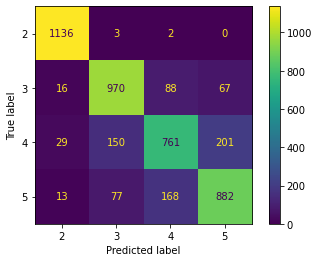

In [89]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [90]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)
print('train_matrix',classification_report(y_train, y_pred_train))
print('test_matrix',classification_report(y_test, y_pred_test))

train_matrix               precision    recall  f1-score   support

           2       1.00      1.00      1.00      4562
           3       1.00      1.00      1.00      4562
           4       1.00      1.00      1.00      4562
           5       1.00      1.00      1.00      4563

    accuracy                           1.00     18249
   macro avg       1.00      1.00      1.00     18249
weighted avg       1.00      1.00      1.00     18249

test_matrix               precision    recall  f1-score   support

           2       0.95      1.00      0.97      1141
           3       0.81      0.85      0.83      1141
           4       0.75      0.67      0.70      1141
           5       0.77      0.77      0.77      1140

    accuracy                           0.82      4563
   macro avg       0.82      0.82      0.82      4563
weighted avg       0.82      0.82      0.82      4563

